# Appendix - Time Series Analysis in R

Time is an indelible part of biology: everything is a product of the time and place that it exists.

Given this, time is often an important part of the responses of organisms and populations to change and stimulus.

Whilst in some scenarios (such as behavioural reponses of shrimp to fish kairomones) the effect of time is minimal relative to other factors, in many others time plays a key part in the aspects of nature that we are interested in as ecologists.

## What is a time series?

In essence, a time series is any data with a major component being time measured at regular intervals.

Time behaves in a very particular way: it progresses in one direction only, and at a completely fixed rate of <a href="#" title="within a given frame of reference">1s/s</a> (well...when we ignore special relativity).

Given this unidirectionality we can say that effects at time $t$ cannot be affected by conditions at time $t+1$. Events in a time series can only be _dependent_ on conditions that have happened previously (or are happening "now").

### An aside into statistics

From a statistical perspective, the biggest problem with time series data is that variables that are time-dependent are not "independent and identically distributed (i.i.d.)", a common requirement for classical statistical approaches.

This is because if one data point depends on a previous data point, it _cannot_ be independent. As such, we need a different approach to analysing time series data: _time series analysis_.

### Examples of time series

<img src="https://yanshuo.quarto.pub/nus-ts-book/01-intro_files/figure-html/fig-intro-globtemp-1.png" width=800>

Time series data appears across a wide disparity of different fields:

- Historical climate data
- Disease incidence
- Animal populations
- and many _many_ more

### A note on time series

Not all datasets with a time component are inherently a time series, data with irregularly-spaced sampling points may not be suitable for time series analysis without further aggregation.

## What is the purpose of time series analysis?

Fundamentally, like with any data analysis, time series analysis looks to extract some sort of signal from data. Some goals may be as follows:

### Forecasting

Sometimes you want to know what may happen next given a previous time series, this is called "forecasting", a term you may be familiar with from meterology.

A weather forecast looks to predict weather patterns from previous data and the current conditions. If it was hot yesterday, it may well be hot today (or we may get a major rainstorm!)

Alternatively epidemiologists may be interested in the progression of disease incidence in a population, and may be actively monitoring an outbreak. Time series analysis can be a useful tool in this process.

### Smoothing, filtering, and cleaning

Time series data are often noisy and hard to see direct signals within. Smoothing and filtering can be useful to extract the "signal" from the surrounding "noise".

### Trending and regression

Often one may be interested in the relationship between different variables, accounting for the effect of time.

This is where time series regression can allow us to both consider how the dependent variable changes over time, and also elucidate the effect of any independent variables of interest.

For instance we may wish to understand the effect of urbanisation on the population dynamics of mosquitoes. Time series regression may allow us to seperate human effects from the typical seasonal cycles of mosquito population.

## Getting started in R

Before we go any further it is advisable to install the packages required for this workshop `fpp3`, `astsa`, `tidyverse` & `GGally`. `fp33` actually installs a bunch of other useful packages such as `tsibble`, `feasts` & `fable`.Before we go any further it is advisable to install the packages required for this workshop `fpp3`, `astsa`, `tidyverse` & `GGally`. `fp33` actually installs a bunch of other useful packages such as `tsibble`, `feasts` & `fable`.

It will also be worthwhile installing the hub's own `ohvbd` package:

If you do not have much time, you can install the package without building the vignettes locally, using:

The documentation for ohvbd as a whole can be found [here](https://fwimp.github.io/ohvbd/)

Once you have installed these (it may take a while if you have not previously installed tidyverse in particular), it's time to load the fpp3 and ohvbd packages:

In [1]:
suppressWarnings(suppressPackageStartupMessages(library(fpp3)))
suppressWarnings(suppressPackageStartupMessages(library(ohvbd)))

This loads a bunch of other packages such as some `tidyverse` packages, and a few others such as `tsibble` and `fable`.

These last two packages are time-series-specific packages that aid in the processing of time-series data.

If you are running on Linux (or potentially on MacOS), you will also need to run the following command to set up `ohvbd` to properly pull from some databases:

In [10]:
set_ohvbd_compat()

✔ Set compatibility mode = TRUE



If you want to know what this does and why it is needed, feel free to ask me for details.

Now I just need to set up some internal things for this notebook. Ignore the following code:

In [2]:
# Just for prettier markdown here, you don't need to do this
options(repr.matrix.max.rows=10)
options(repr.plot.width=16, repr.plot.height=10)
theme_set(theme_gray(base_size = 18))

### The `tsibble`

`tsibble` is the time-series equivalent of a `tibble`, a common data structure for holding general tabular data. `tsibble` contains extra metadata to define the time series completely, a few of which are different from a standard `tibble`.

The `key` is a variable that uniquely defines a given sub-series within a full time series.

The `index` defines the time point at which an individual measurement is taken. This should be a column that is already in some sort of time/date format.

So as a very simple example, imagine we have performed tick drags every day for the month of May 2024 in three different sites. Our data may look something like this:

In [3]:
ticktest <- tsibble(
  date = rep(as_date("2024-05-01") + 0:30, 3),
  value = c(rpois(31,20), rpois(31,10), rpois(31,50)),
  group = c(rep("Silwood Bottom", 31), rep("Water Meadow", 31), rep("Rookery Slope", 31)),
  key = group,
  index = date
  )
ticktest

date       value group        
1  2024-05-01 48    Rookery Slope
2  2024-05-02 45    Rookery Slope
3  2024-05-03 60    Rookery Slope
4  2024-05-04 51    Rookery Slope
5  2024-05-05 40    Rookery Slope
⋮  ⋮          ⋮     ⋮            
89 2024-05-27  6    Water Meadow 
90 2024-05-28 13    Water Meadow 
91 2024-05-29  8    Water Meadow 
92 2024-05-30  6    Water Meadow 
93 2024-05-31  8    Water Meadow

In [4]:
tsibble::interval(ticktest)

<interval[1]>
[1] 1D

Using `tsibble` structures makes basic time series analysis much easier (as it plays well with other time series packages), however it is not entirely necessary to convert to `tsibble` in all scenarios. Your decision will likely depend on your usecase.

When you print a `tsibble` object, generally the output will start with a few descriptive lines that are worthwhile knowing how to interpret.

In the following example, this `tsibble` is a 93 line dataset, with a period (time between observations) of 1 day (`[1D]`) and 3 groups.

## Plotting

Plotting a time series in a `tsibble` is made exceptionally easy using the `autoplot()` function originally from `ggplot2`. If you feed a `tsibble` object into `autoplot()` using a pipe (`|>`) then it will try its best to plot the time series in a sensible manner:


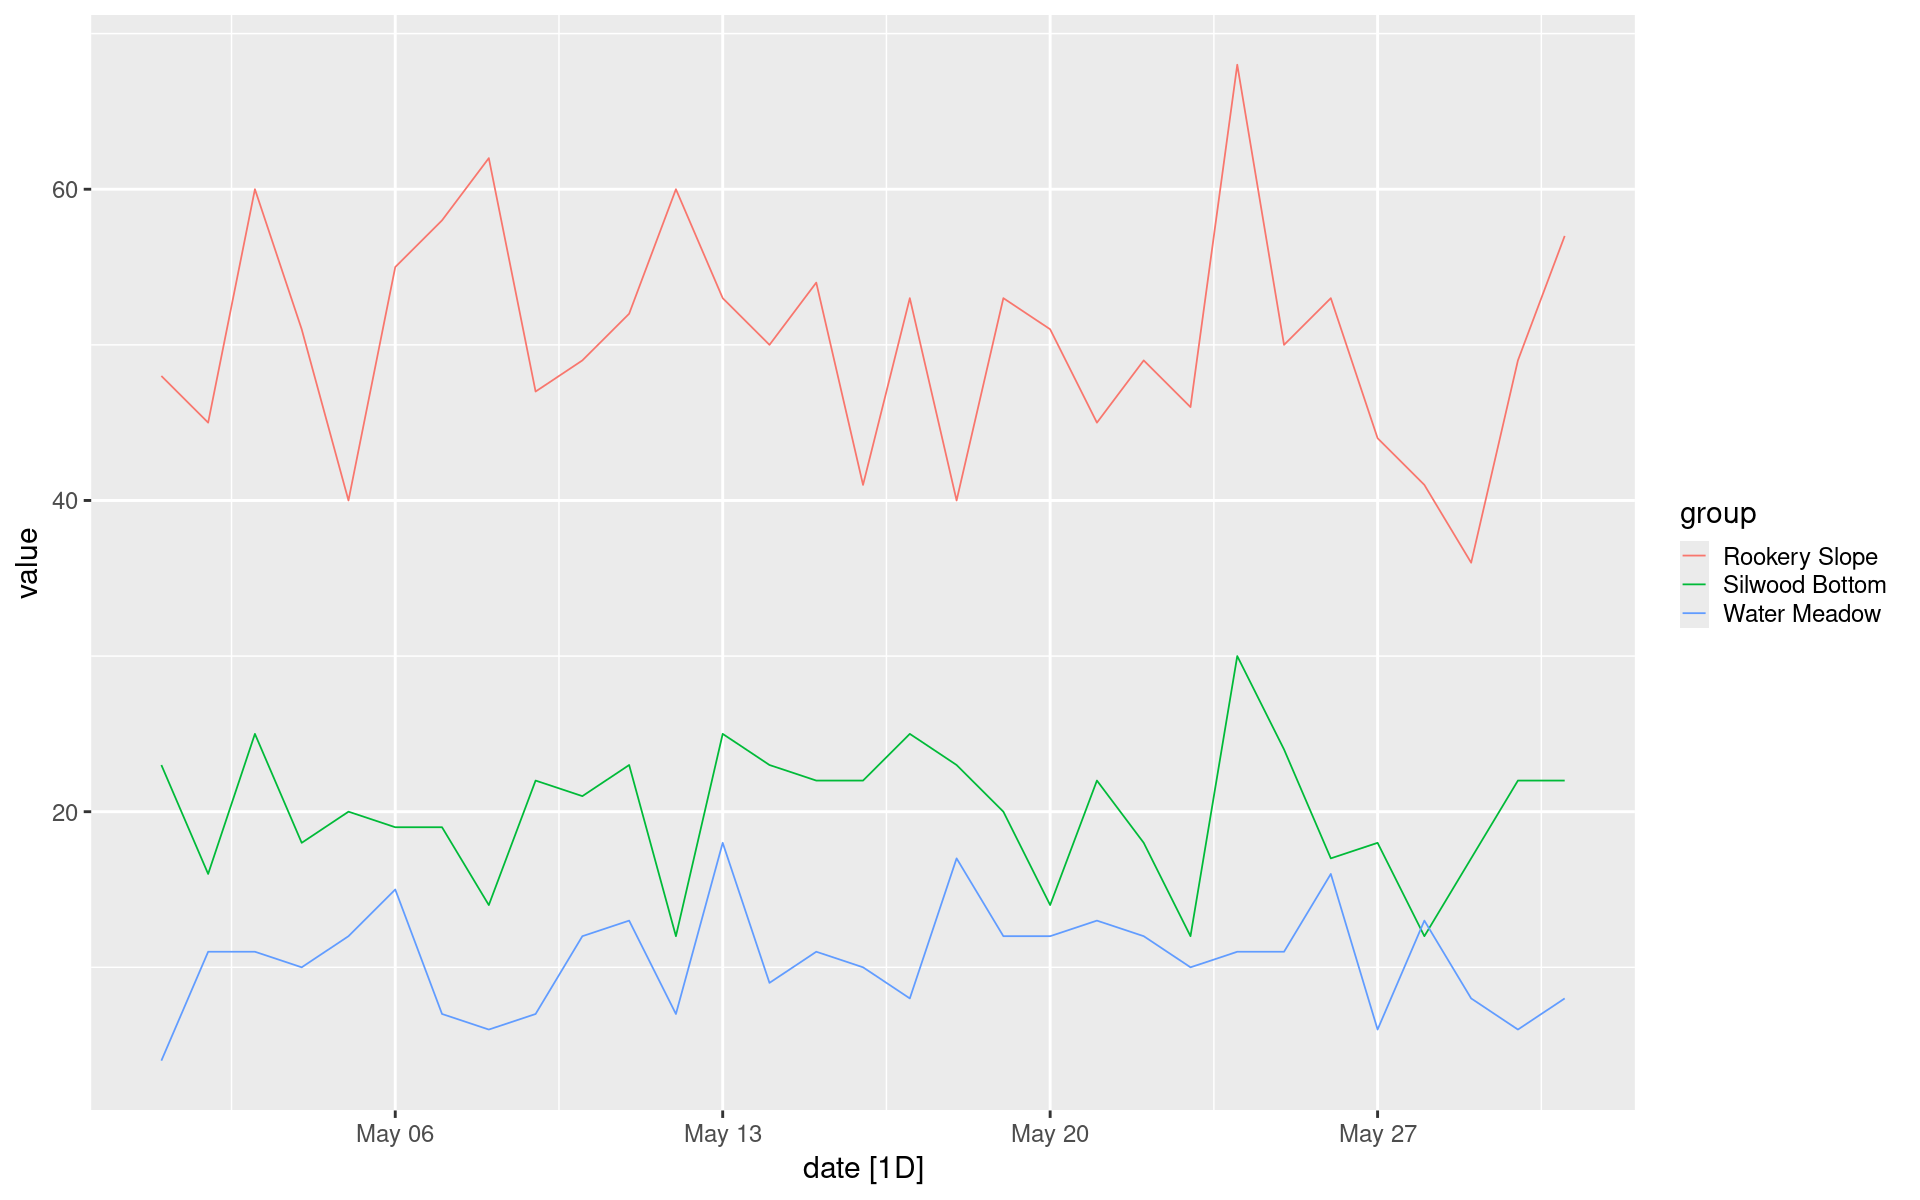

In [5]:
ticktest |> autoplot(.vars=value)

If you do not provide the name of a column to the `.vars` argument, it does try to work out the most sensible column, but will also throw a warning when it does. As such it's usually best to include this argument.

Now this data was just randomly generated with no real signal, however we can just use real data to see some more usable time series

## Dealing with missing values

Some time series data has missing values that can really get in the way of proper modelling. For an example let's look at some data in `vecdyn`.

In [9]:
df <- ohvbd.ids(526, db = "vd") |> # Decide what data we want to pull, and from where
  fetch() |> # Fetch the data from vecdyn
  extract(cols = c("location_description", "sample_value", "sample_start_date")) |> # Extract the columns we want from the responses
  mutate(
    sample_start_date = as_date(sample_start_date),
    sample_value = as.numeric(sample_value)
    ) # Wrangle the columns into appropriate data formats

ℹ Found 249 rows of data.

ℹ Predicted to take ~2s.



Now if we try to convert this week-interval data to a tsibble straight-out we will encounter a problem:

In [13]:
df |> tsibble()

Using `sample_start_date` as index variable.


location_description sample_value sample_start_date
1   Alps                 0            2010-05-28       
2   Alps                 0            2010-06-04       
3   Alps                 0            2010-06-11       
4   Alps                 0            2010-06-18       
5   Alps                 0            2010-06-25       
⋮   ⋮                    ⋮            ⋮                
245 Alps                 17.855340    2019-10-06       
246 Alps                  0.000000    2019-10-13       
247 Alps                  3.032694    2019-10-20       
248 Alps                  0.000000    2019-10-27       
249 Alps                  0.000000    2019-11-19

In [14]:
df |> tsibble() |> tsibble::interval()

Using `sample_start_date` as index variable.


<interval[1]>
[1] 1D

The `# A tsibble: 249 x 3 [1D]` line here shows that tsibble has decided this is a dataset taken at 1-day intervals.

Remember a time series must have equally spaced intervals, so in the case where there are varying intervals, it will take the lowest common denominator. In this case that is simply daily data.

However this data is weekly egg data, taken just before the mosquito season in Italy starts, and continuing until no more mosquito eggs are found in the ovitraps.

To deal with this we need to do some slightly messy wrangling. Let's first replace all the missing values in our time series.

Luckily we know (using our own ecological intuition) that any time out of season, the mosquito population will be essentially 0, so we can replace any missing values with 0s.

In [19]:
dfibble <- df |> 
  tsibble(key = location_description, index = sample_start_date) |> # Convert to tsibble
  arrange(sample_start_date) |> # Arrange by start date
  fill_gaps(sample_value = 0) # Fill missing values with 0s (as it's out of mosquito season)
dfibble

location_description sample_value sample_start_date
1    Alps                 0            2010-05-28       
2    Alps                 0            2010-05-29       
3    Alps                 0            2010-05-30       
4    Alps                 0            2010-05-31       
5    Alps                 0            2010-06-01       
⋮    ⋮                    ⋮            ⋮                
3459 Alps                 0            2019-11-15       
3460 Alps                 0            2019-11-16       
3461 Alps                 0            2019-11-17       
3462 Alps                 0            2019-11-18       
3463 Alps                 0            2019-11-19

This still isn't right though. We now have days within the mosquito season getting filled with 0s

We can see that by just getting the data from 2019.

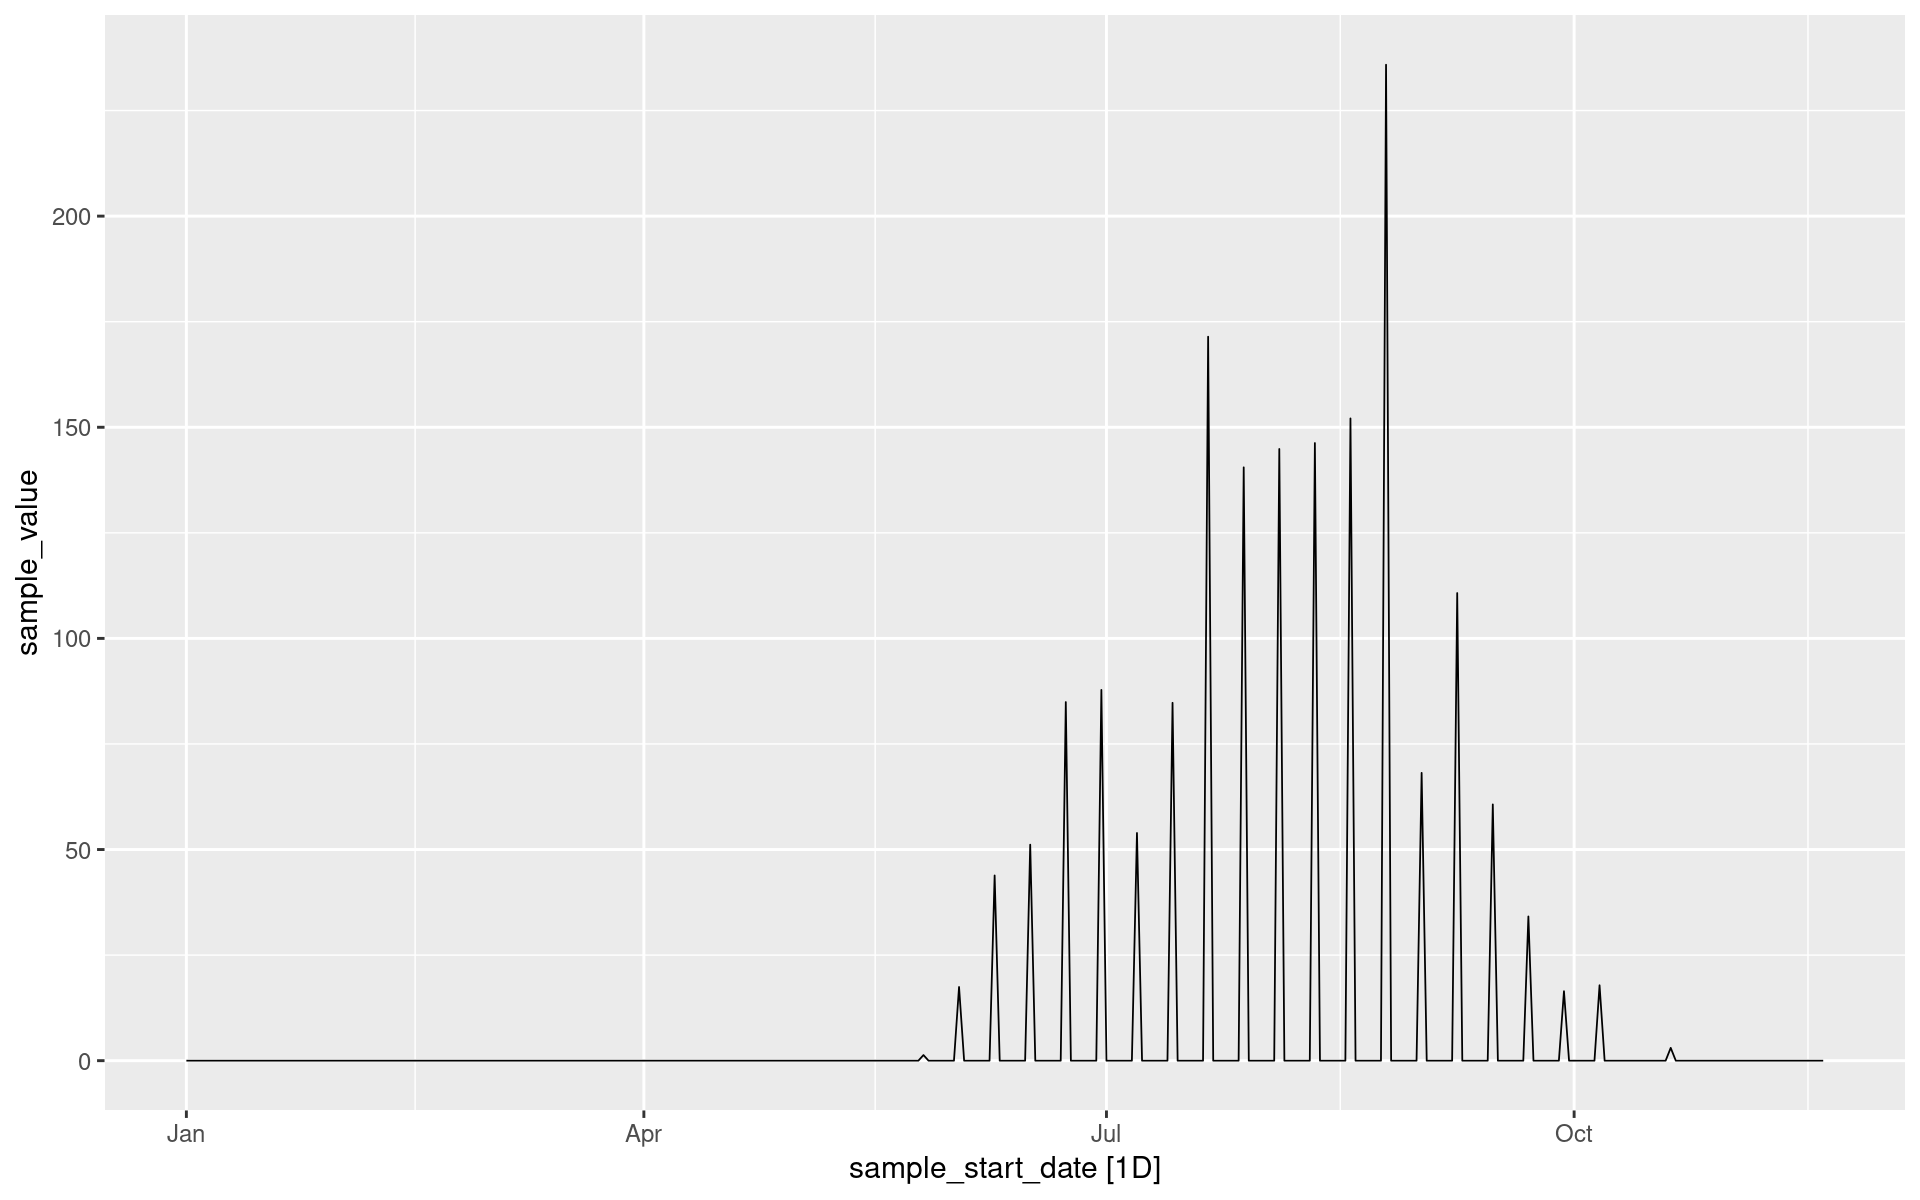

In [20]:
dfibble |> filter(year(sample_start_date) == 2019) |> autoplot(.vars = sample_value)

It appears as though the sample value keeps dropping to zero within the season.

This is because the original data was sampled once per week! We must then reaggregate the dataset to a weekly scale.

This sort of thing is a fairly common occurrence within time series analysis, especially when your data are not nicely-behaved toy datasets.

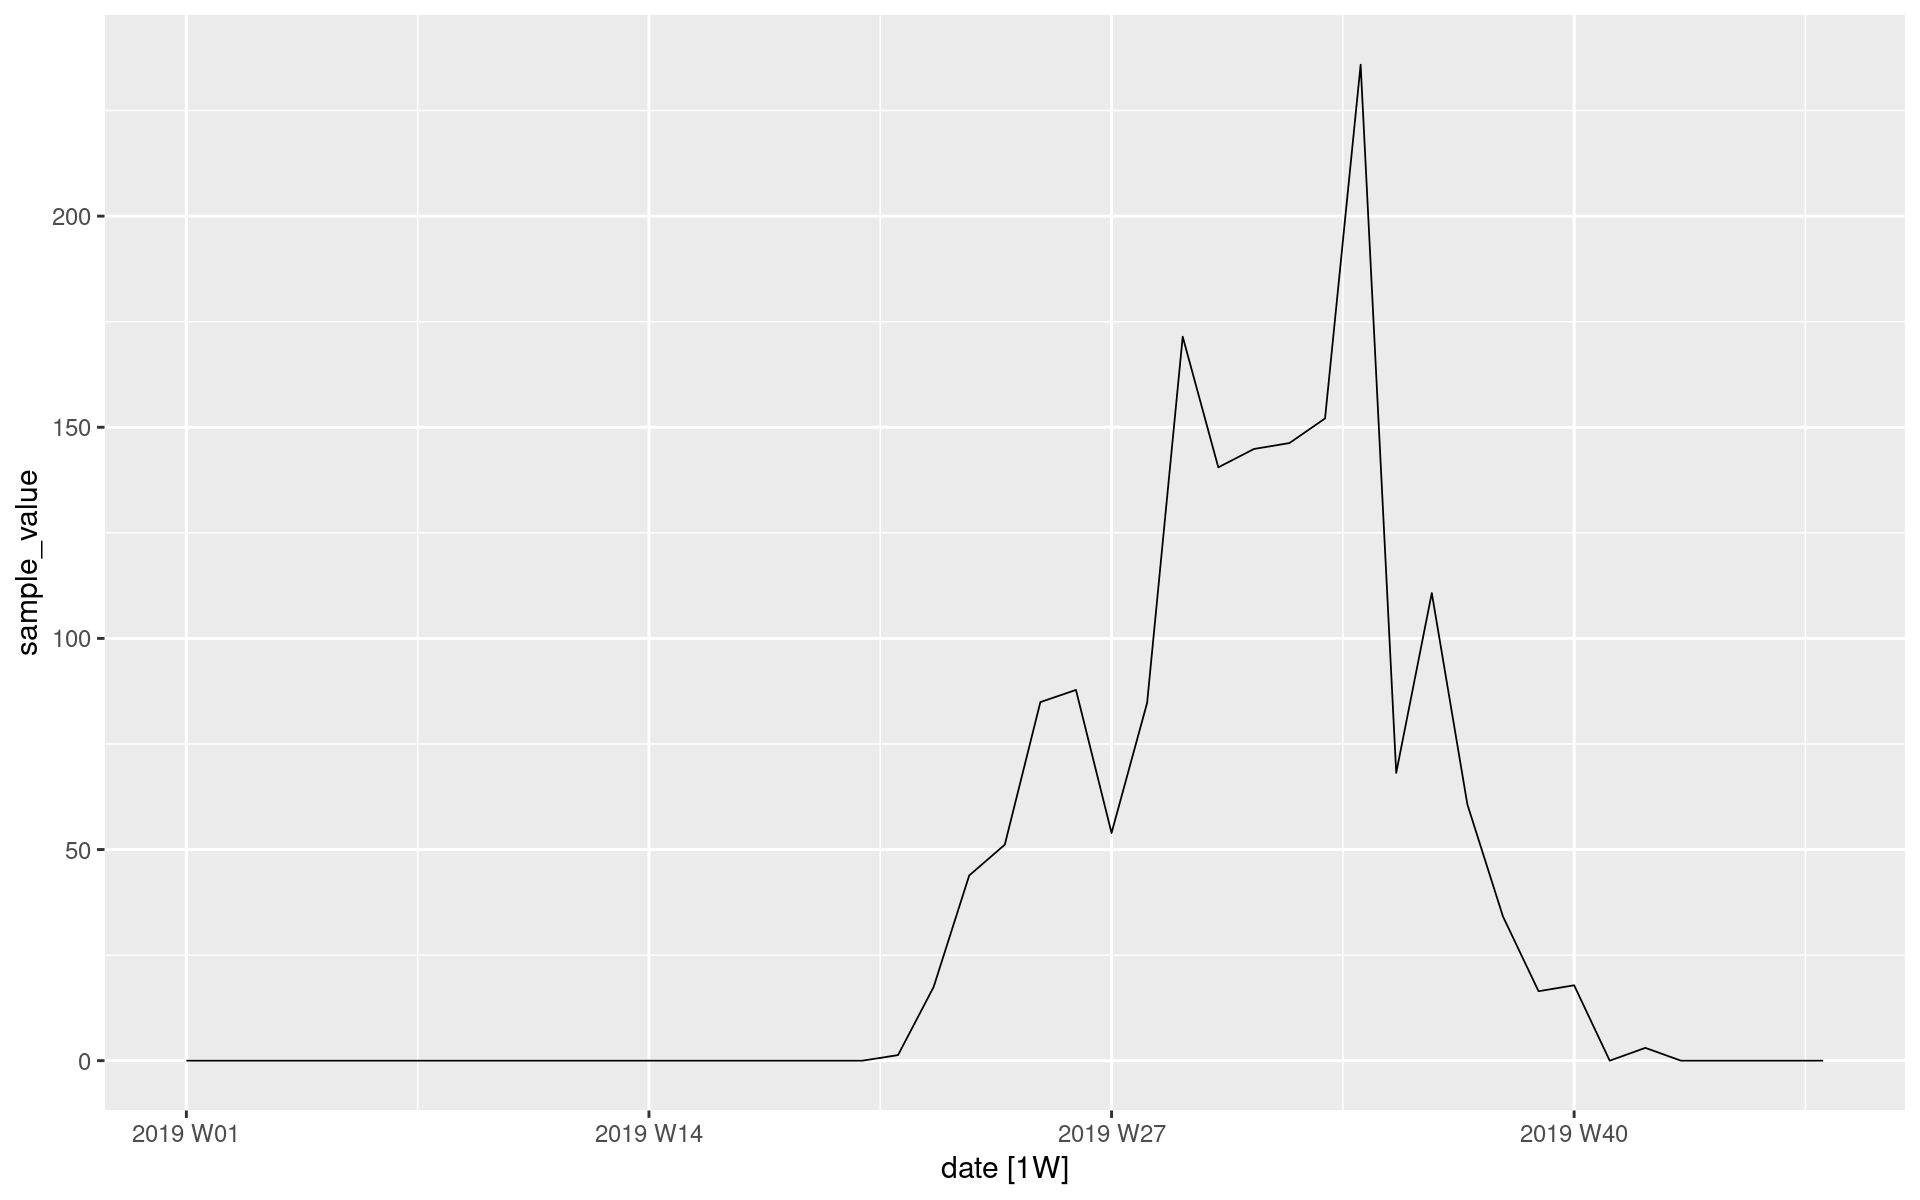

In [21]:
dfibble <- dfibble |> 
  index_by(date = ~ yearweek(.)) |> # Aggregate to week-level (as original data is week-level)
  summarise(sample_value = max(sample_value)) # Find the max value (as there is only a maximum of 1 value per week that is non-0)

dfibble |> filter(year(date) == 2019) |>  autoplot(.vars = sample_value)

That looks much better, and now we have a fully-functional time series:

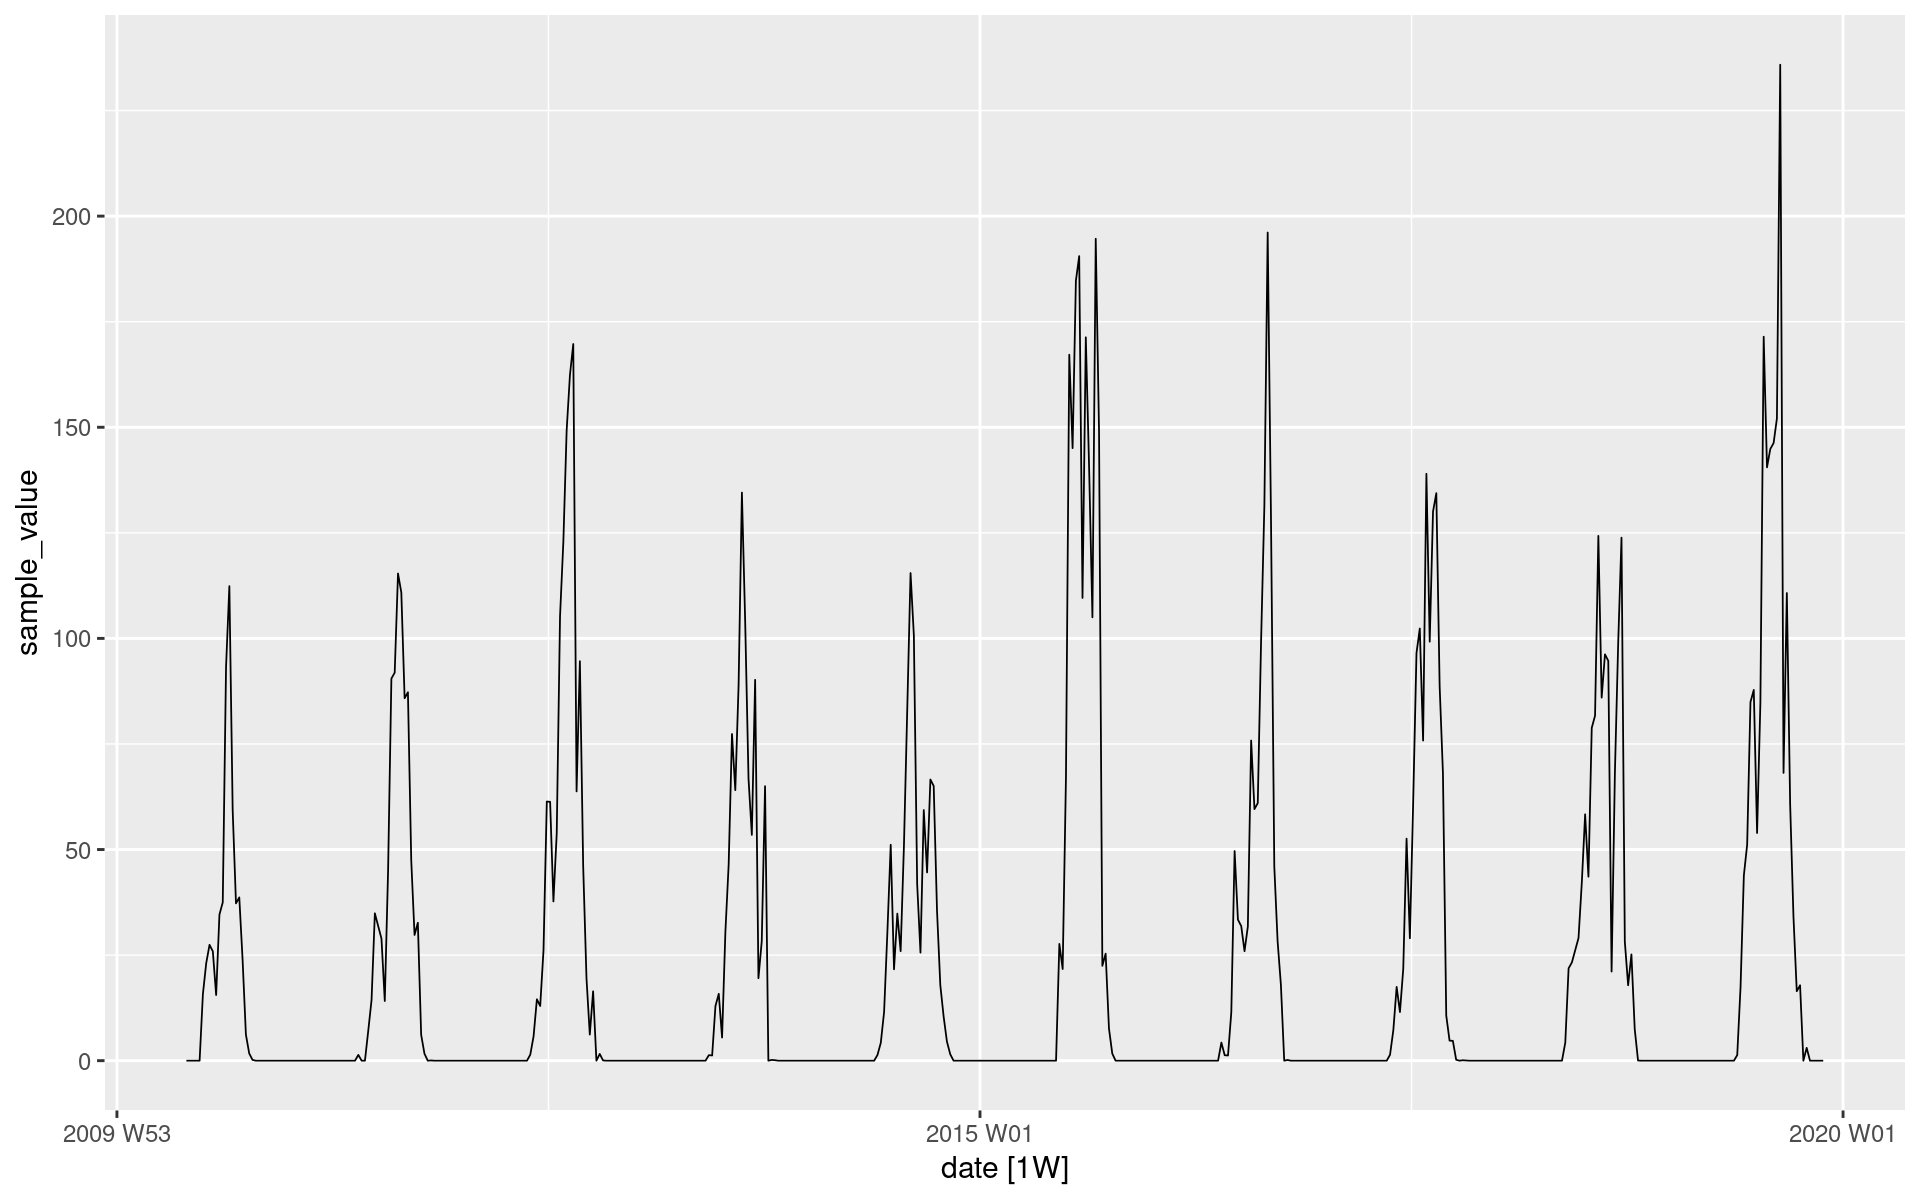

In [23]:
dfibble |> autoplot(.vars = sample_value)

**Beware**, you cannot always just assume that any missing values are 0s. This is a decision you can only make by _actually understanding your data_.

There is actually a whole area of statistics related to imputation (filling in gaps) in time series data. We're not going to cover this here as we are dealing with relatively "kind" datasets, but if you are interested in the deep dynamical models used to do this, a good place to start would be to look at the [Kalman filter](https://en.wikipedia.org/wiki/Kalman_filter) which can be combined with ARIMA models to impute missing data.

Generally speaking the easiest way to deal with missing data, though, is with aggregation.

## Seasonality plots

Given that each year has different distinct seasons, and each season is similar between years, another way to look at time series data across years is using something called a seasonality plot. This overlays the years on top of one another and allows us to easily compare data between the years.

We can do that using the `gg_season()` function, defined in `feasts`:

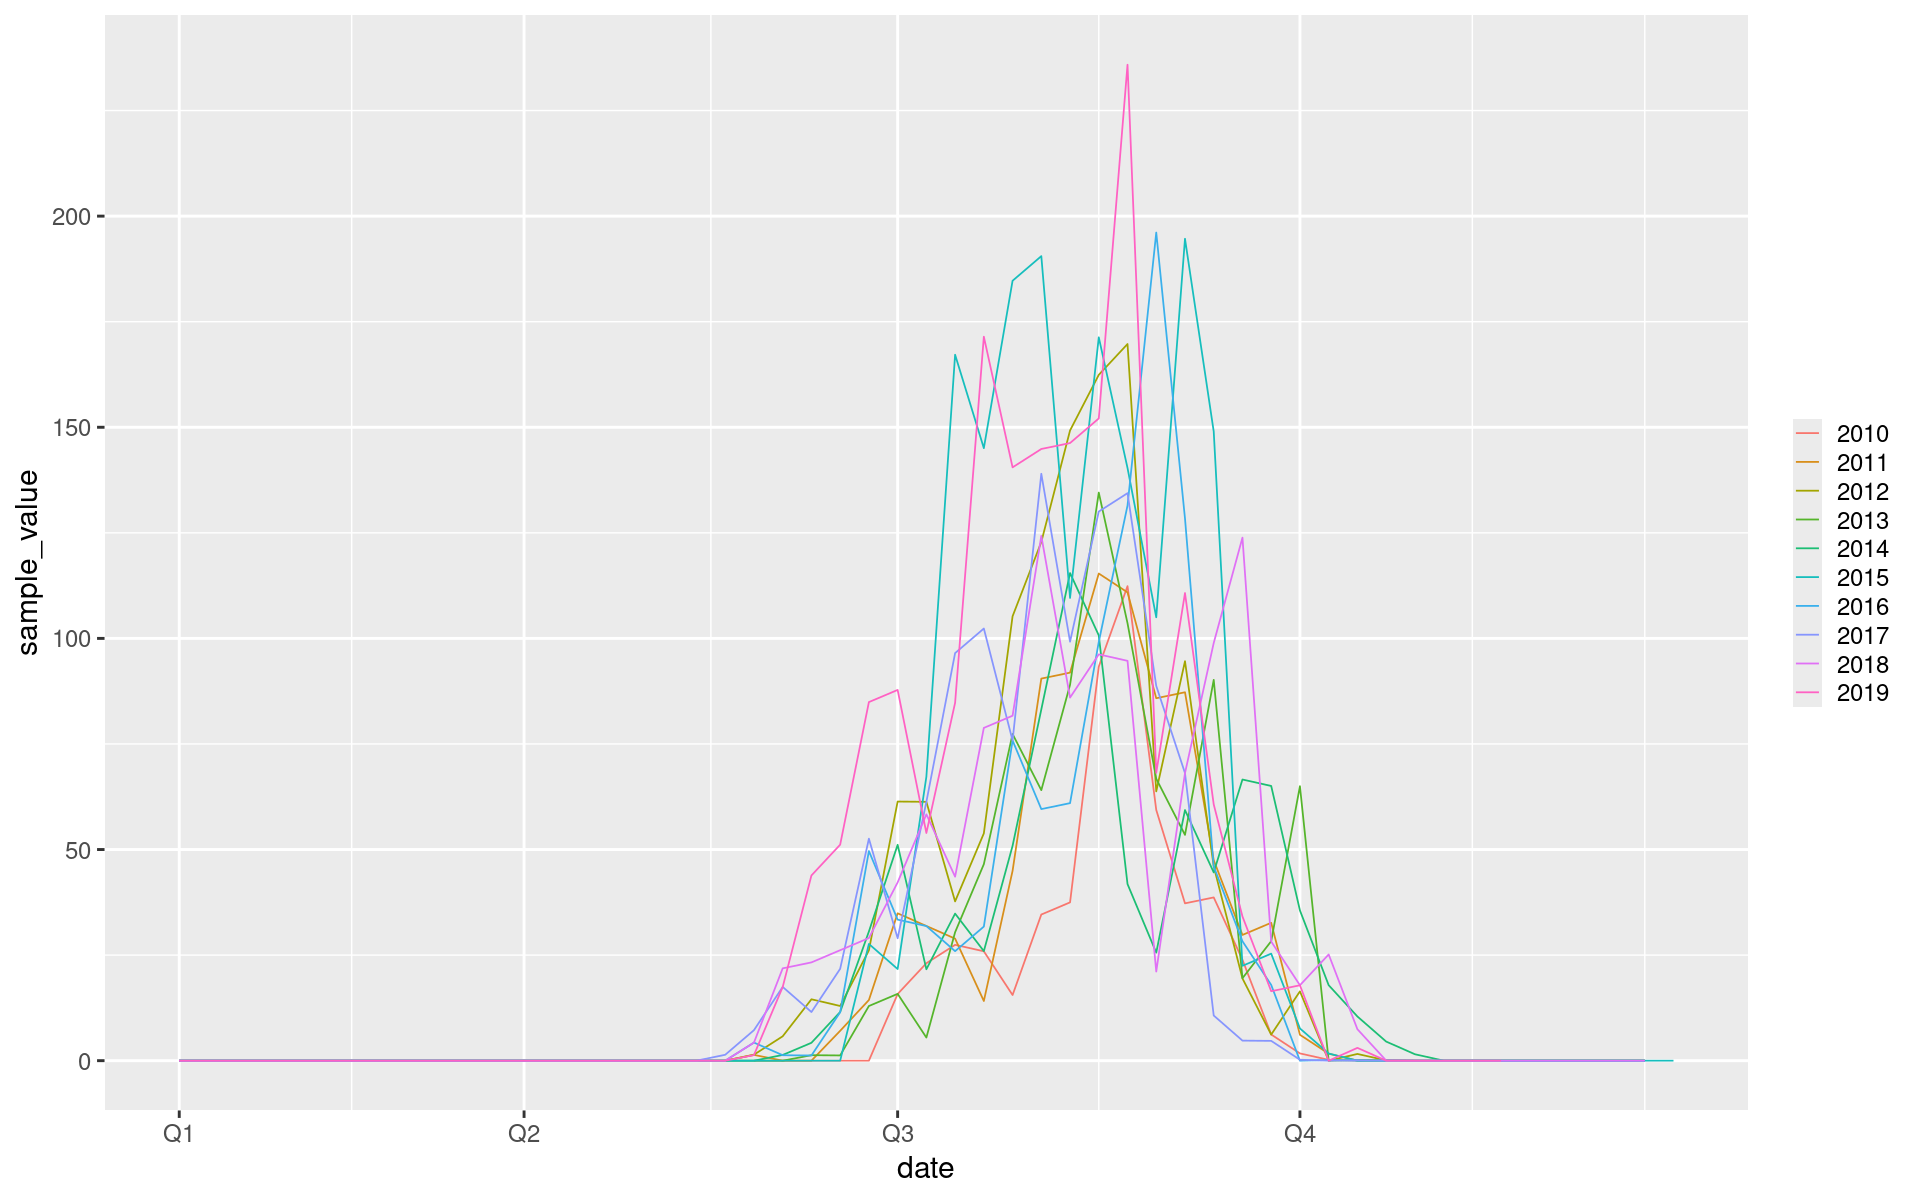

In [24]:
dfibble |> gg_season(y = sample_value, max_col_discrete = 12)

Now this is already pretty cool. We can see that all years peak _approximately_ at the same time, but I'm sure you'll agree it's pretty messy.

As such, let's reaggregate this data temporarily to monthly data and re-make the seasonality plot.

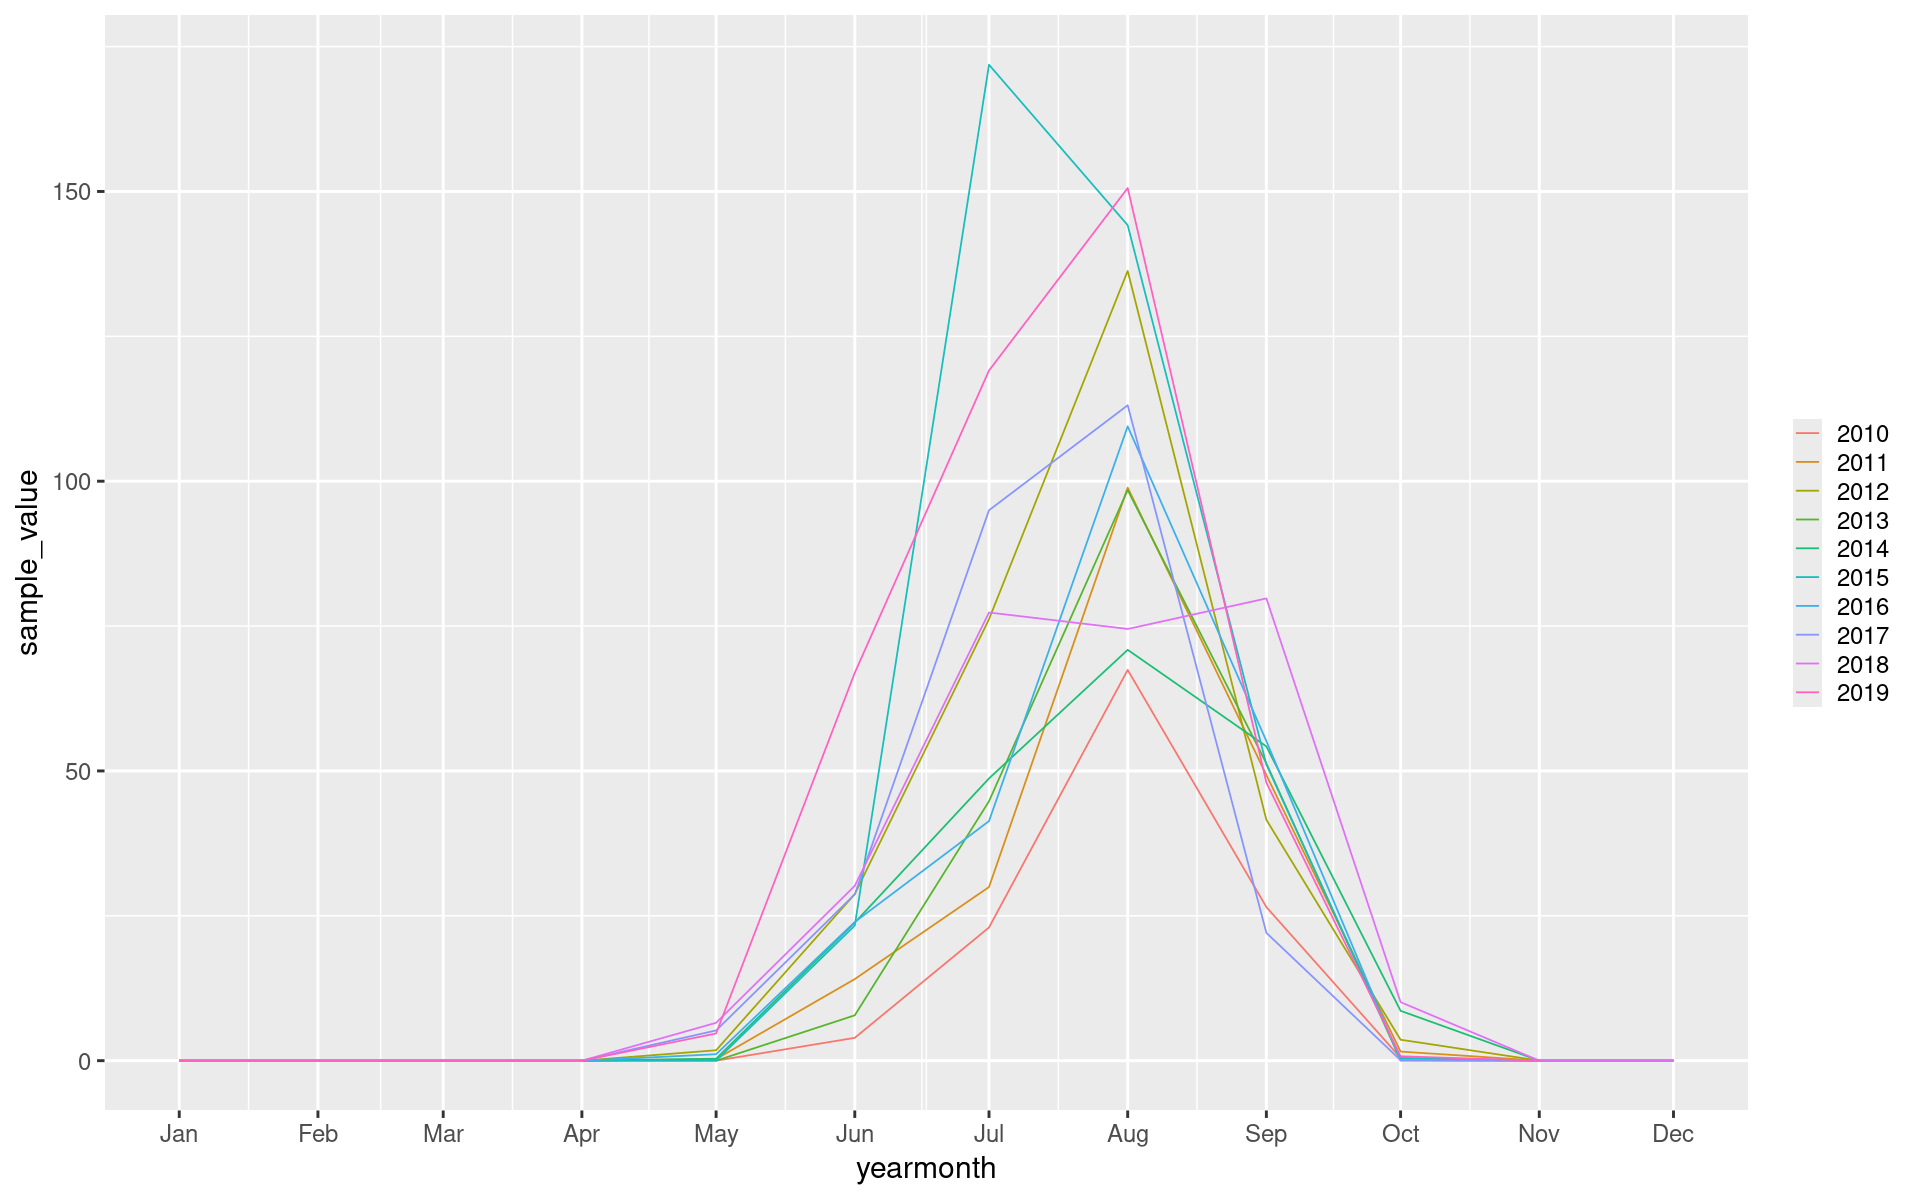

In [25]:
dfibble |> 
  index_by(yearmonth = ~ yearmonth(.)) |> # Reaggregate to month-level, we must use a new column name for reasons unbeknownst to me
  summarise(sample_value = mean(sample_value)) |> 
  gg_season(y = sample_value, max_col_discrete = 12)

Isn't that better? We can now more clearly see that the data from 2015 peaked earlier and fairly high, similar to the data from 2019.

## Lag plots

Another plot that can be exceedingly useful is a lag plot. This plots values at time $t$ (on the x axis) against their values at time $t - l$ where $l$ is the lag distance.

$l$ is in the same units as the interval of the data (in our case, weeks).

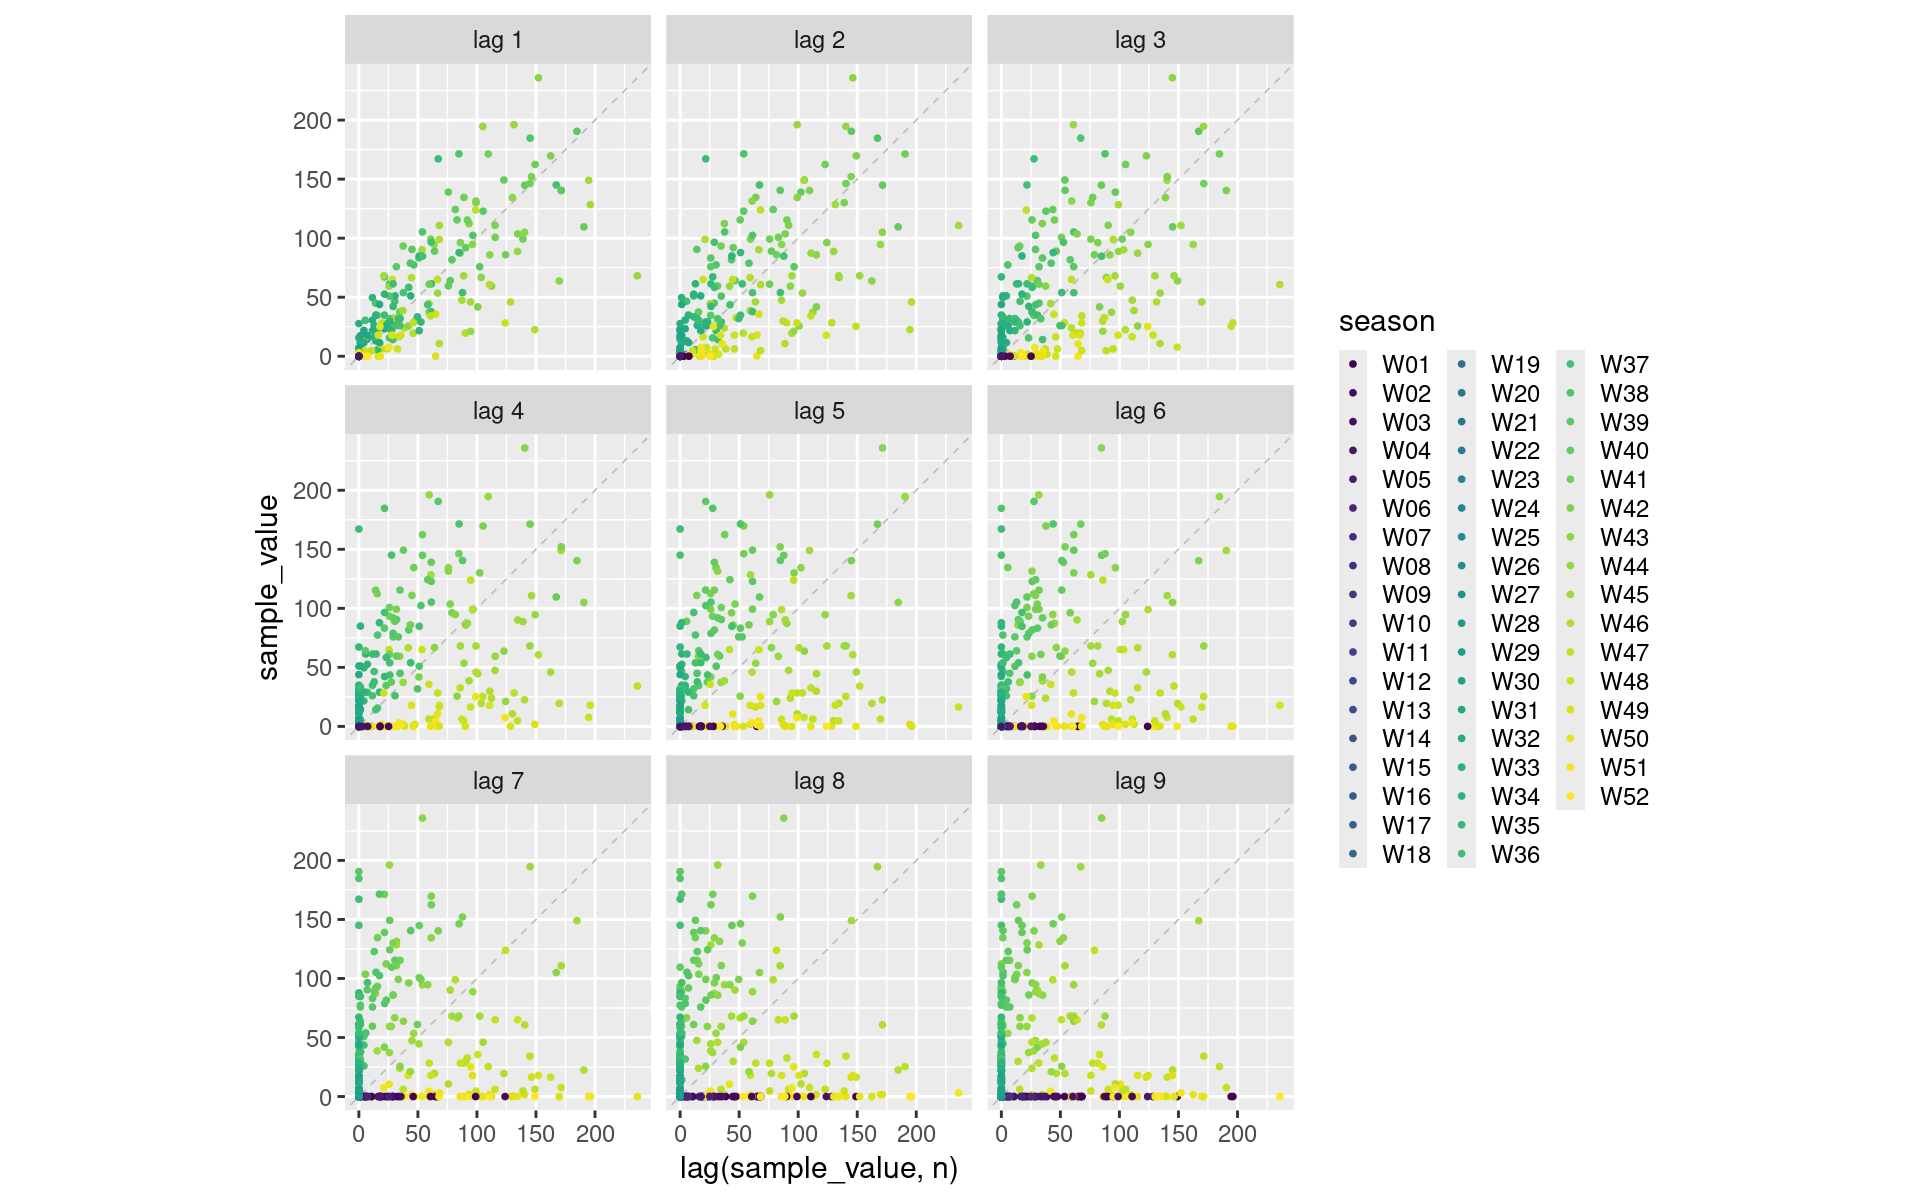

In [26]:
dfibble |> 
  gg_lag(y = sample_value, geom="point")

When looking at this data, the colour of the dots indicates the week in the year from which the data originates.

Purple dots are at the head of the season, and yellow dots are towards the end. Is there any trend that you see here?

## ACF plots

Another useful tool for investigating the lag in a dataset is to directly investigate the autocorrelation within the data.

One excellent visual tool for this is to use the ACF values at different lag amounts. We can do this using the `ACF()` function from `feasts`:

In [28]:
dfibble |> ACF(sample_value, lag_max = 52)

lag acf      
1  1W  0.8646474
2  2W  0.7640465
3  3W  0.6737971
4  4W  0.5468455
5  5W  0.4419175
⋮  ⋮   ⋮        
48 48W 0.4433745
49 49W 0.5246661
50 50W 0.6038654
51 51W 0.6344849
52 52W 0.6519339

This is all well and good but a dataframe of these values is not the easiest to interpret. Here is where the stunning `autoplot()` feature comes back into play.

If we pipe this ACF dataframe into the `autoplot()` we end up with something known as an ACF plot:

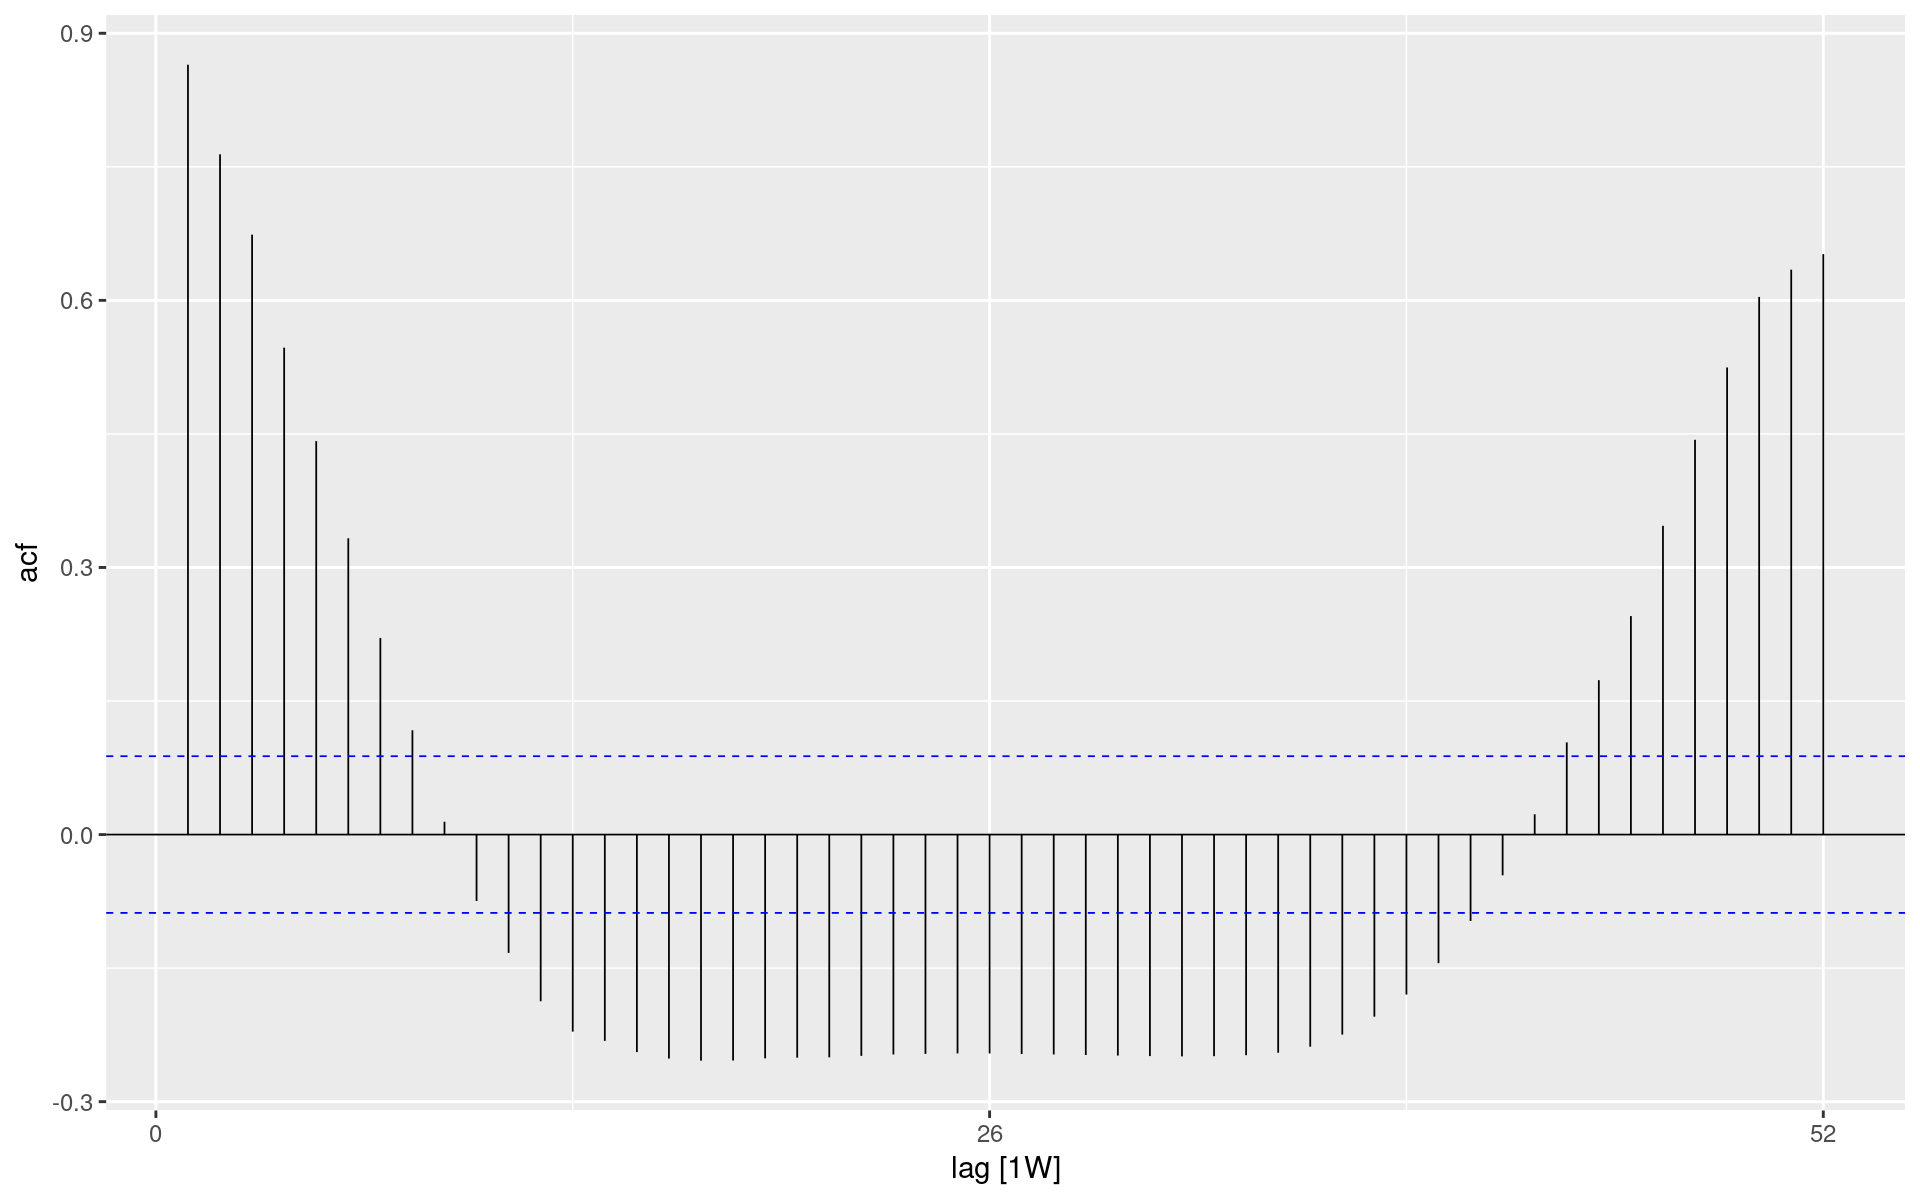

In [30]:
dfibble |> ACF(sample_value, lag_max = 52) |> autoplot()

In this plot we can clearly see that there's some sort of trend going on, specifically it sort of looks like the graph of a cosine function of period 52.

That's because it pretty much is! This is a direct view into the seasonality of the data in this scenario. Where a given value in the height of the egg-laying season is compared with the value 26 weeks earlier, that is comparing to the value when nothing is laying eggs, so we end up with a calculated anticorrelation. However when comparing to data 52 weeks prior we see a decent positive correlation, as data one year in the past is similar to that at present!

Take a few minutes to look at this plot and try to make sure it makes sense. It's a very useful tool to have in your back pocket!

## Decomposition

Decomposition is the process of breaking an object into its component parts. When talking about time series data, these components generally fall into three categories:

1. A trend
2. Seasonal components
3. Random noise

For the examples in this first section about decomposition, let's pull some temperature data from another hub-linked source, the AREAdata project (AD).

❯ Loading AREAdata cache: temp-0 ...

✔ Loaded AREAdata cache temp-0.

❯ Loading AREAdata cache: temp-0 ...



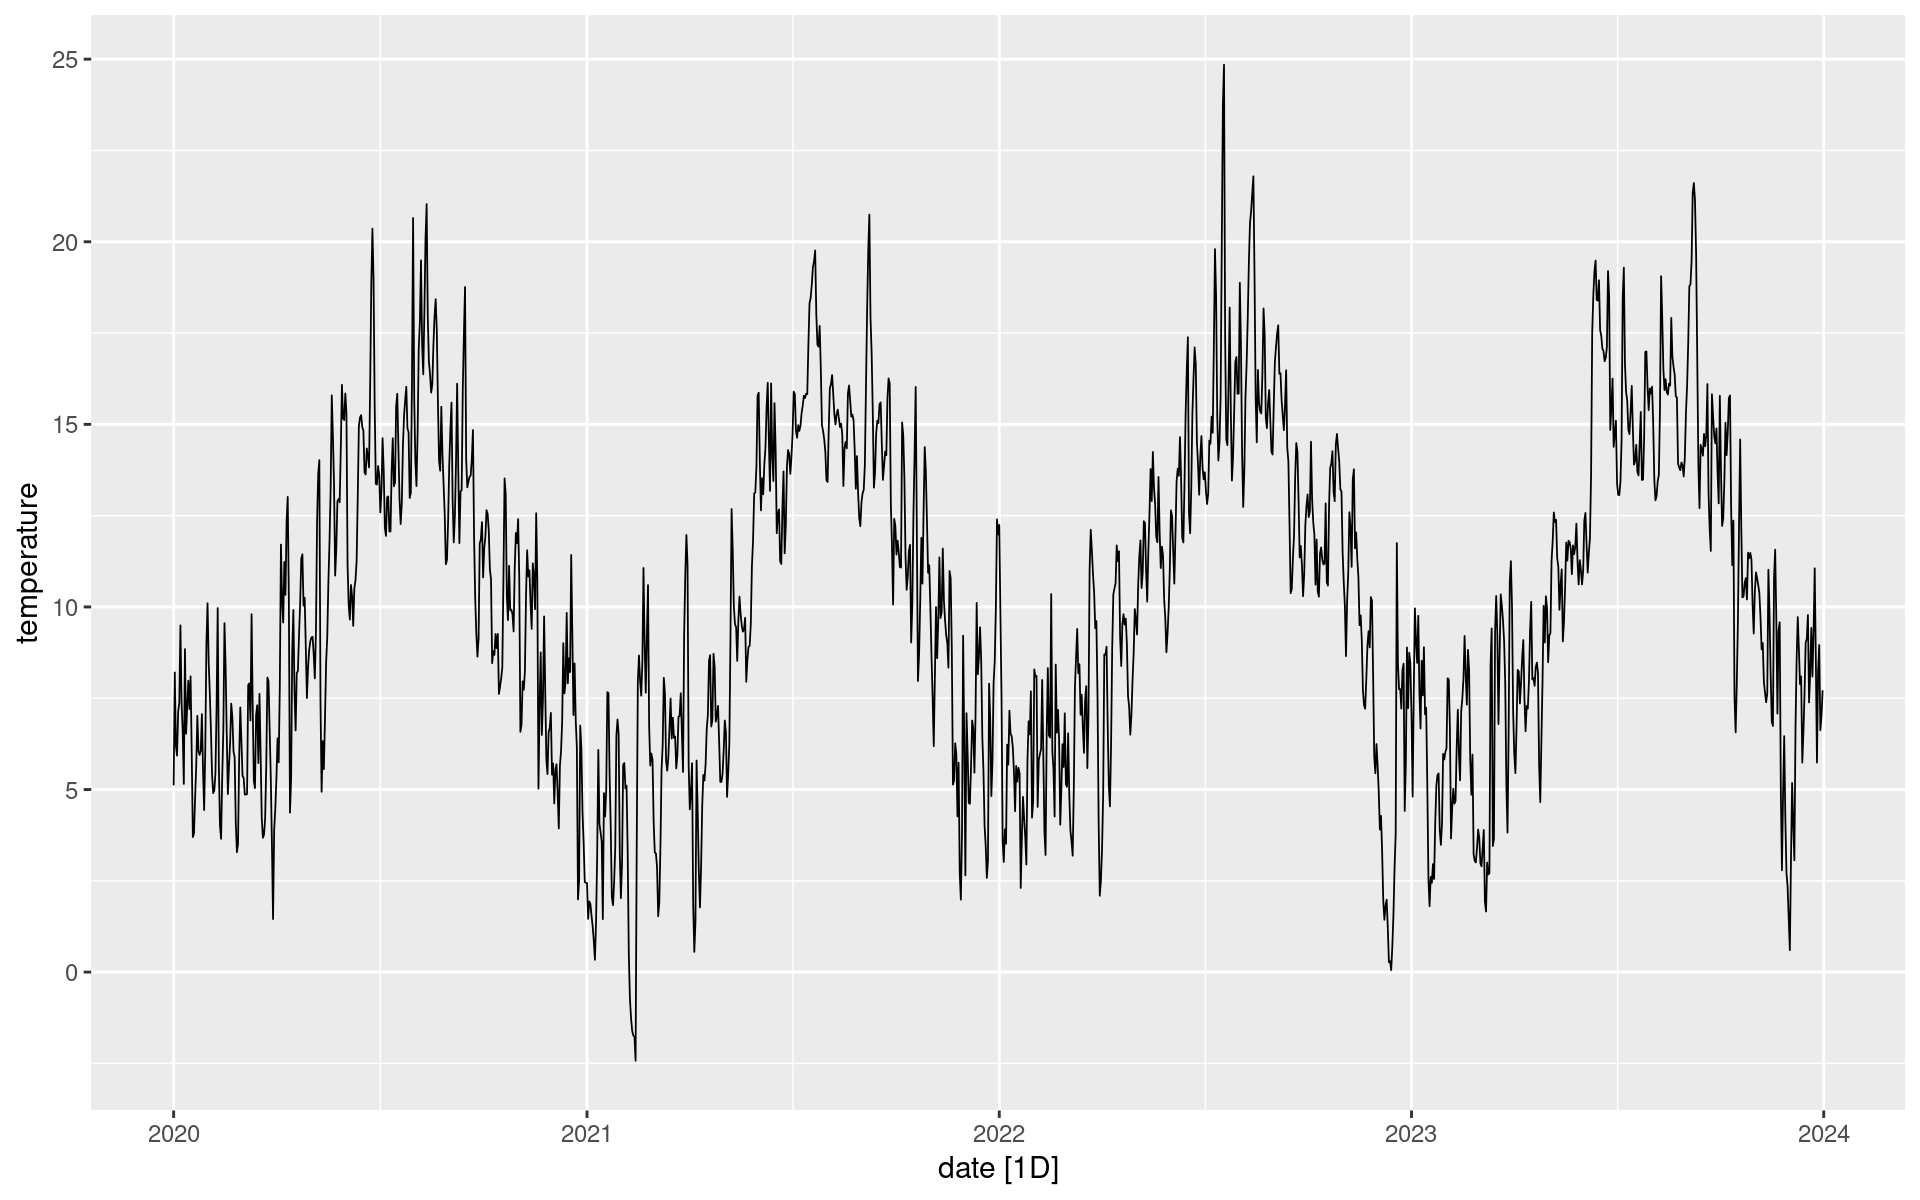

In [31]:
addata <- fetch_ad(use_cache = TRUE) |>
  extract(places = "United Kingdom") |>  # Get only UK temperature date
  enframe() |>  # Convert into a df
  rename(date=name, temperature=value) |>  # Rename columns
  mutate(date=as_date(date)) |>  # Make sure the date column is actually a date
  tsibble(index=date)  # Convert to a tsibble as usual

# And plot it to take a look:
addata |> autoplot(.vars=temperature)

This data is the day-by-day mean temperature for the United Kingdom between 2020 and 2024.

It's very high resolution, so just for exploring it a bit easier, let's once again reaggregate it, this time to monthly data.

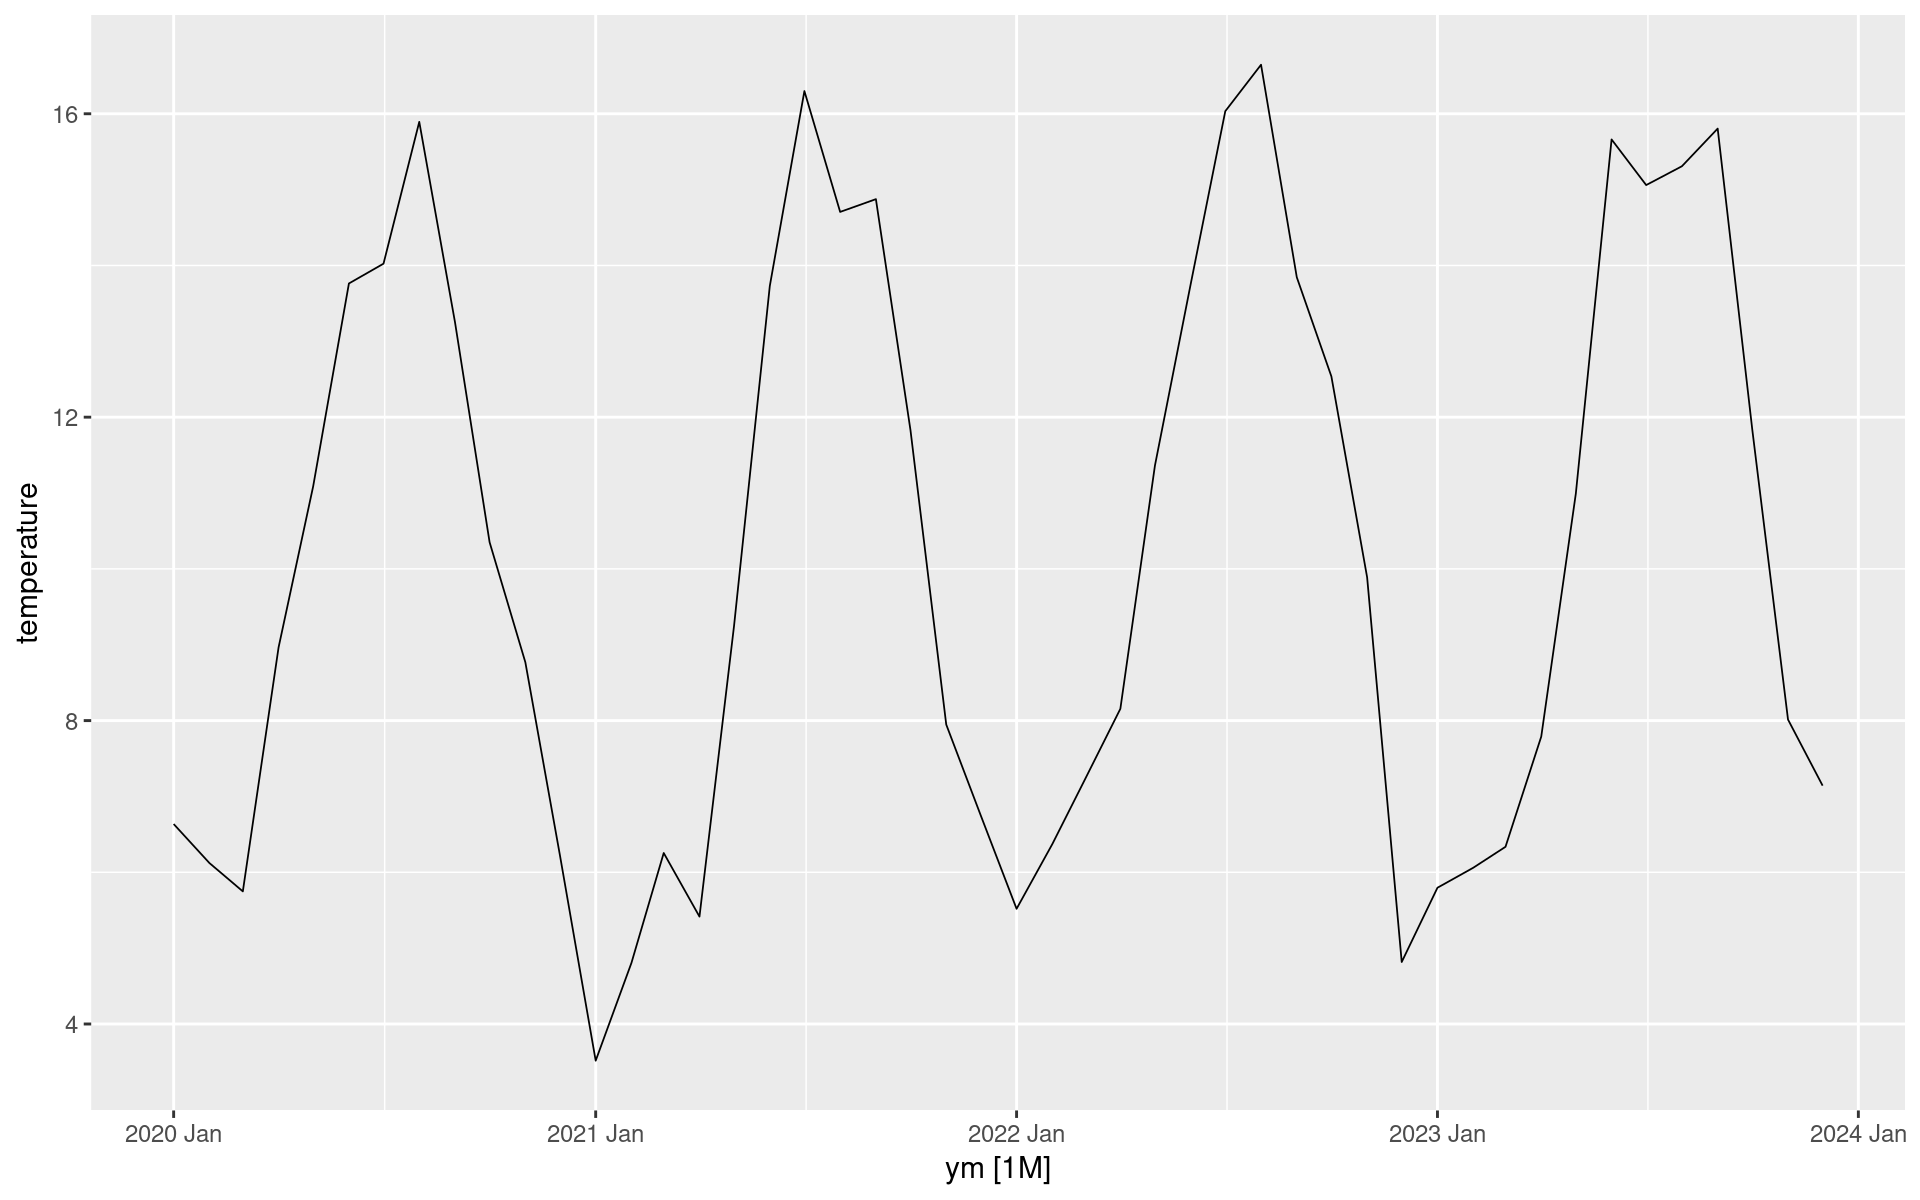

In [32]:
addata_monthly <- addata |> index_by(ym = ~ yearmonth(.)) |>
  summarise(temperature = mean(temperature))

addata_monthly |> autoplot(.vars = temperature)

That's better! For this next bit don't focus so much on the code we are using.

We'll cover a lot of it in much more detail later, for now just look at the outputs.

Here is our full decomposition to refer back to:

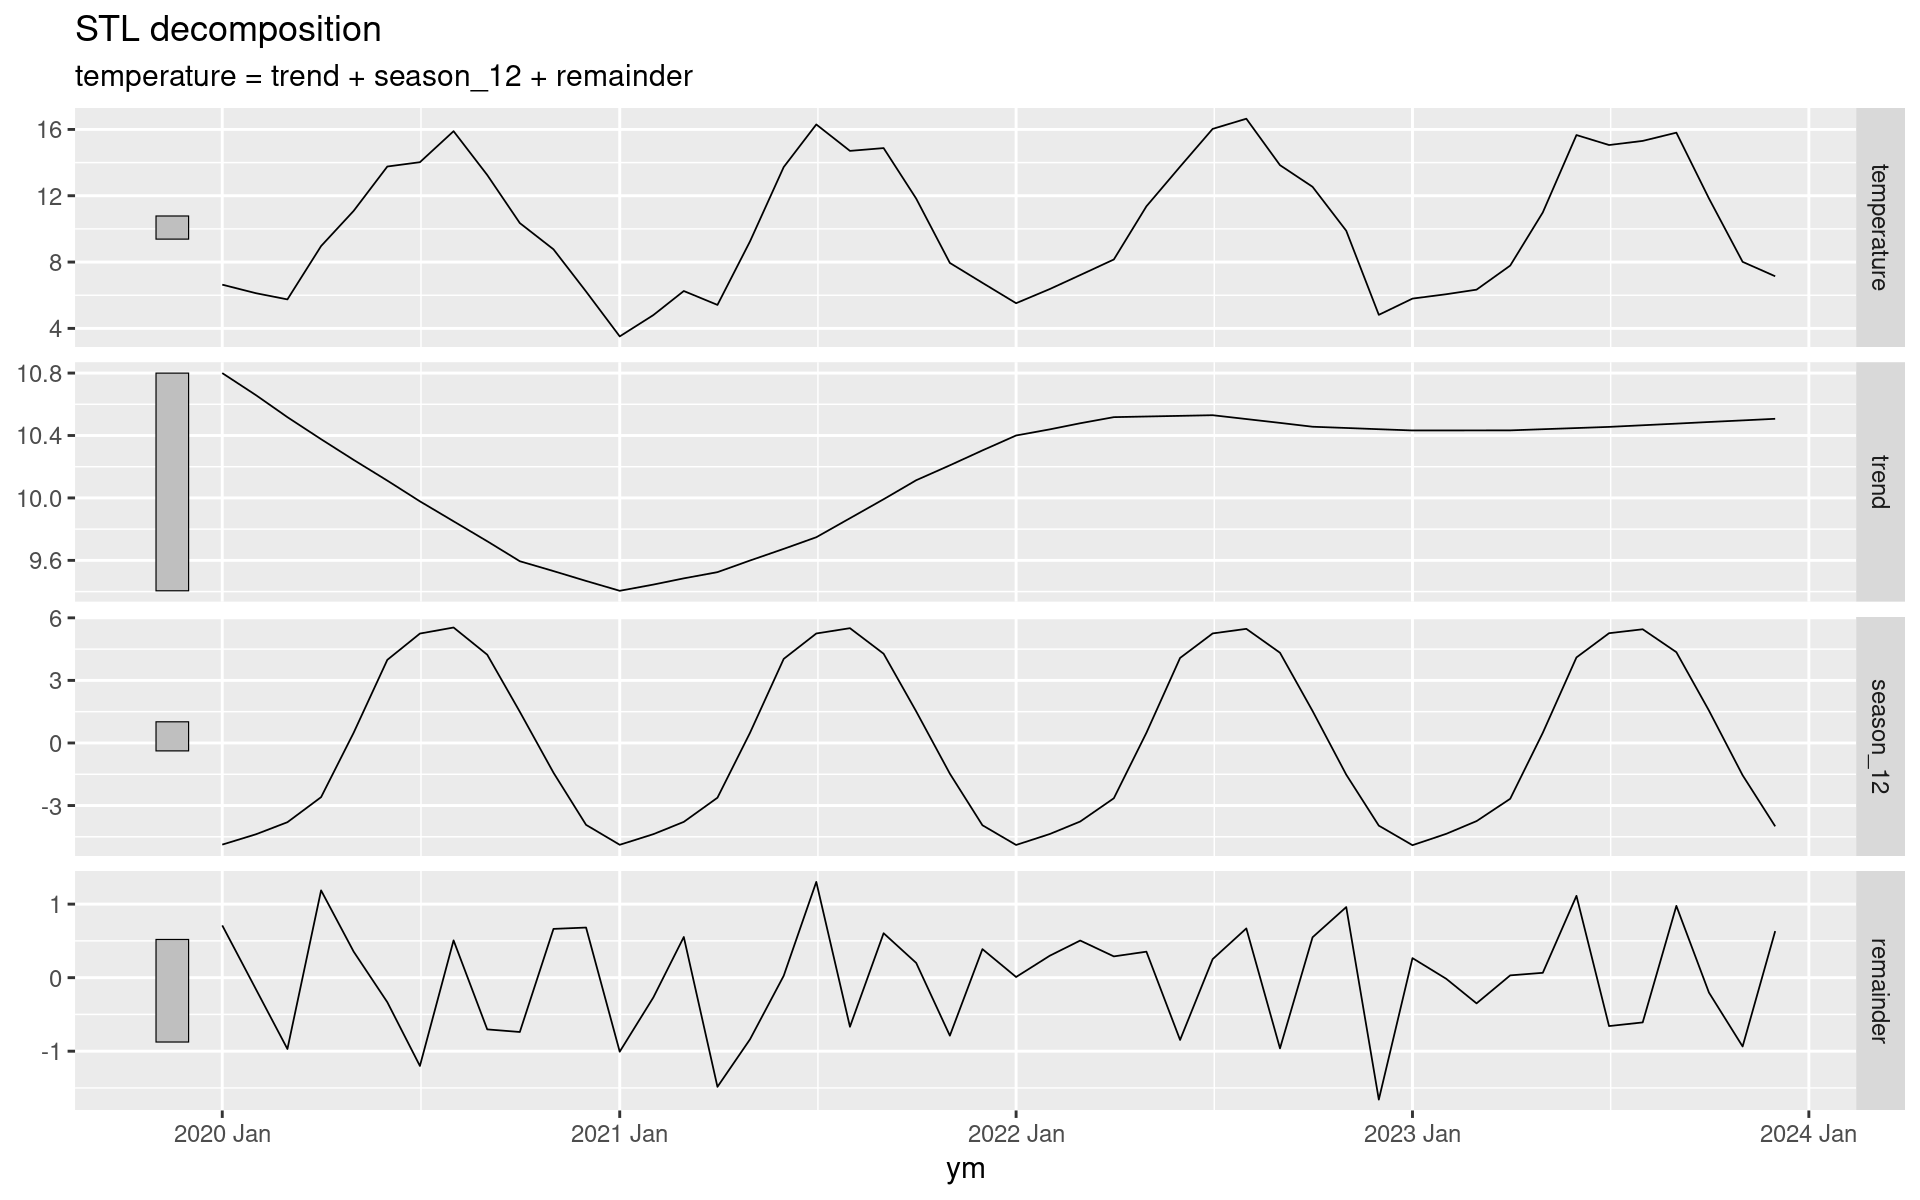

In [33]:
addata_monthly_components <- addata_monthly |> 
  model(
  STL(temperature ~ trend() +
        season(period = 12))
) |> components()

addata_monthly_components |> autoplot()

### Trend

The trend of a time series is its general movement over time. If the overall value is increasing in general, the trend will go up.

If there are moments in time where the value is significantly lower than "usual", you may see a dip in the trend.

Here we can see that there is a bit of a dip around the winter of 2020/2021.

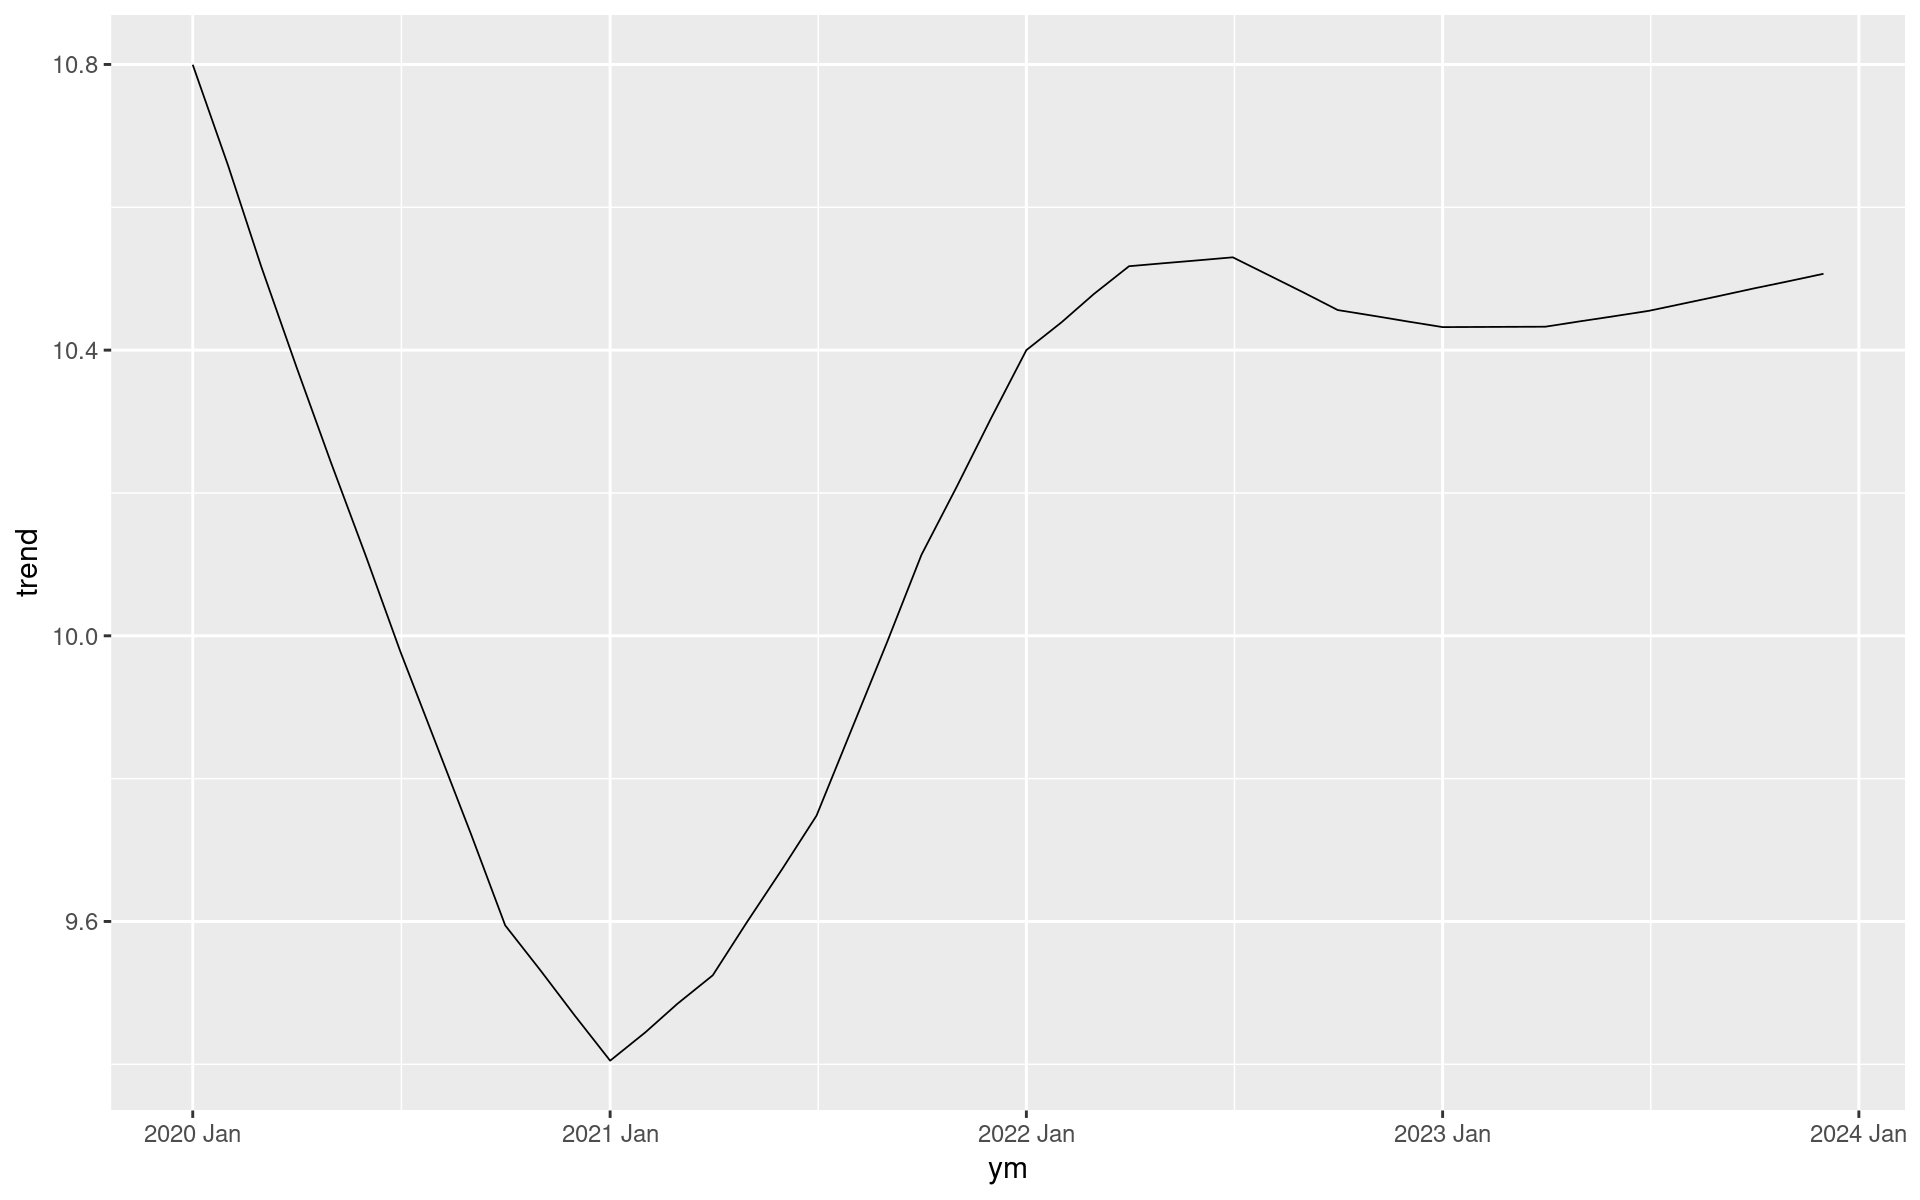

In [34]:
addata_monthly_components |> ggplot(aes(x = ym, y=trend)) + geom_line()

Maybe we could [verify](https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-temperature-rainfall-and-sunshine-anomaly-graphs) that this [really happened](https://en.wikipedia.org/wiki/2020%E2%80%9321_European_windstorm_season#Storm_Christoph) by looking at [some other](https://www.metoffice.gov.uk/about-us/news-and-media/media-centre/weather-and-climate-news/2021/2021-a-year-in-weather-a-review) [data sources](https://www.bbc.co.uk/weather/features/56944299).

Generally it's a good idea to verify that your analysis techniques are working by finding other information to assess whether your approach is valid.

### Seasonality

Seasonality is the name given to cyclic effects within a time series. These could be yearly cycles corresponding to changing temperatures across the year. They could also be daily cycles corresponding to people's work schedules.

In this case we expect a yearly cycle of temperatures corresponding to the different seasons within the UK.

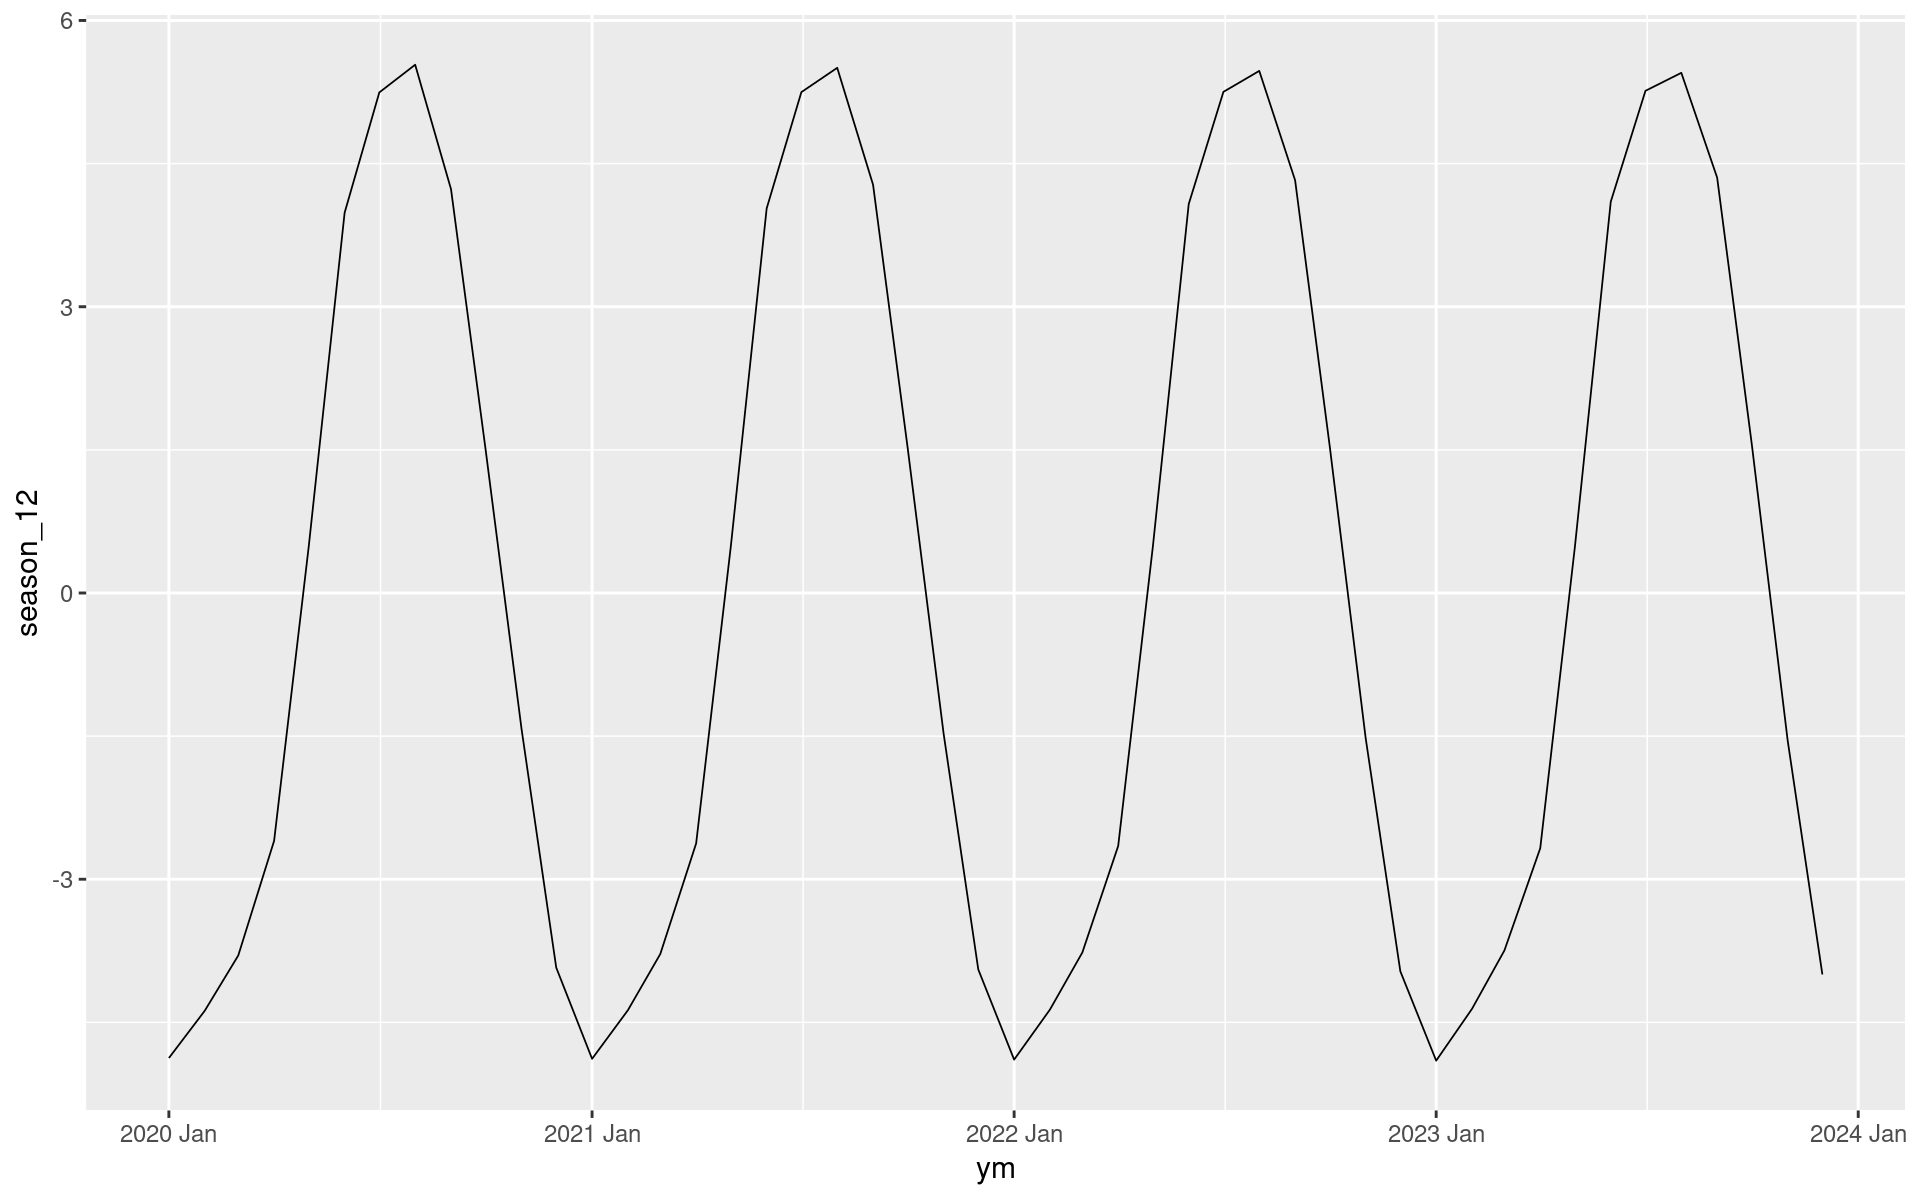

In [36]:
addata_monthly_components |> ggplot(aes(x = ym, y=season_12)) + geom_line()

The amount of time between repeats of a cycle is known as the **period** of the seasonality.

Often the period of a seasonal signal is directly related to the physical mechanism/s that causes said signal.

### Random noise (or the remainder component)

The final component is generally a "noise" component. This contains any extra variability present in the data once the general trend and seasonal components have been removed.

This is very often quite unpredictable and uncorrelated. Very generally speaking, we expect the random noise in most cases to be approximately [stationary](https://en.wikipedia.org/wiki/Stationary_process) and in an _additive_ model, to be centred around 0.

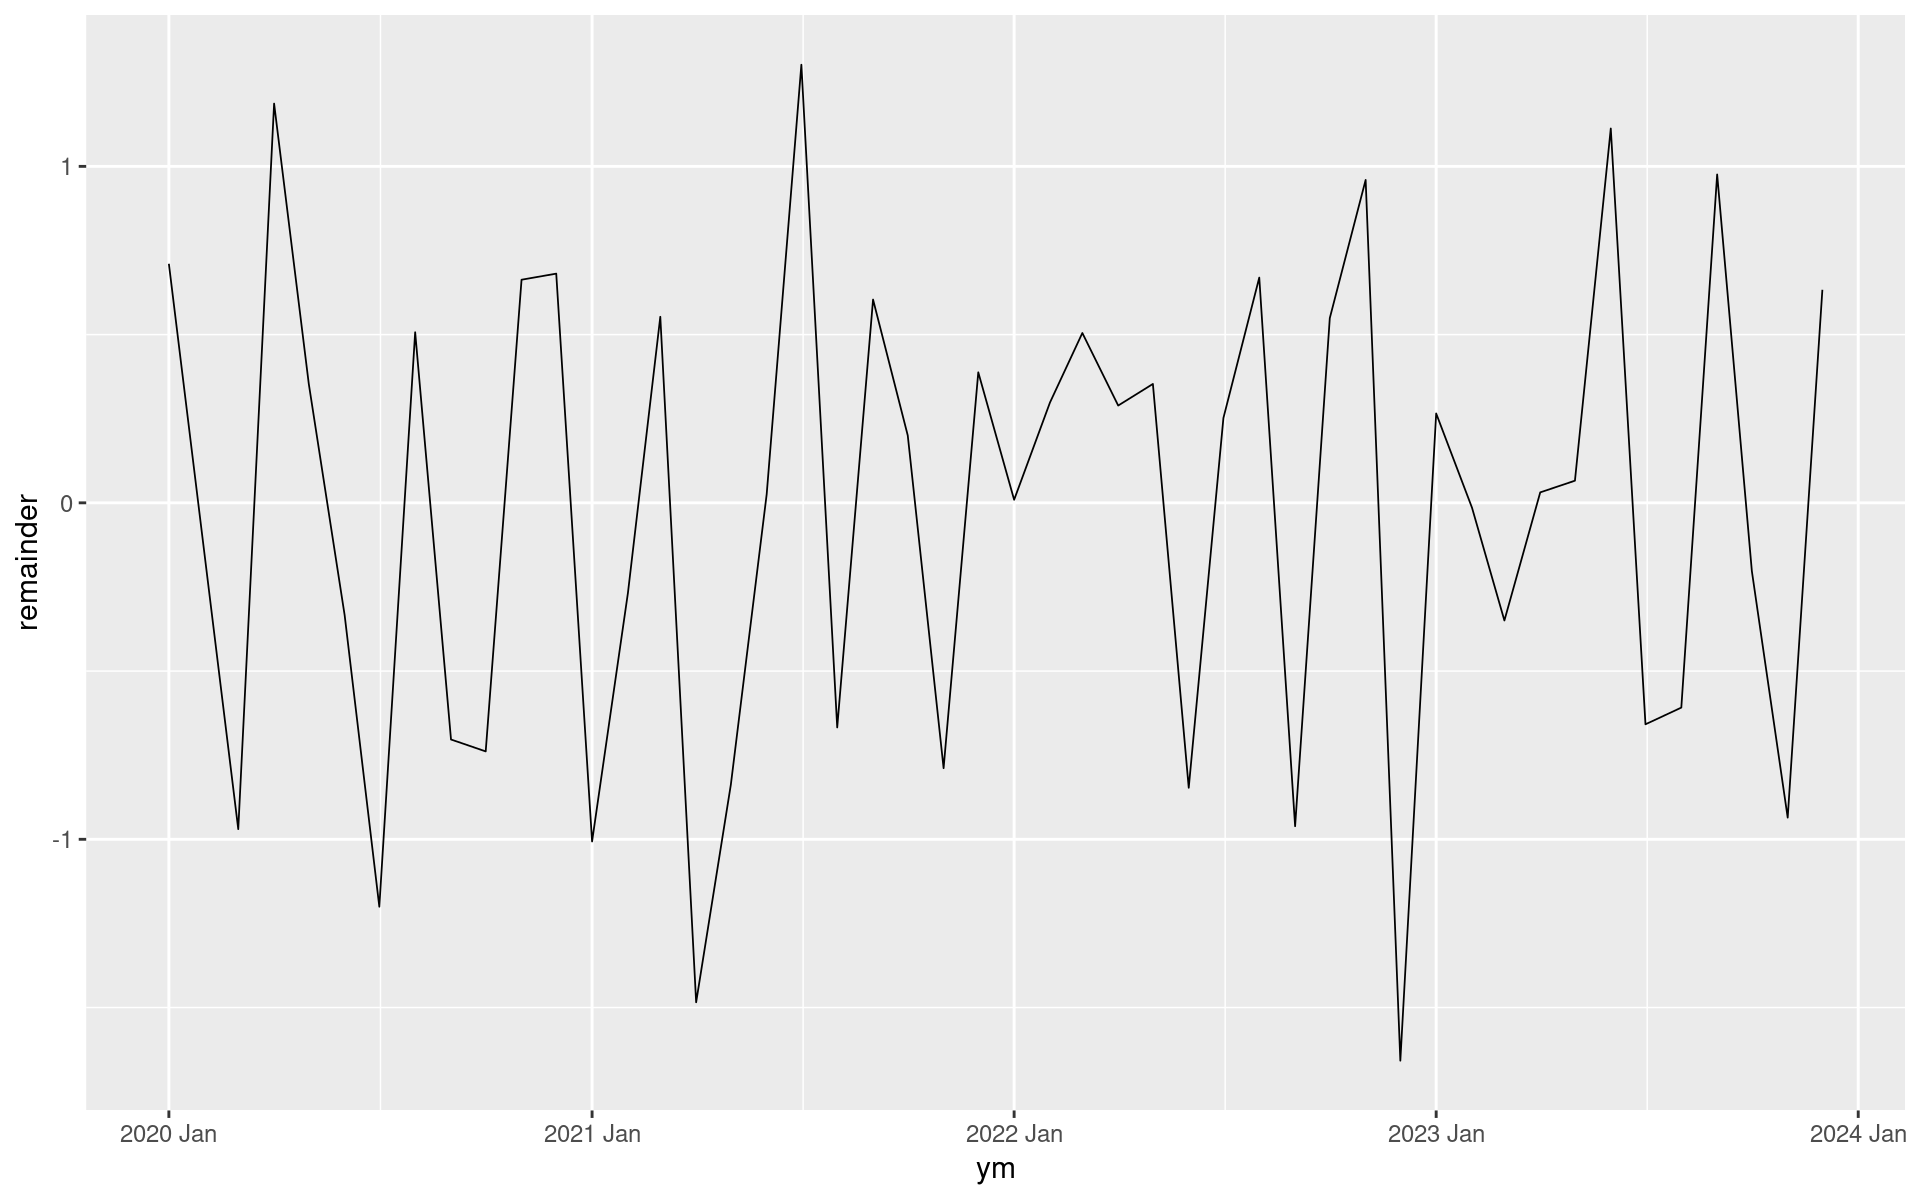

In [37]:
addata_monthly_components |> ggplot(aes(x = ym, y=remainder)) + geom_line()

### Challenge

Time for an exercise! Don't worry about what the code does for now, instead just focus on the plot outputs.

1. Adapt the following code to get data for different countries. Have a look at their trend and seasonality components.
2. Use the code to specifically investigate one of the following countries: `Indonesia`, `Ecuador`, `Singapore`. What do you notice?

Remember to look carefully at the scale of the y axis on each subplot!


**Note:** If you are struggling to find the given name for a country within AD, enter the following command into R to get a list of all country names:

---

### Additive decompositions

Now you've taken a look at the components of a time series decomposition, it's probably best to understand a little more about how to put one together yourself.

The simplest form of time series decomposition is known as a _classical decomposition_.

Classical decompositions contain a few assumptions about the components of the time series in question.

Generally a decomposition (specifically an _additive_ decomposition) expects that a time series $x_t$ can be written as the equation:

$$x_t = T_t + S_t + R_t$$

where $T_t$ is the trend, $S_t$ is a regular seasonal component, and $R_t$ is the random noise (or the "remainder").

In a classical decomposition:

- $S_t$ and $R_t$ are both assumed to have a mean of approximately 0
- $S_{t+p} = S_t$ for a given period $p$

Let's run an additive classical decomposition on the data we previously retrieved from `vecdyn`:

Warning message:
“Removed 26 rows containing missing values or values outside the scale range (`geom_line()`).”


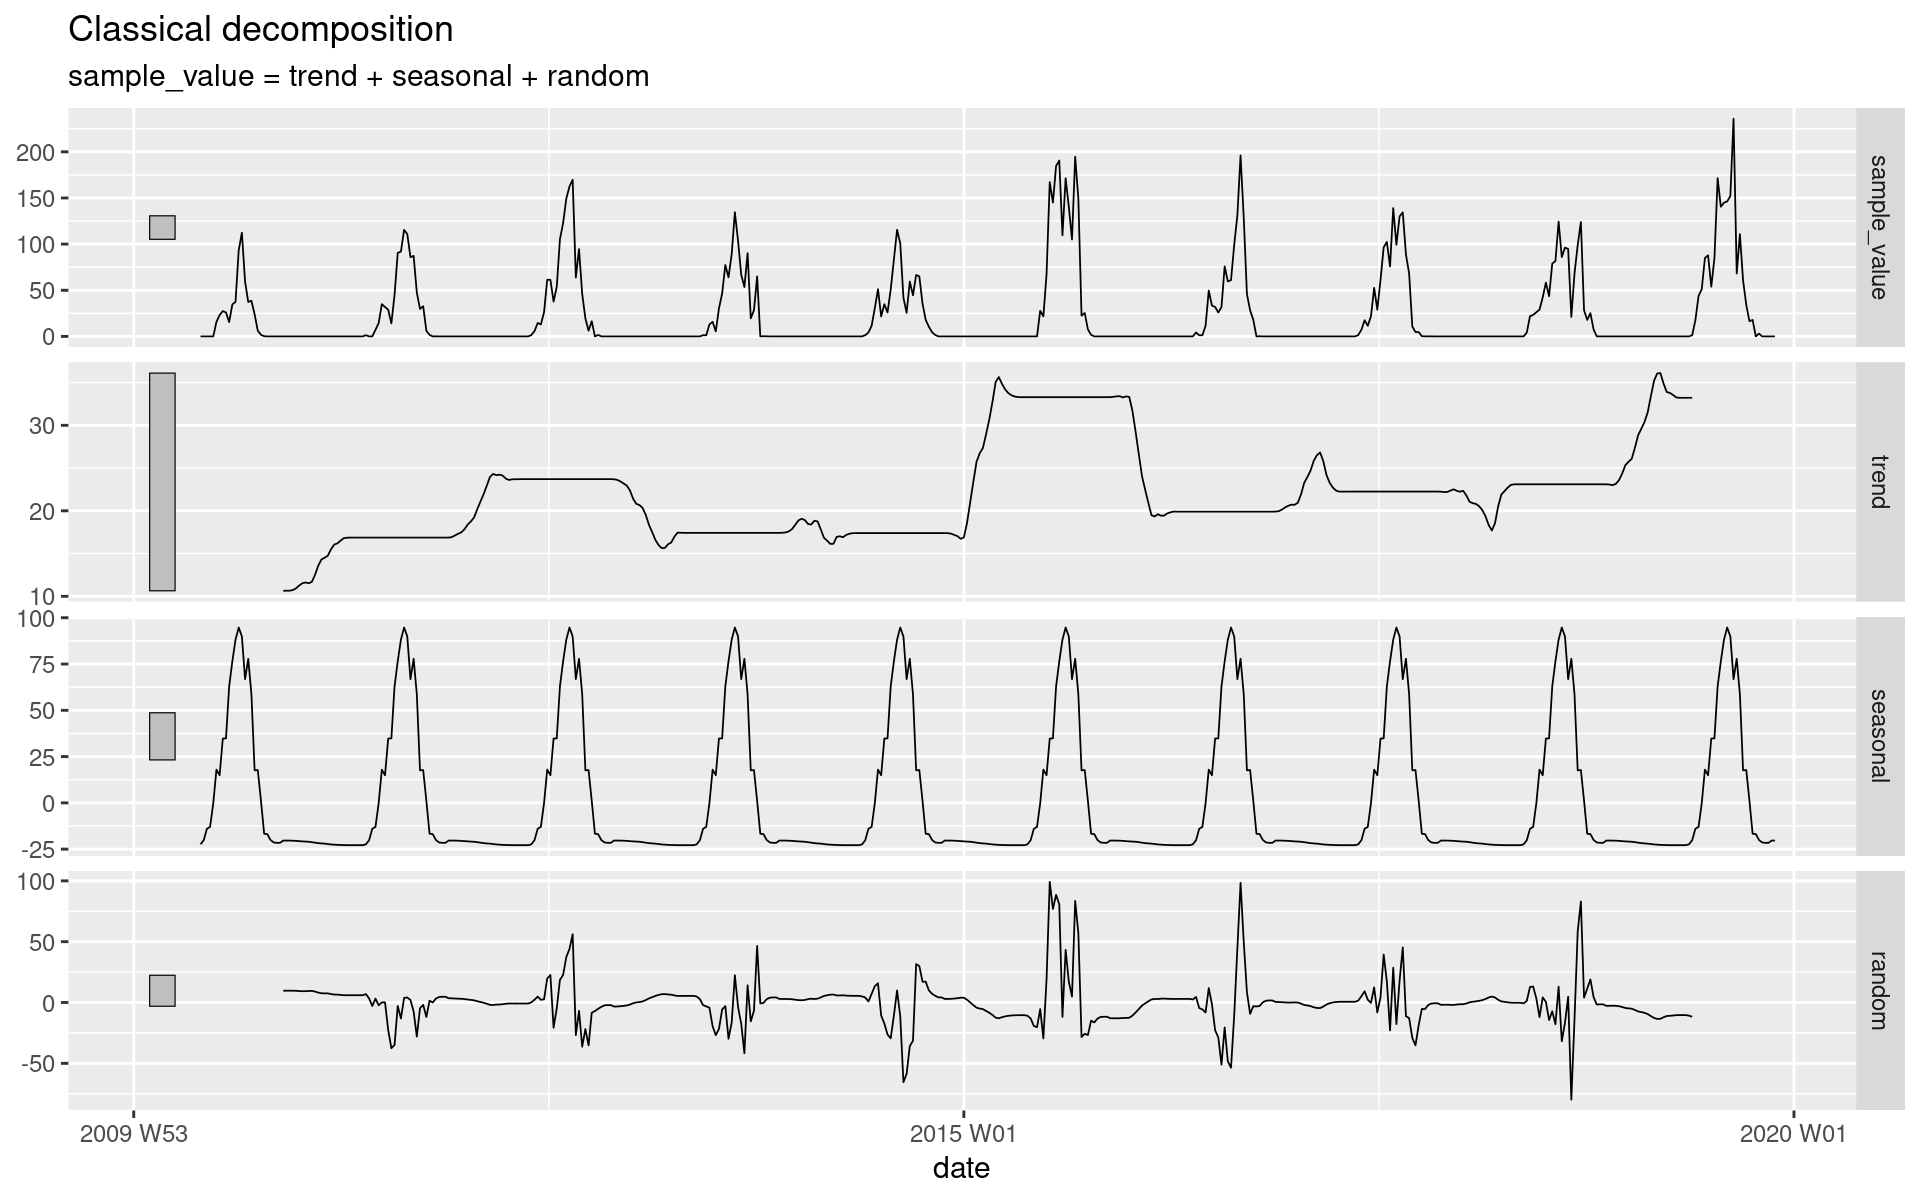

In [38]:
dfibble |> 
  model(classical_decomposition(sample_value, type = "additive")) |> # Define the classical decompostion model to fit
  components() |> # Extract the components from the fitted model
  autoplot()

Okay, not a terrible fit at all. It's successfully derived a 52-week seasonal signal, and the random noise is somewhat random at the places where real data was located (remember that we filled in the intermediate gaps with 0s).

Let's shift to a different data set for some more examples. Specifically there is a dataset included with `fpp3` called `aus_arrivals`. This is a quarterly time series of tourist arrivals into Australia between 1981 and 2011, by country of origin.

Let's quickly take a look at arrivals just from the UK

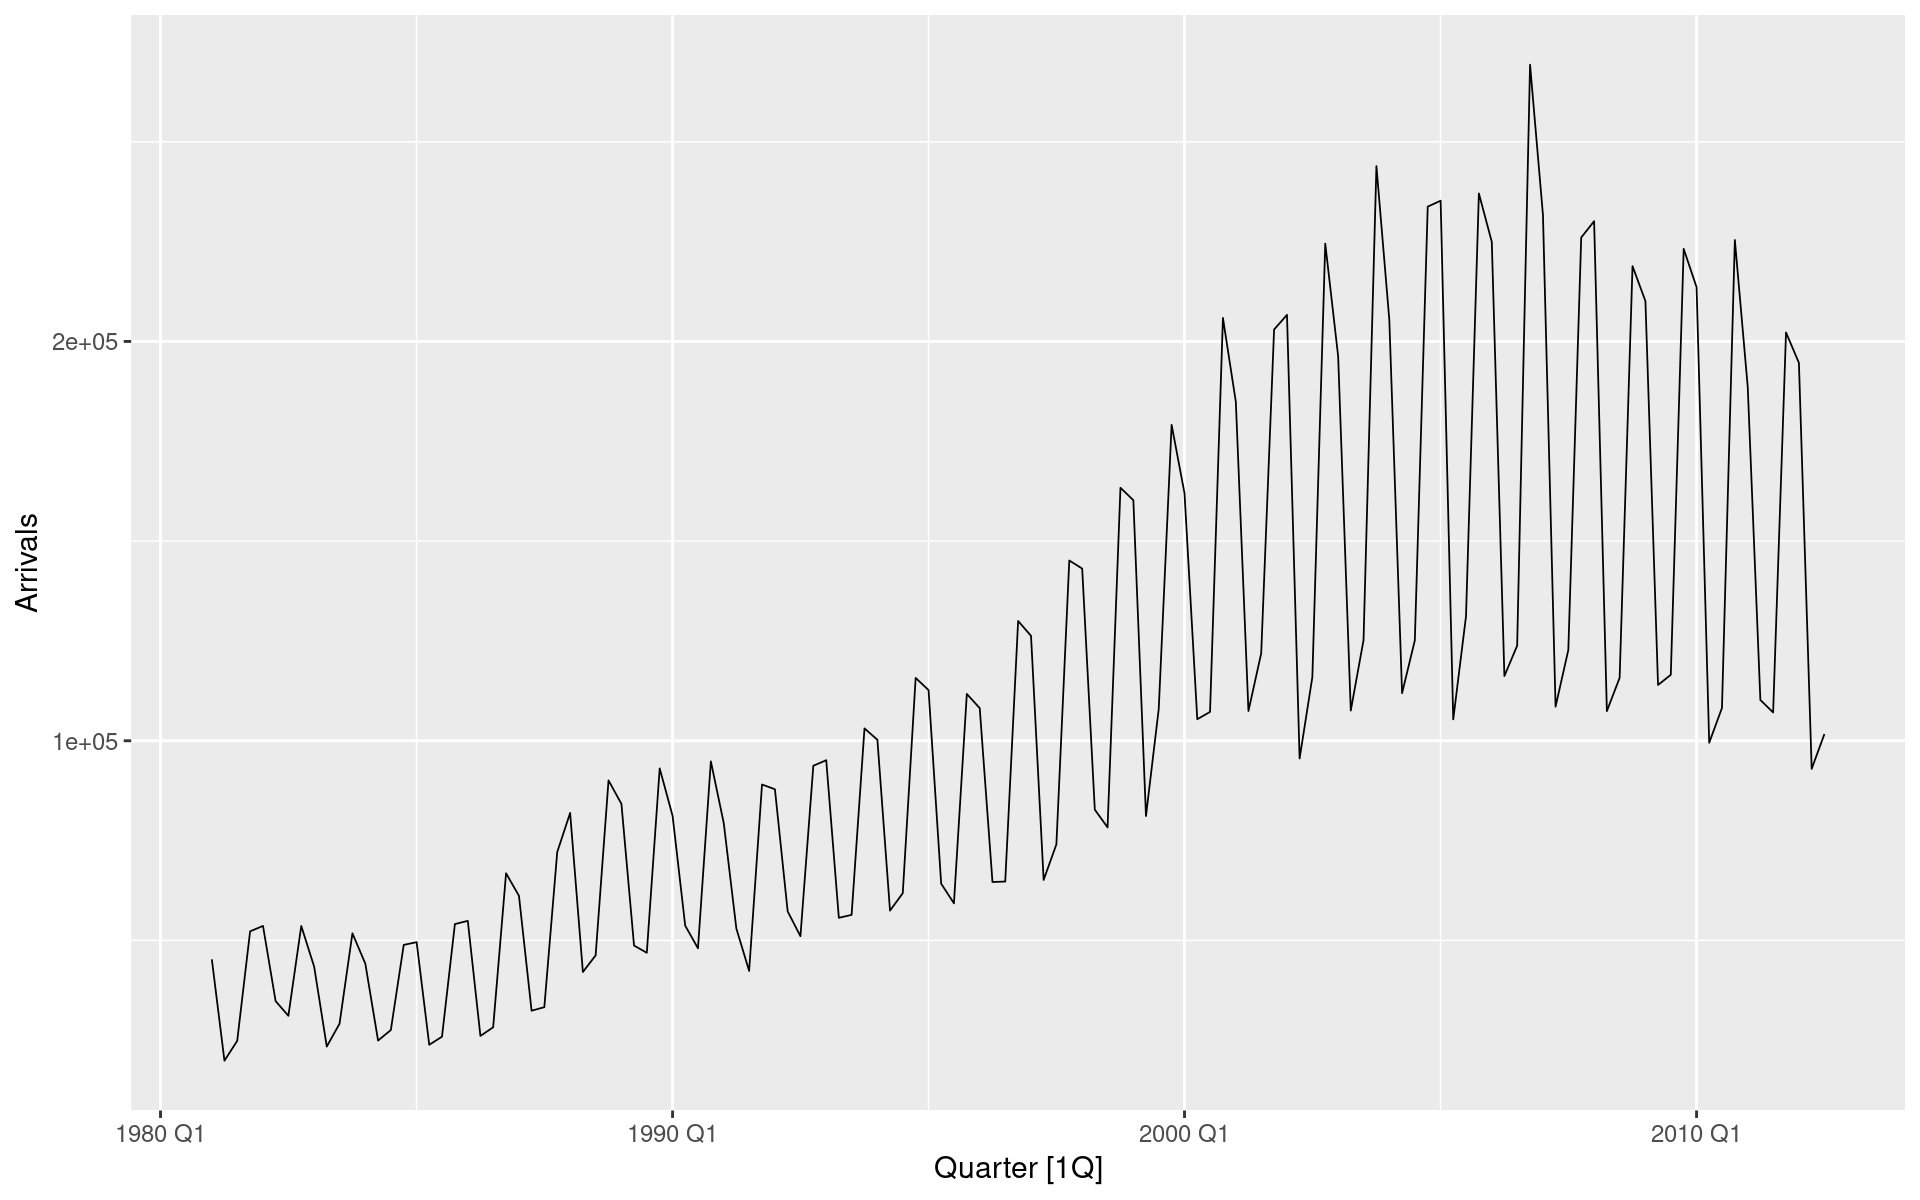

In [39]:
aus_arrivals |> 
  filter(Origin == "UK") |> 
  autoplot(.vars = Arrivals)

You may notice something different here, let's try an additive classical decomposition to see how that looks:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_line()`).”


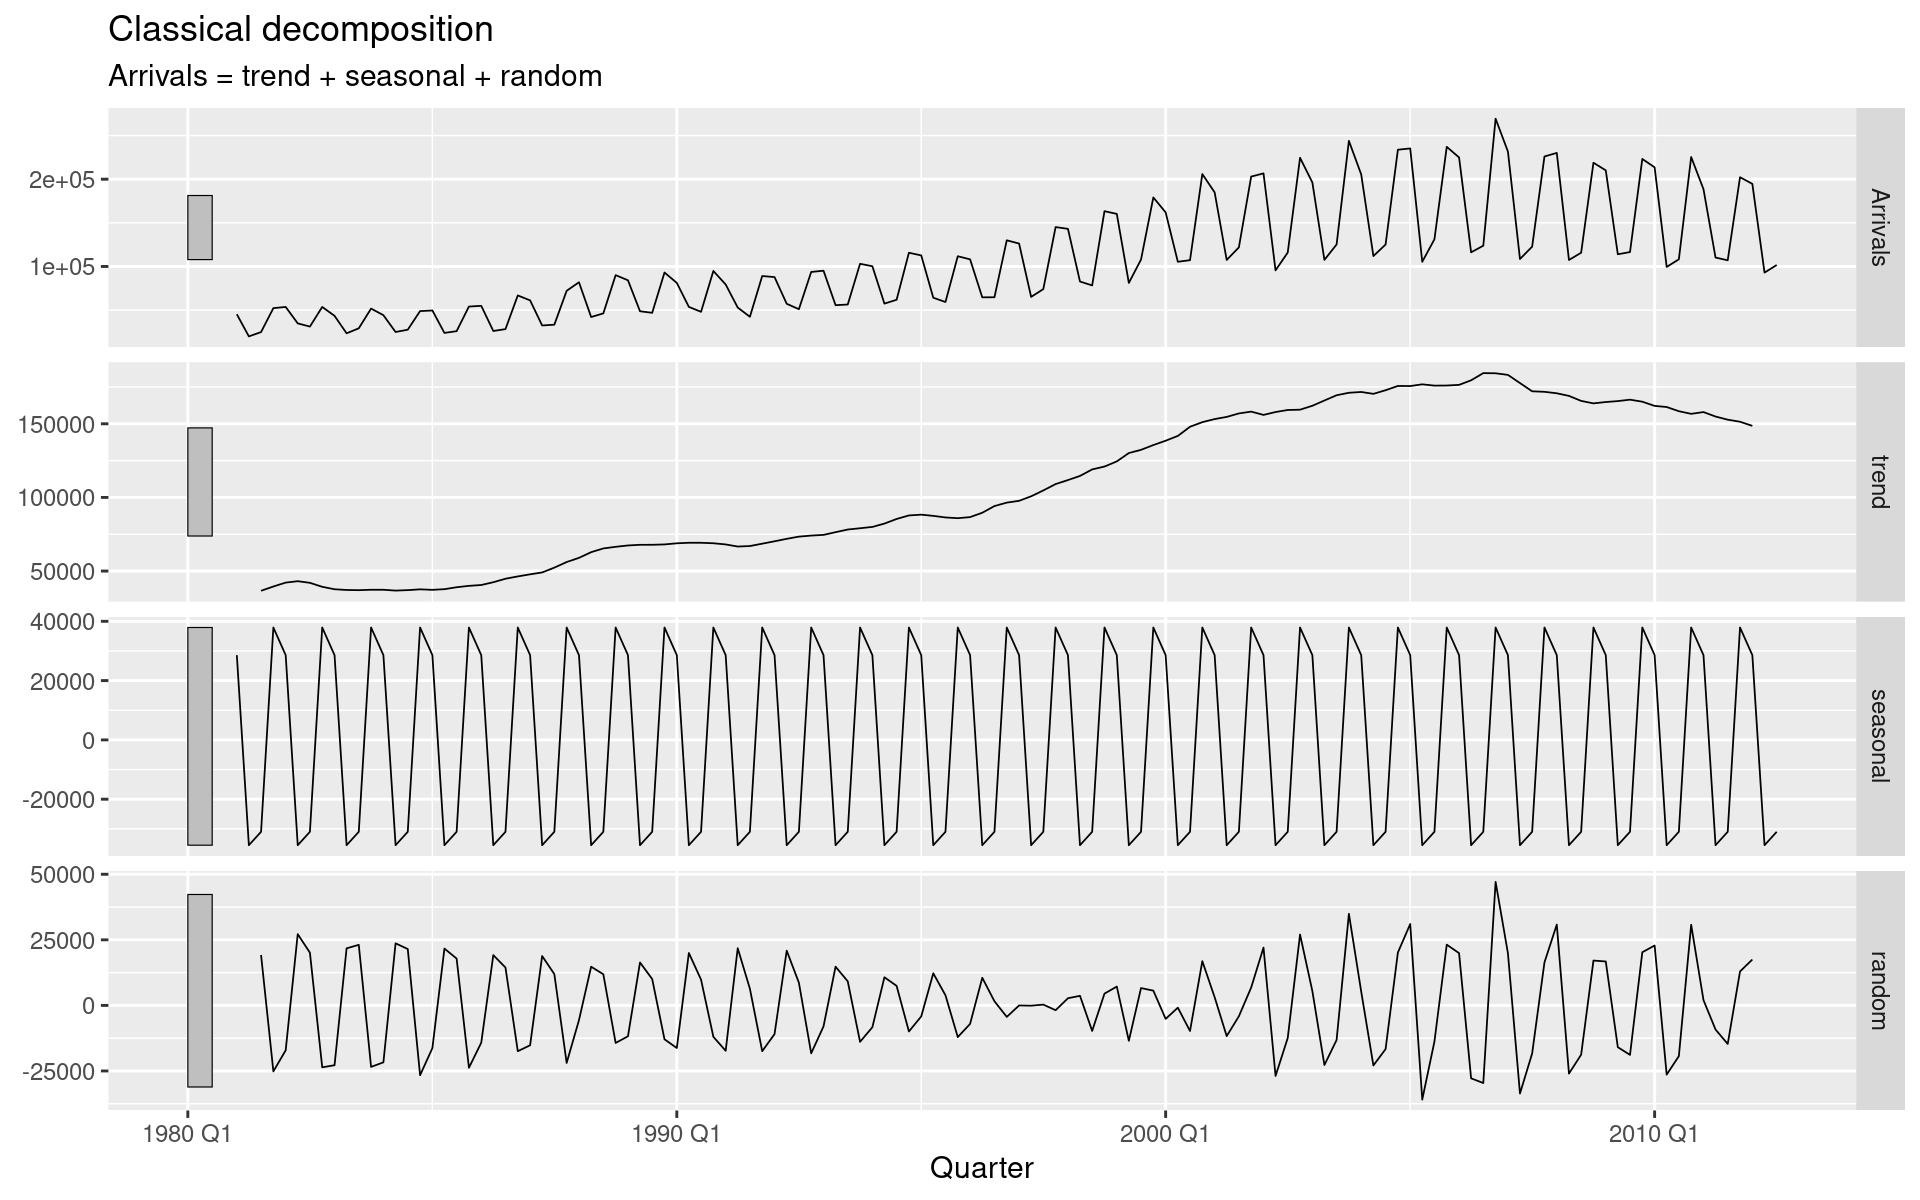

In [40]:
aus_arrivals |> 
  filter(Origin == "UK") |> 
  model(
    classical_decomposition(Arrivals, type = "additive")
  ) |> 
  components() |> 
  autoplot(.vars = Arrivals)

Hmm, generally we got a sensible trend out, but that random part is looking a bit odd. The scale of it is all over the place!

If you look back at the raw data (top segment of this plot) you can see that as the mean arrivals grows larger, the seasonal variance also seems to get wider.

This is a classic indication of a _multiplicative_ process.

### Multiplicative decomposition

A multiplicative decomposition uses a slightly different equation to additive decomposition. You may already be able to guess its form:

$$x_t = T_t S_t R_t$$

Out of interest, due to the magic of _logarithms_ this is functionally identical to stating the following additive process:

$$\log{x_t} = \log{T_t} + \log{S_t} + \log{R_t}$$

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_line()`).”


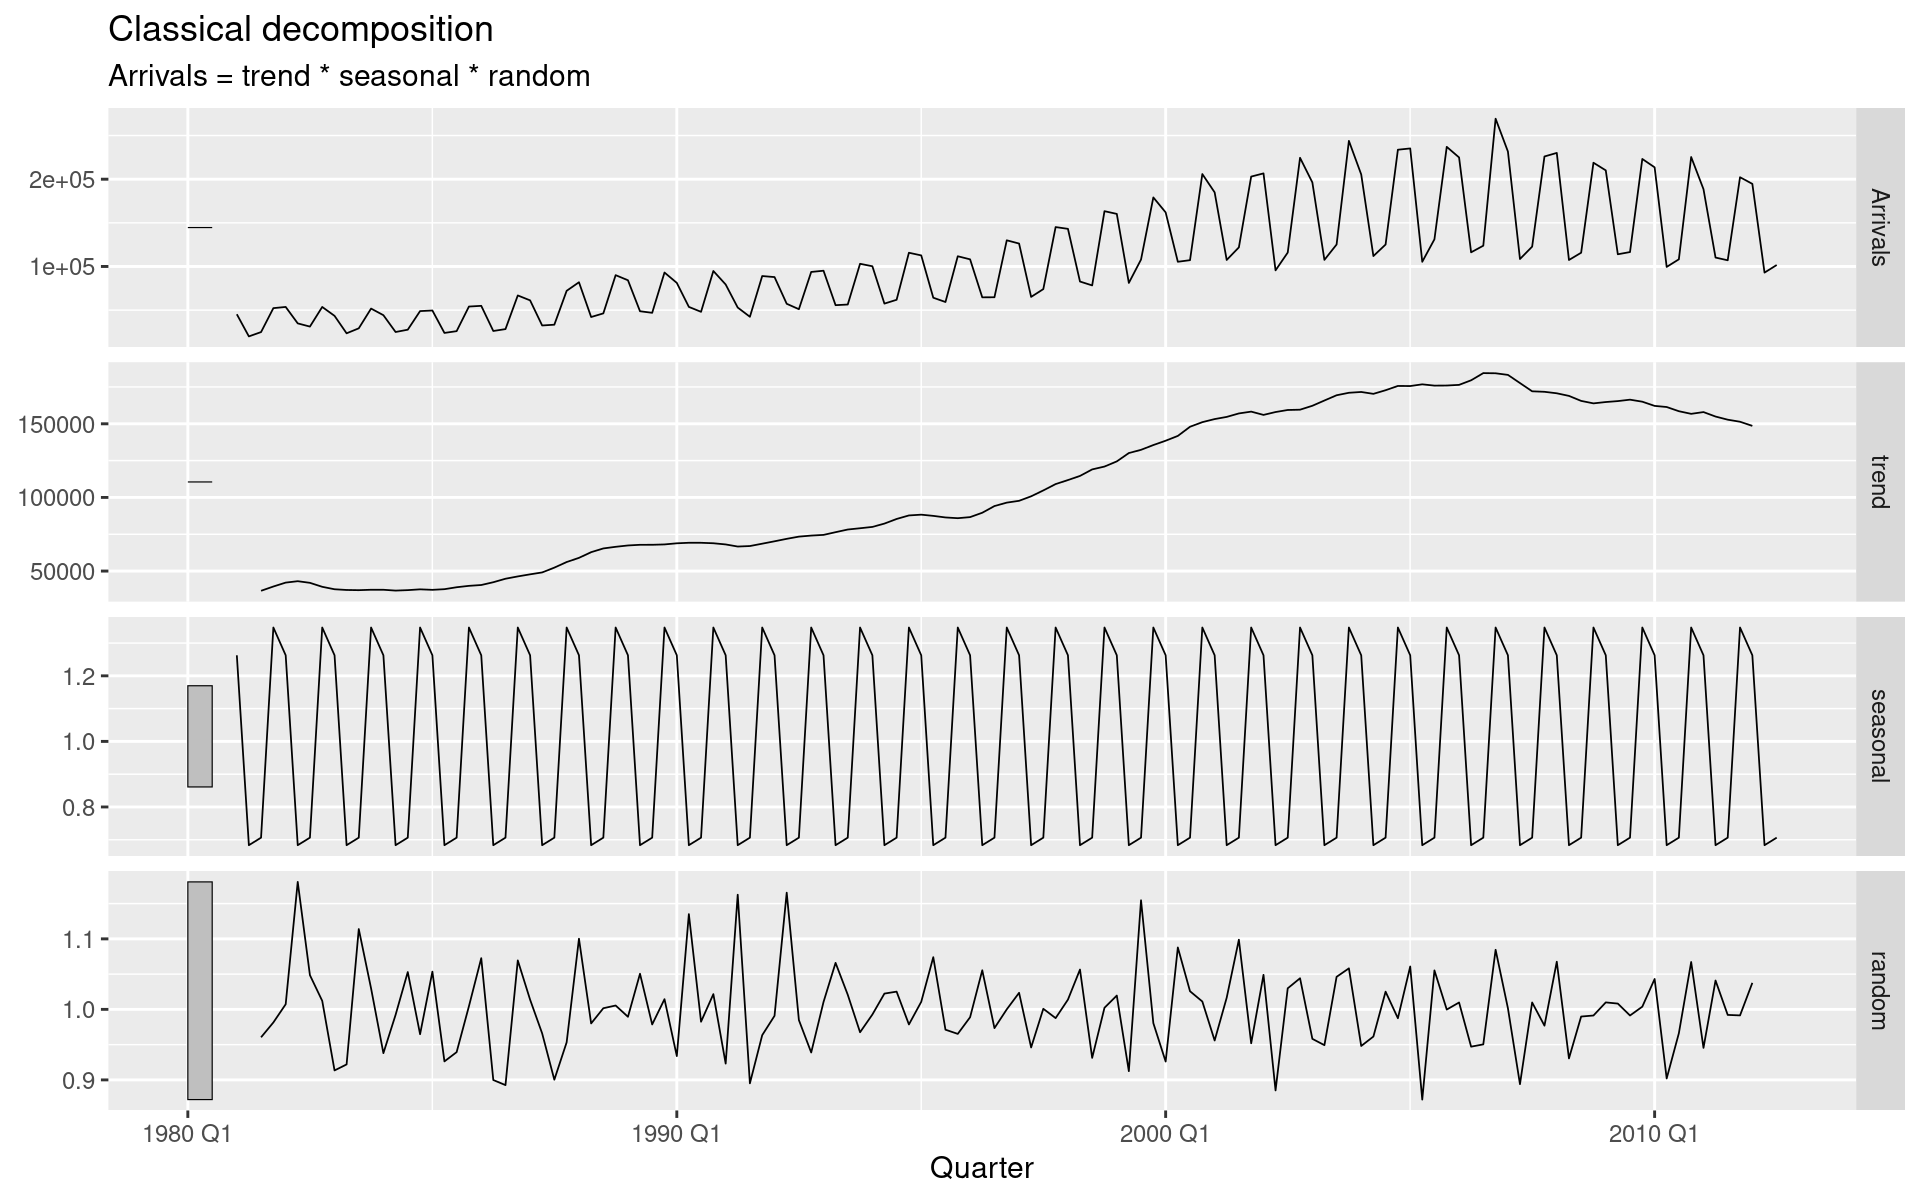

In [41]:
aus_arrivals |> 
  filter(Origin == "UK") |> 
  model(
    classical_decomposition(Arrivals, type = "mult")
  ) |> 
  components() |> 
  autoplot(.vars = Arrivals)

Whilst the trend and seasonal signal period are basically the same here, the random noise component seems a lot more nicely behaved, with a fairly stationary mean and variance.

**Note:** if a process has a steady mean and variance over time, it is referred to as _stationary_. This is an important word that you may well come across when reading papers about time series from a statistical perspective.

Let's take a look at another multiplicative decomposition from this data, specifically the arrivals from Japan:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_line()`).”


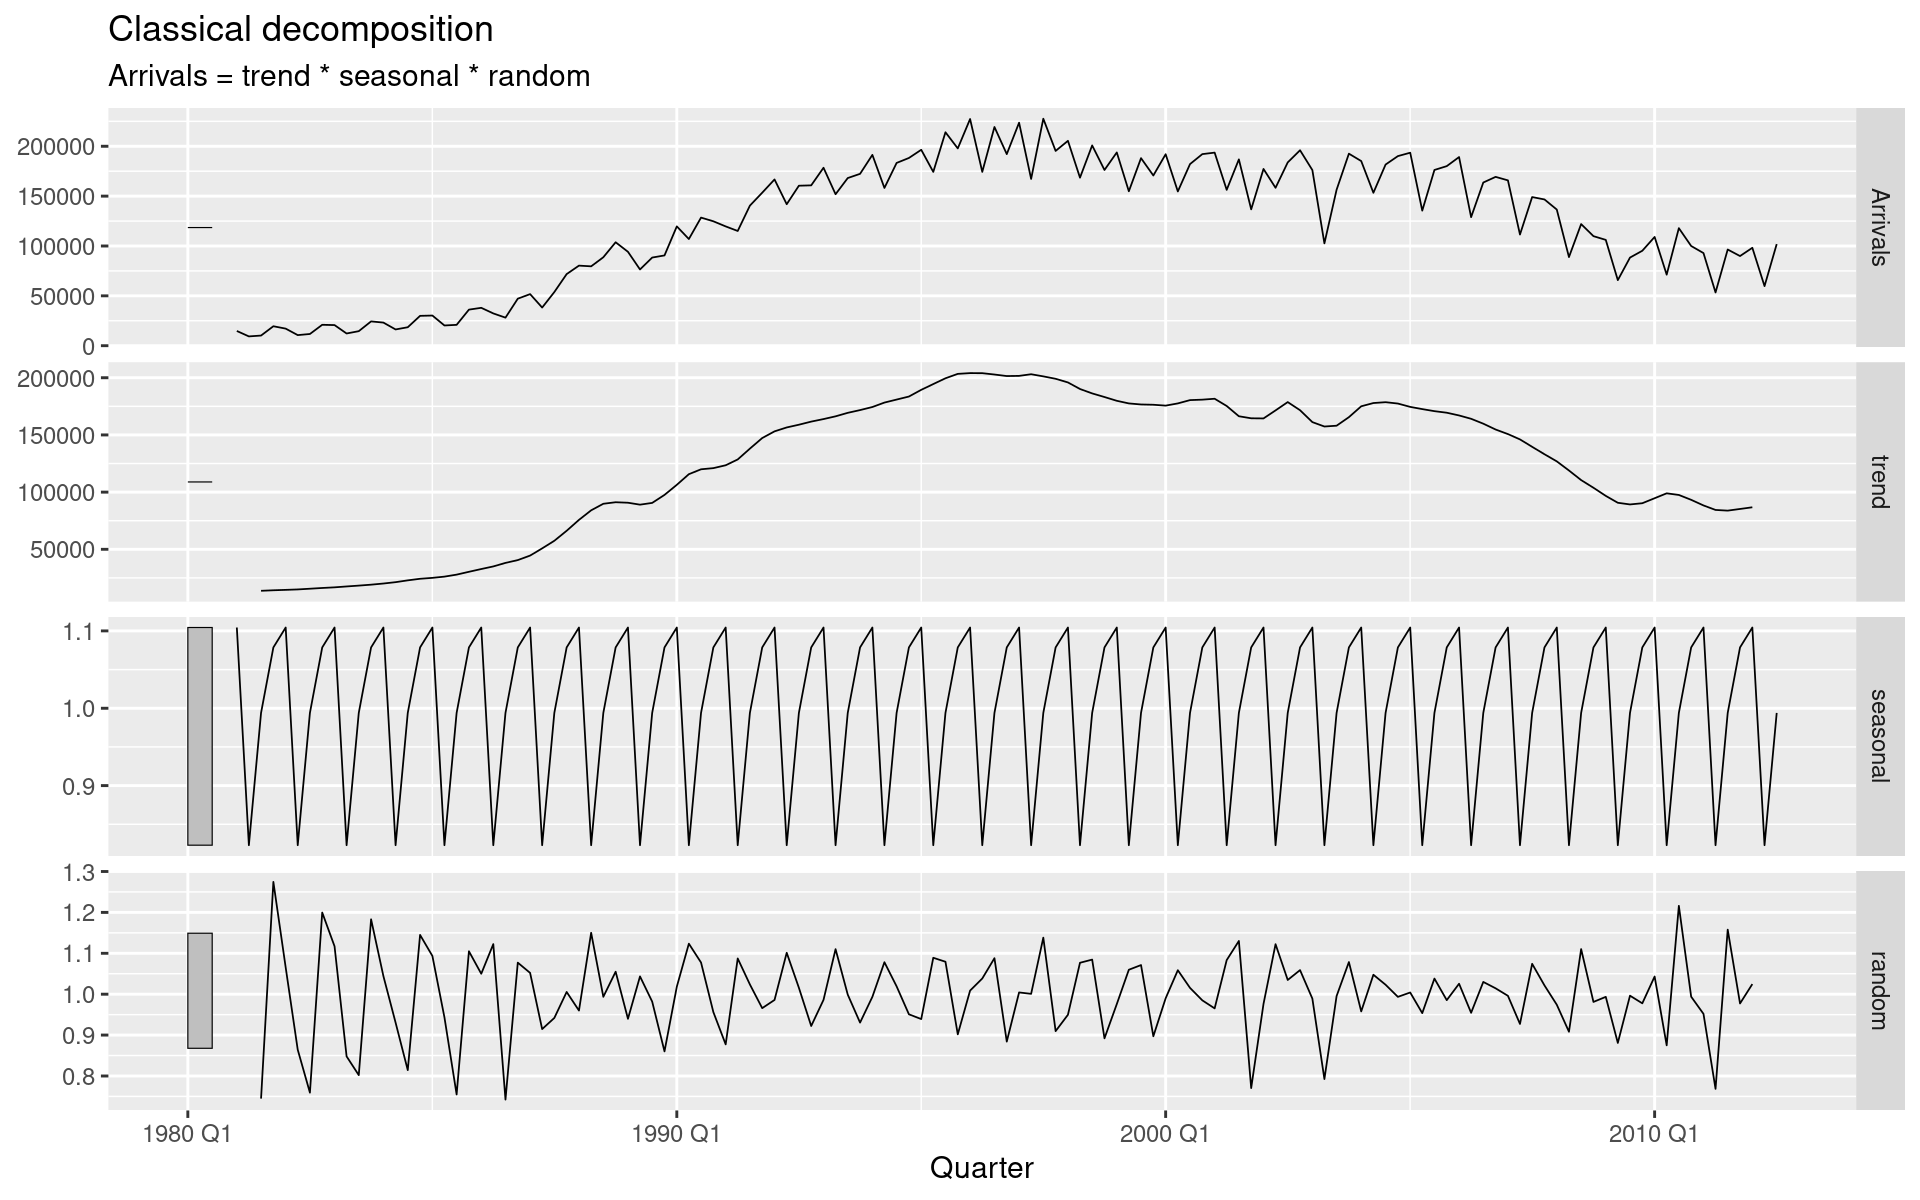

In [42]:
aus_arrivals |> 
  filter(Origin == "Japan") |> 
  model(
    classical_decomposition(Arrivals, type = "mult")
  ) |> 
  components() |> 
  autoplot(.vars = Arrivals)

This is a bit more troubling. That random component is still varying over time, and there seems to be some periodic signal in the first years of data.

It seems like the seasonality of this data changes at around 1995, however classical decomposition assumes a constant seasonality throughout the dataset.

[We're gonna need a bigger boat.](https://images2.minutemediacdn.com/image/upload/c_fill,w_1200,ar_4:3,f_auto,q_auto,g_auto/shape/cover/sport/screen-shot-2020-05-14-at-12-15-19-pm-a831ebd9882da268434b34ed117a9410.jpg)

### Advanced decomposition

There are more advanced methods of time series decomposition, the best known of which is called _STL_ decomposition (you may have seen this earlier if you paid close attention to the plot labels in the earlier temperature exercise).

STL decomposition stands for _Seasonal and Trend decomposition using LOESS_. LOESS is a form of nonparametric smoothing using local regression, and is used throughout the STL process.

Let's have another go at that japan arrivals time series, but this time using STL:

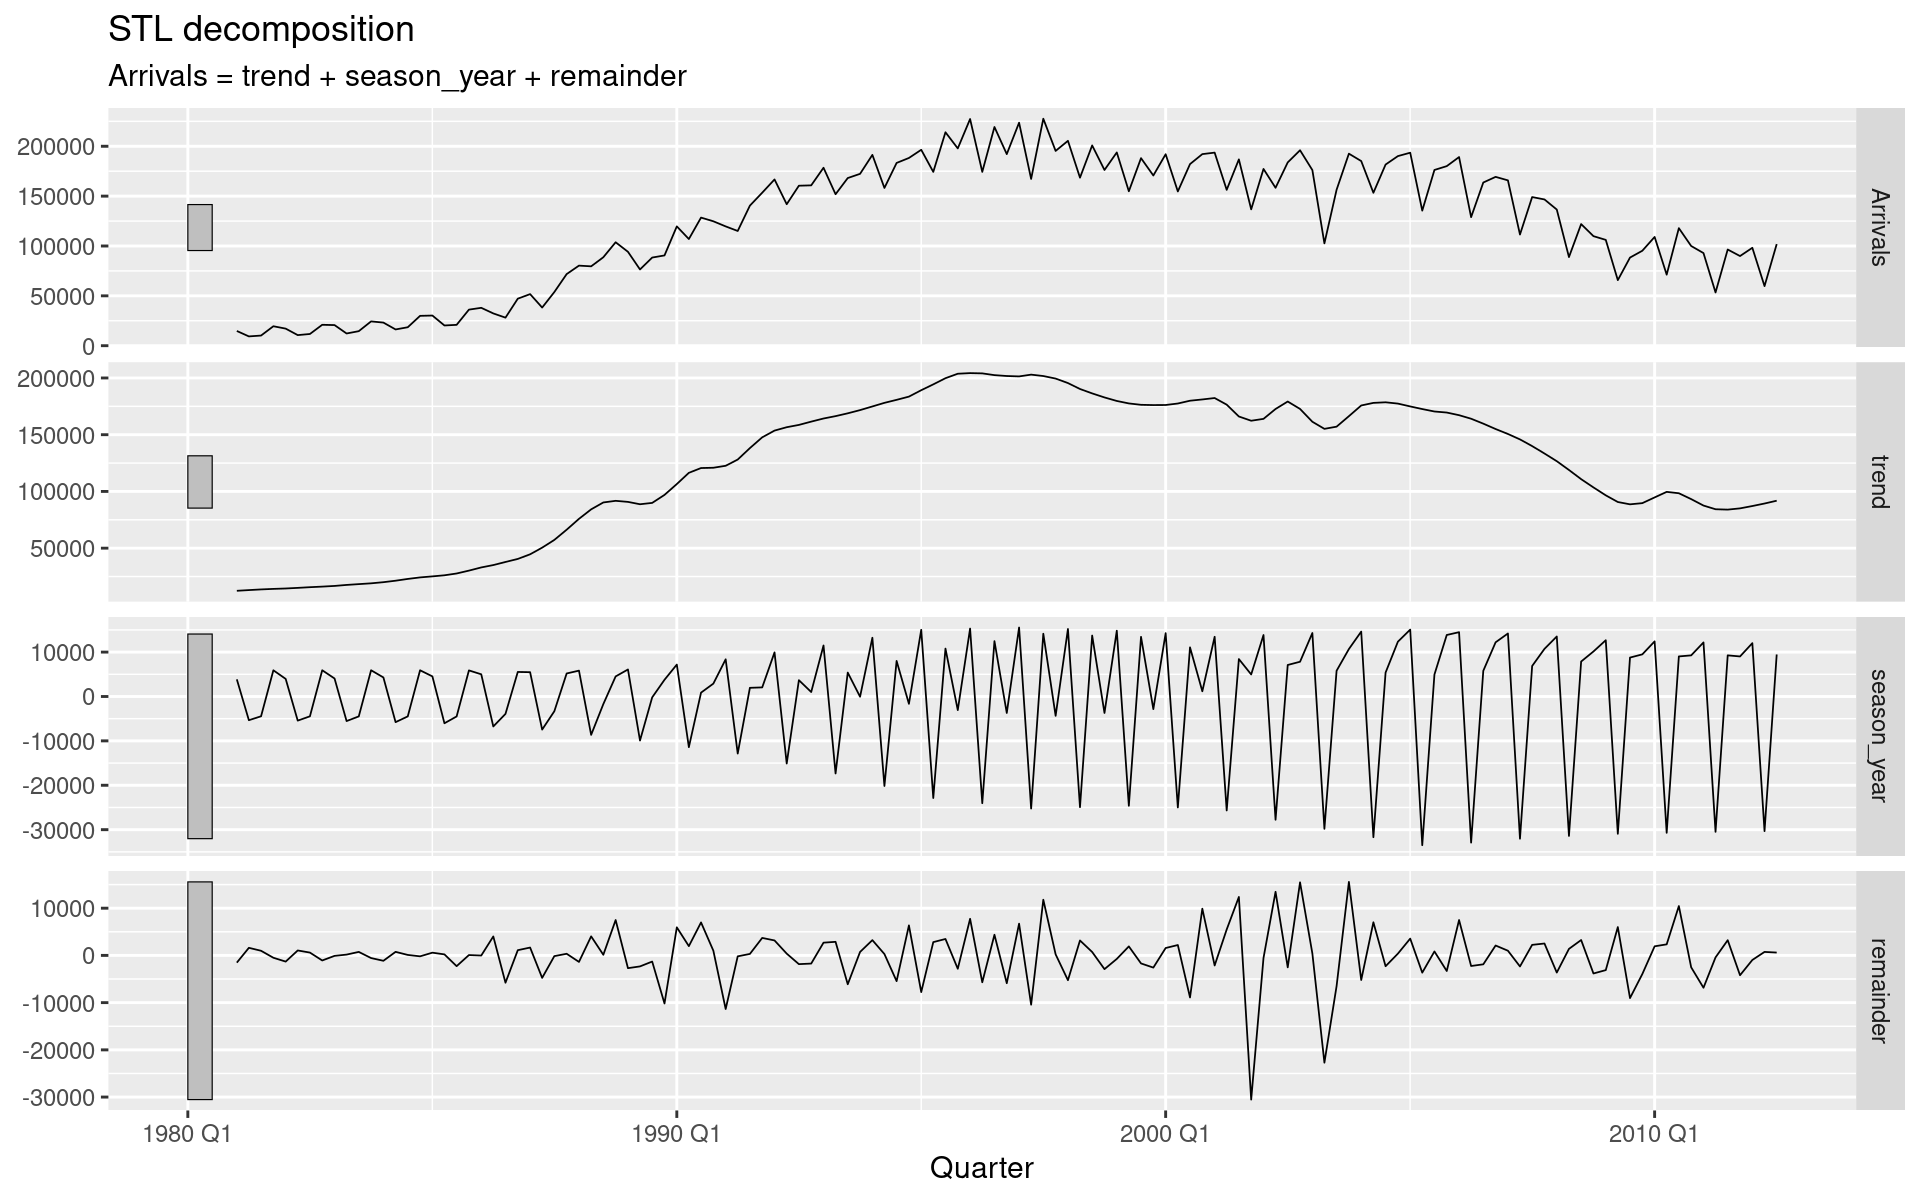

In [43]:
aus_arrivals |> 
  filter(Origin == "Japan") |> 
  model(
    STL(Arrivals ~ trend() + season())  # You may recognise this syntax from fitting linear models!
  ) |> 
  components() |> 
  autoplot(.vars = Arrivals)

This is looking a lot better in general, seasonality is now allowed to vary over time (mirroring what seems to be happening in the underlying process and thus in the data).

That has lead to a random (remainder) component with no repeating patterns or other weirdness. Seems like a much better decomposition!

Let's try doing an STL decomposition on the `vecdyn` data we pulled earlier:

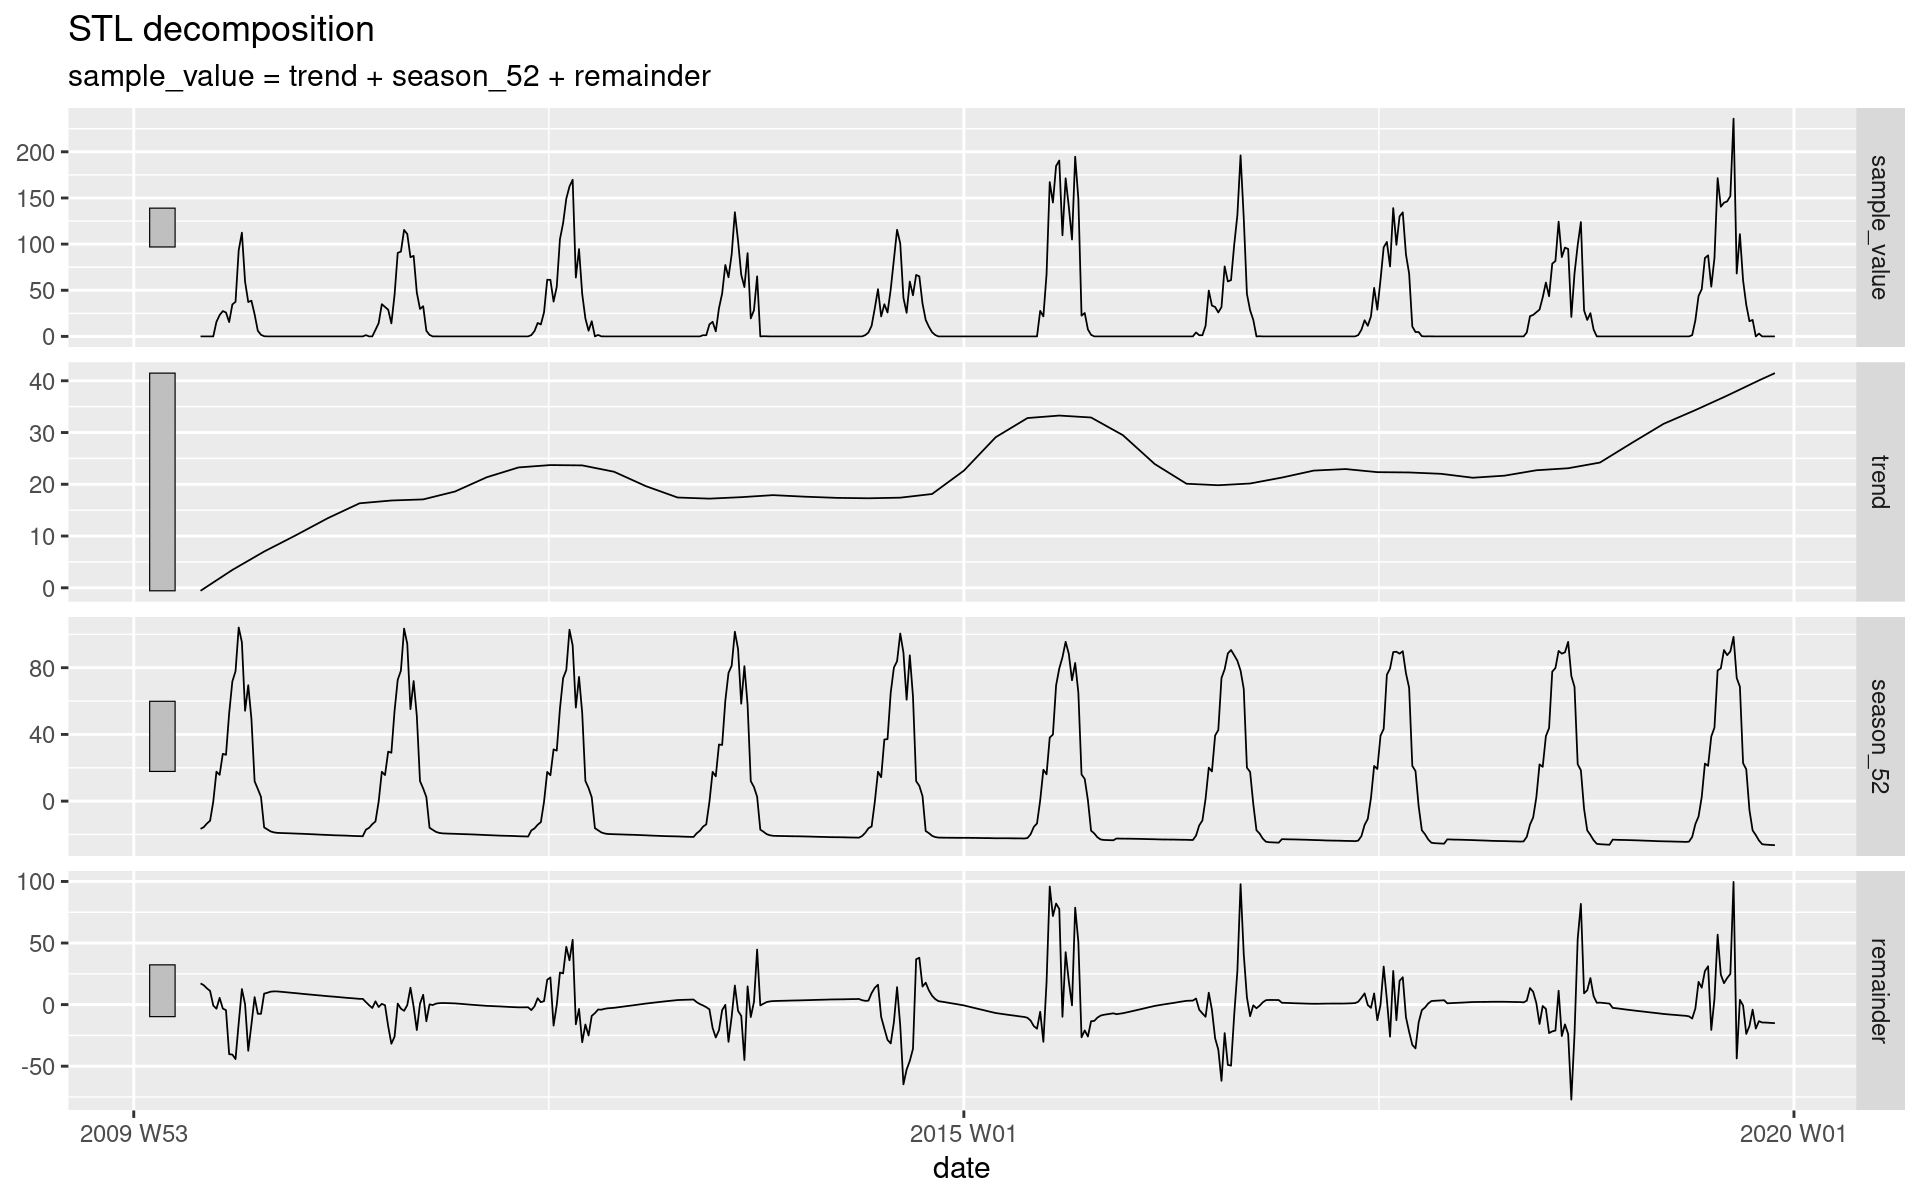

In [44]:
dfibble |> 
  model(
    STL(sample_value ~ trend() +
        season(period = 52))  # We have a 52 week periodicity as there is one major peak in the year.
  ) |> 
  components() |>
  autoplot()

The trend here looks a lot better than it did before! This is because the moving average method used by the classical decomposition estimation (provided by `stats::decompose()`) is using an inappropriate window size for the scale of the data, whilst LOESS handles it much more clearly.

It is actually possible to change this manually for classical decomposition, but frankly it's a bit of an arcane process.

**Note:** when deciding on an appropriate periodicity to encode into an STL model, you _must_ keep in mind the fundamental resolution of your data.

For this `vecdyn` data, it is in weekly form, so we cannot have a useful periodicity of 1 week or below.

STL decompositions can also handle multiple seasonal signals with different periods. This can be achieved by simply adding extra `+ season()` lines within the `STL()` call.

## Forecasting

A major goal in time series analysis is _forecasting_. This is essentially asking the following question:

> Given this data for the past, what will the data in the future look like?

There are many different approaches to forecasting, and the "correct" (or "incorrect") one to use is determined by a number of things. If you only care about the mean in a relatively stationary time series, that is very different to requiring accurate representation of processes with multiple seasonal components.

Next let's explore few of the simplest forecasting methods. Each of these will be represented as a simple statement of the idea followed by a small explanation.

In [45]:
addata_fit <- addata_monthly |> 
  model(
      Mean = MEAN(temperature),
      Naive = NAIVE(temperature),
      SeasonalNaive = SNAIVE(temperature),
      LinearTrend = TSLM(temperature ~ trend()),
      Drift = NAIVE(temperature ~ drift())
      )
addata_fc <- addata_fit |> 
  forecast(h=12)

### Mean

> The mean of the historical values will be all future values

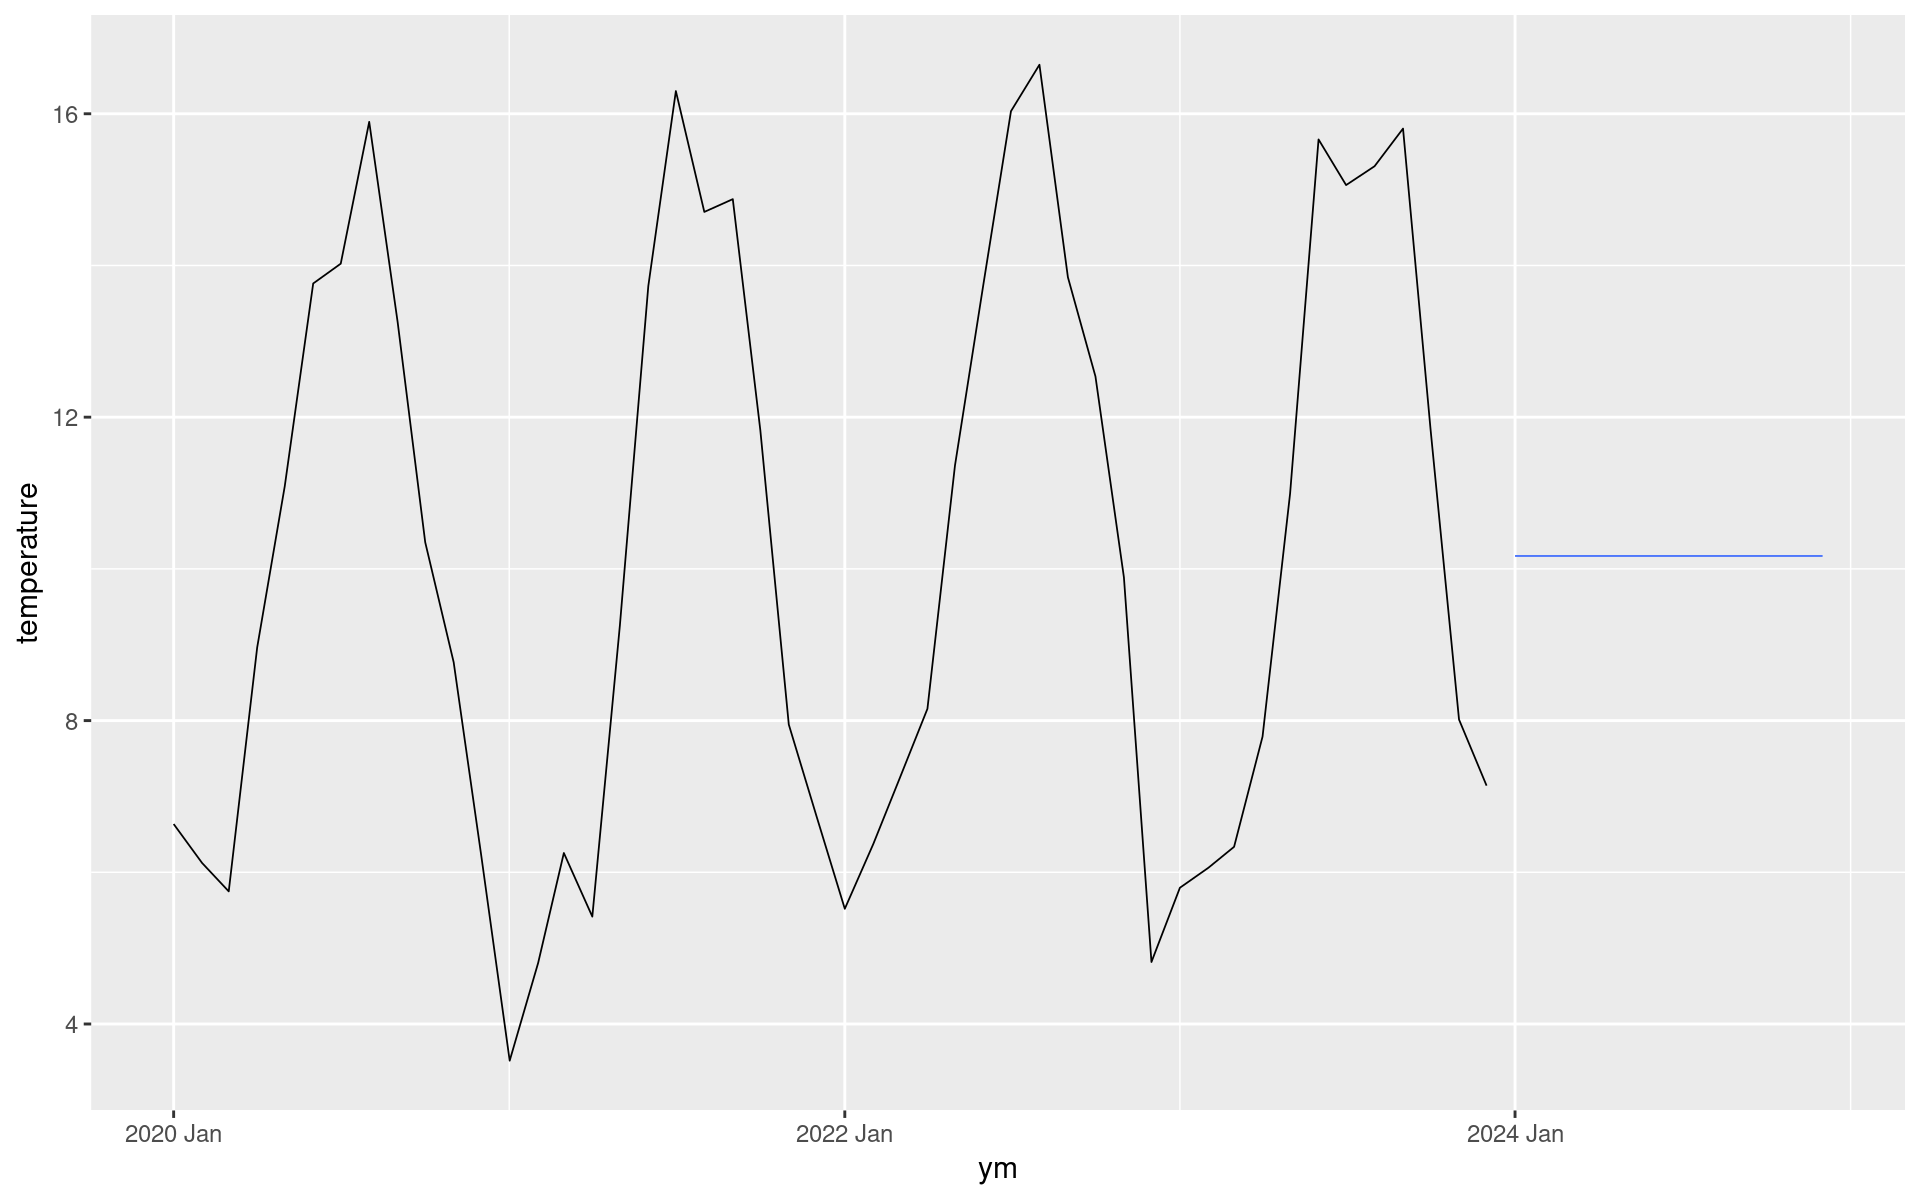

In [46]:
addata_fc |> filter(.model == "Mean") |>  autoplot(addata_monthly, level = NULL)

This is simple as it comes. Essentially we predict that the mean of all the data is the value we care about, and predict forwards linearly.

### Naive

> The most recent historical value will be all future values

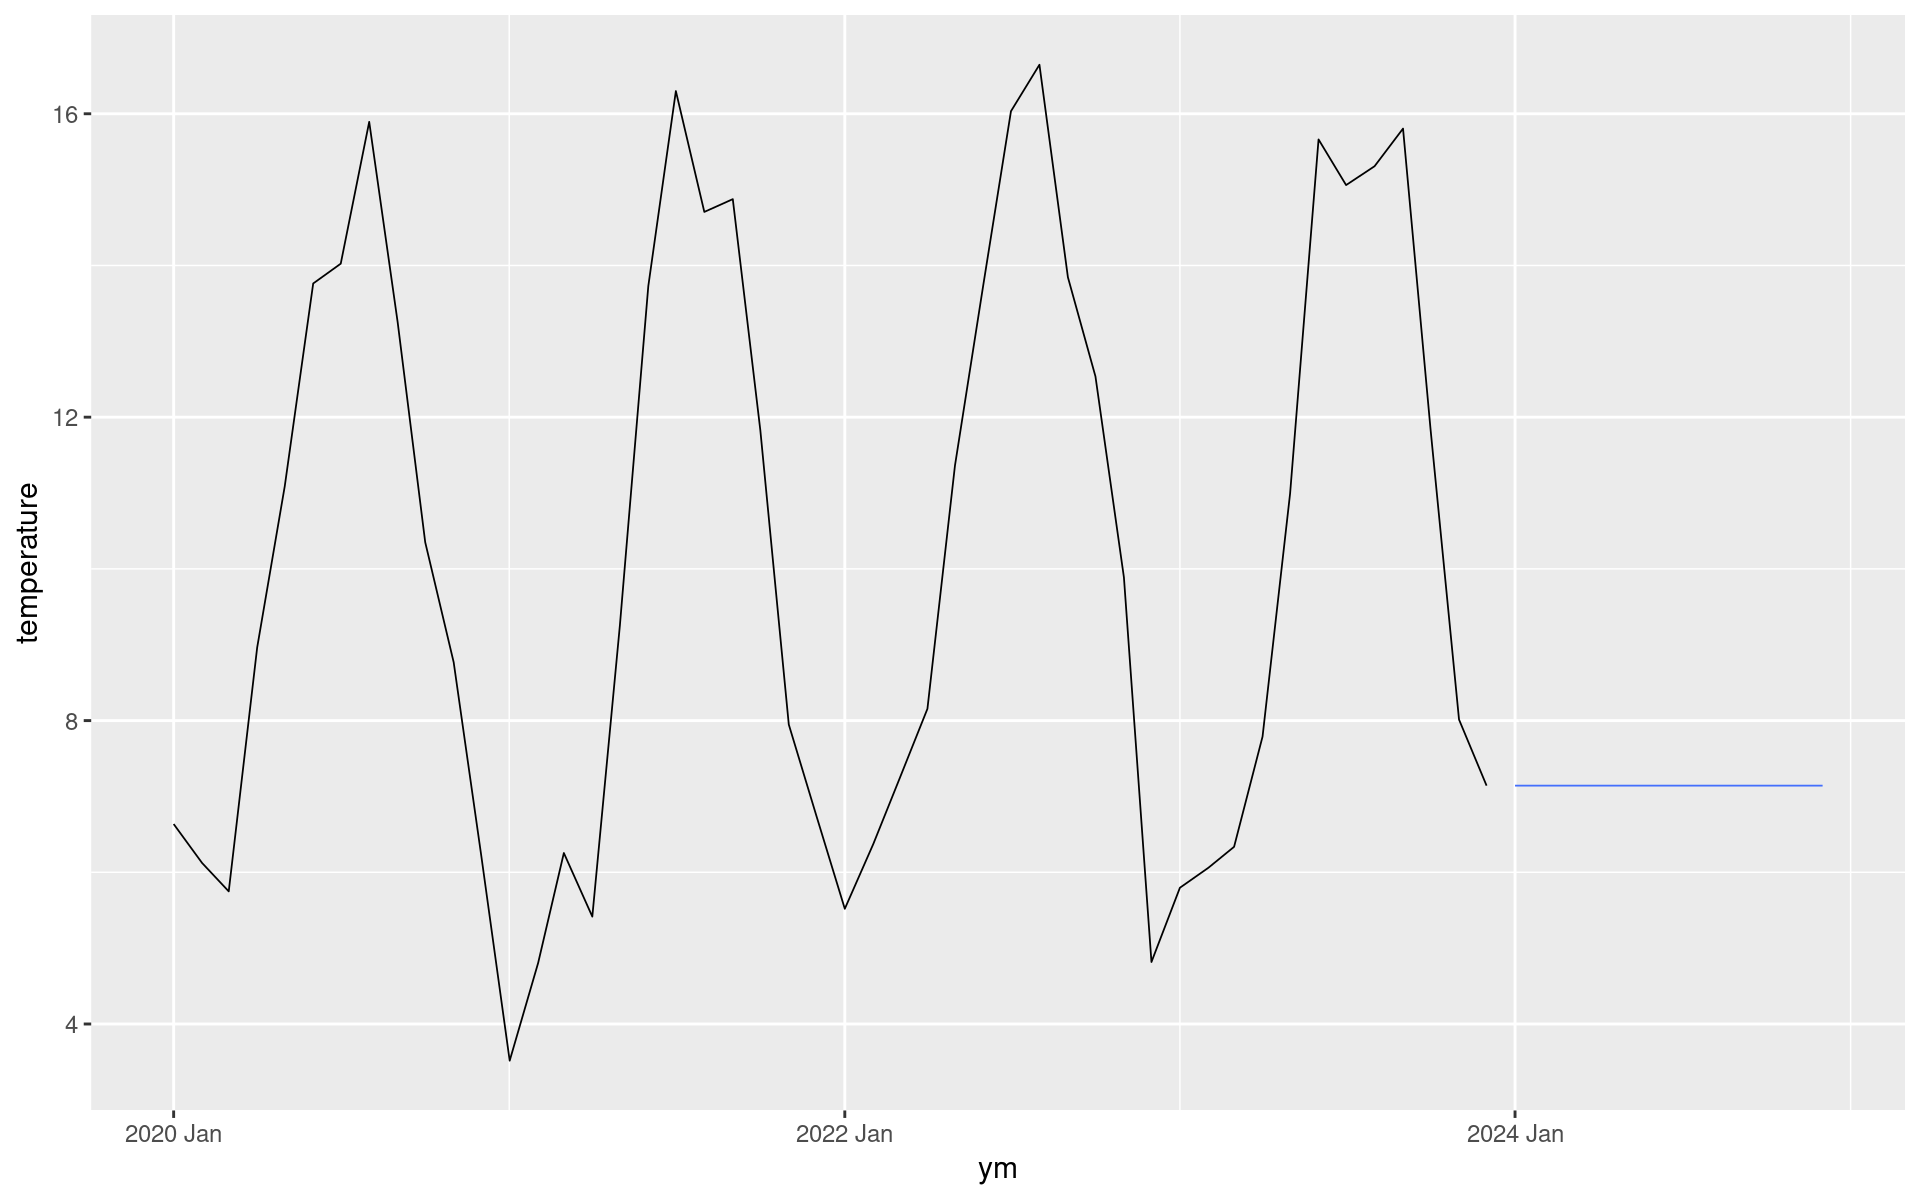

In [47]:
addata_fc |> filter(.model == "Naive") |>  autoplot(addata_monthly, level = NULL)

This is another very simple model, it's good when a system has settled to a steady state after some sort of ramping up period.

It is also good if the underlying process is what is known as a [martingale ](https://en.wikipedia.org/wiki/Martingale_(probability_theory)).

### Seasonal naive

> The most recent season will be all future seasons

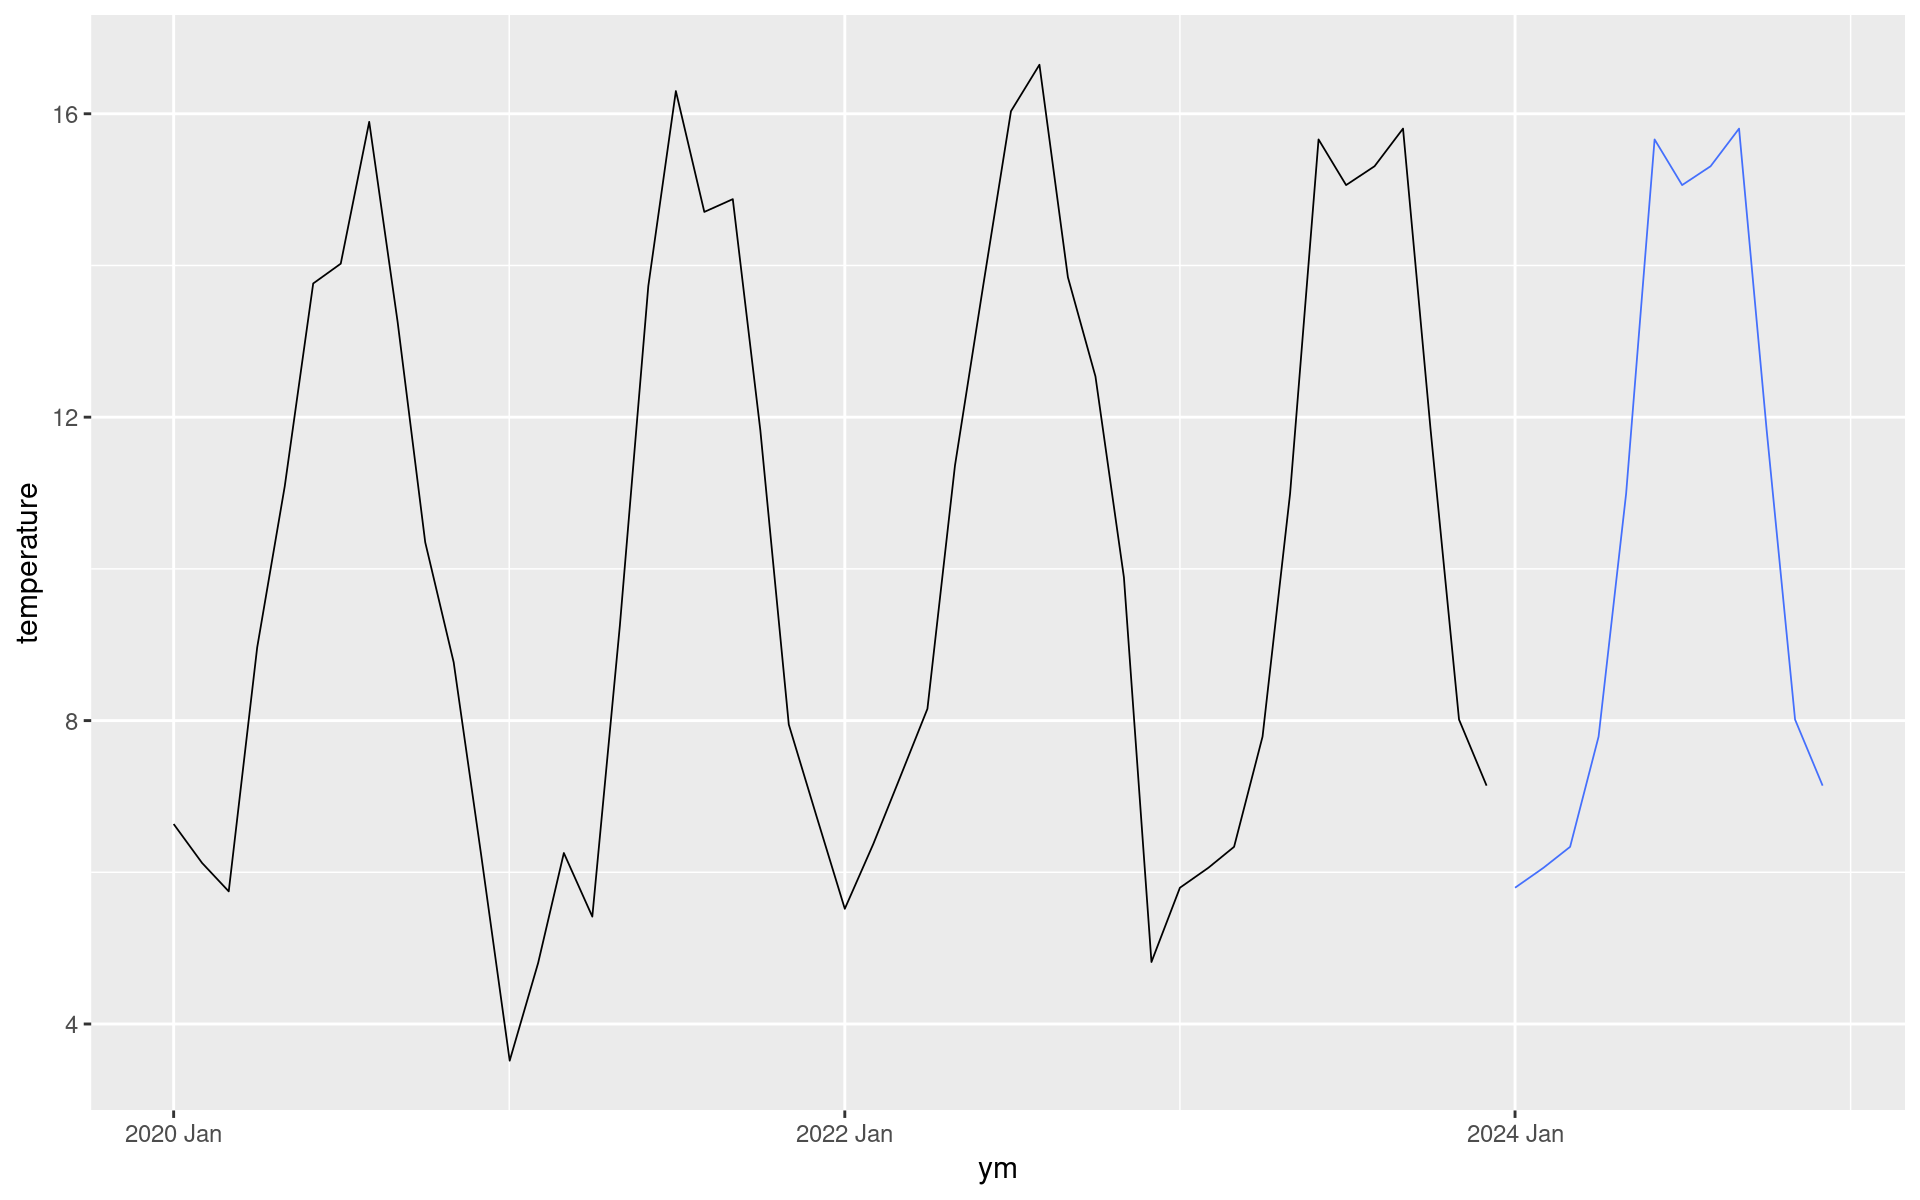

In [48]:
addata_fc |> filter(.model == "SeasonalNaive") |>  autoplot(addata_monthly, level = NULL)

Seasonal naive models are generally pretty competent where a system has a strong and repeated seasonal component dominating the variation. Such as in this example of temperature across a year in the UK. 

### Linear trend

> The linear trend of all historical values will continue onwards

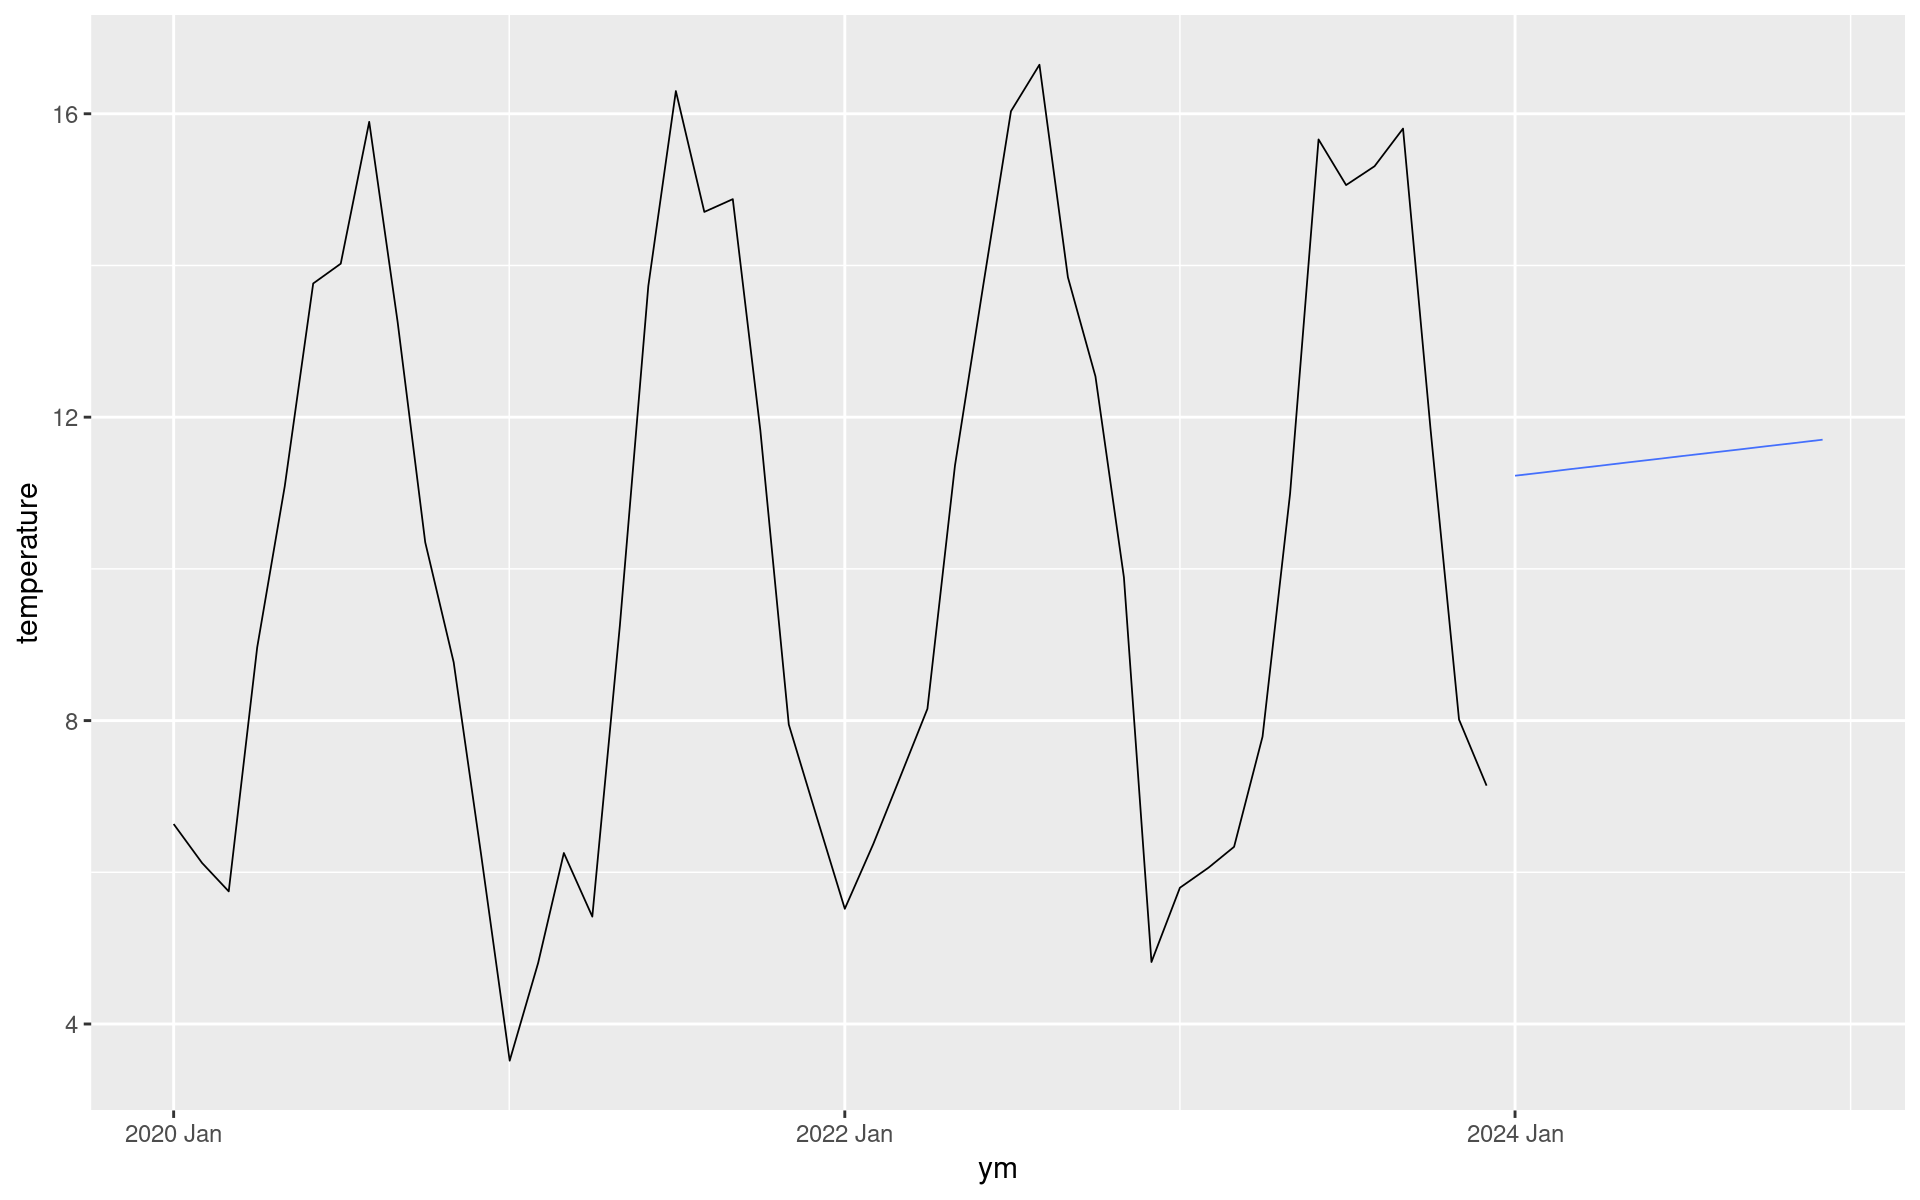

In [50]:
addata_fc |> filter(.model == "LinearTrend") |>  autoplot(addata_monthly, level = NULL)

The linear trend assumes that the data linearly trends in a particular direction, and extrapolates that general trend forwards. It is good when...well...the data has a significant linear trend.

### Drift

> The trend between the first and last historical values will continue onwards

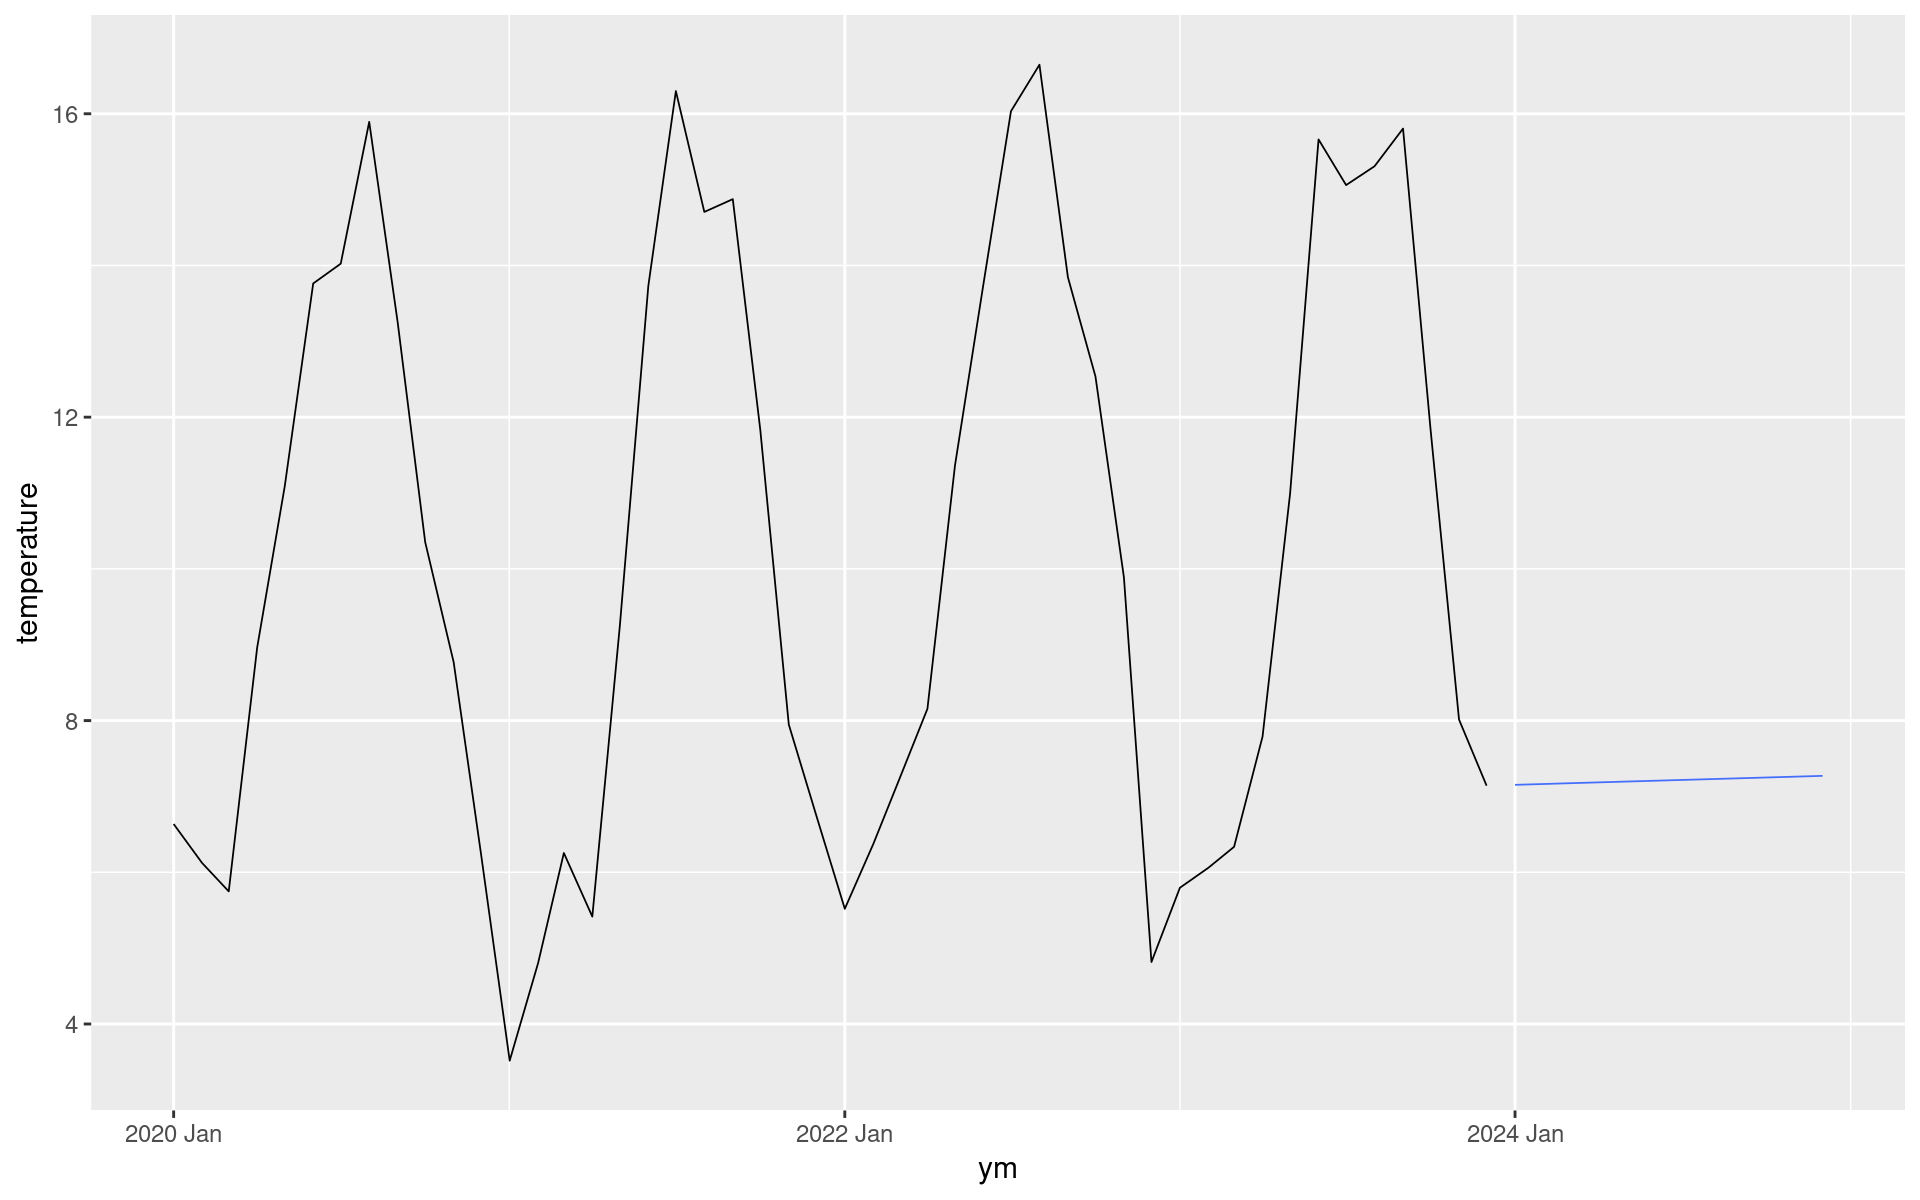

In [51]:
addata_fc |> filter(.model == "Drift") |>  autoplot(addata_monthly, level = NULL)

The drift method is a variant of the linear trend, however instead of fitting a linear model, it instead approximates the rate of change across the data using the difference between the first and last data points.

This can generally deal better with time series containing more extreme random fluctuations, but could be nonsensical if the data does not contain a full set of complete seasonal periods.

## Simple forecasting using `fable`

The `fable` package has already been used quite a lot throughout this lesson so far. Its main purpose is to make the process of constructing and fitting models to time series data easy and reliable.

The following code generates all of the models listed above for the UK temperature data:

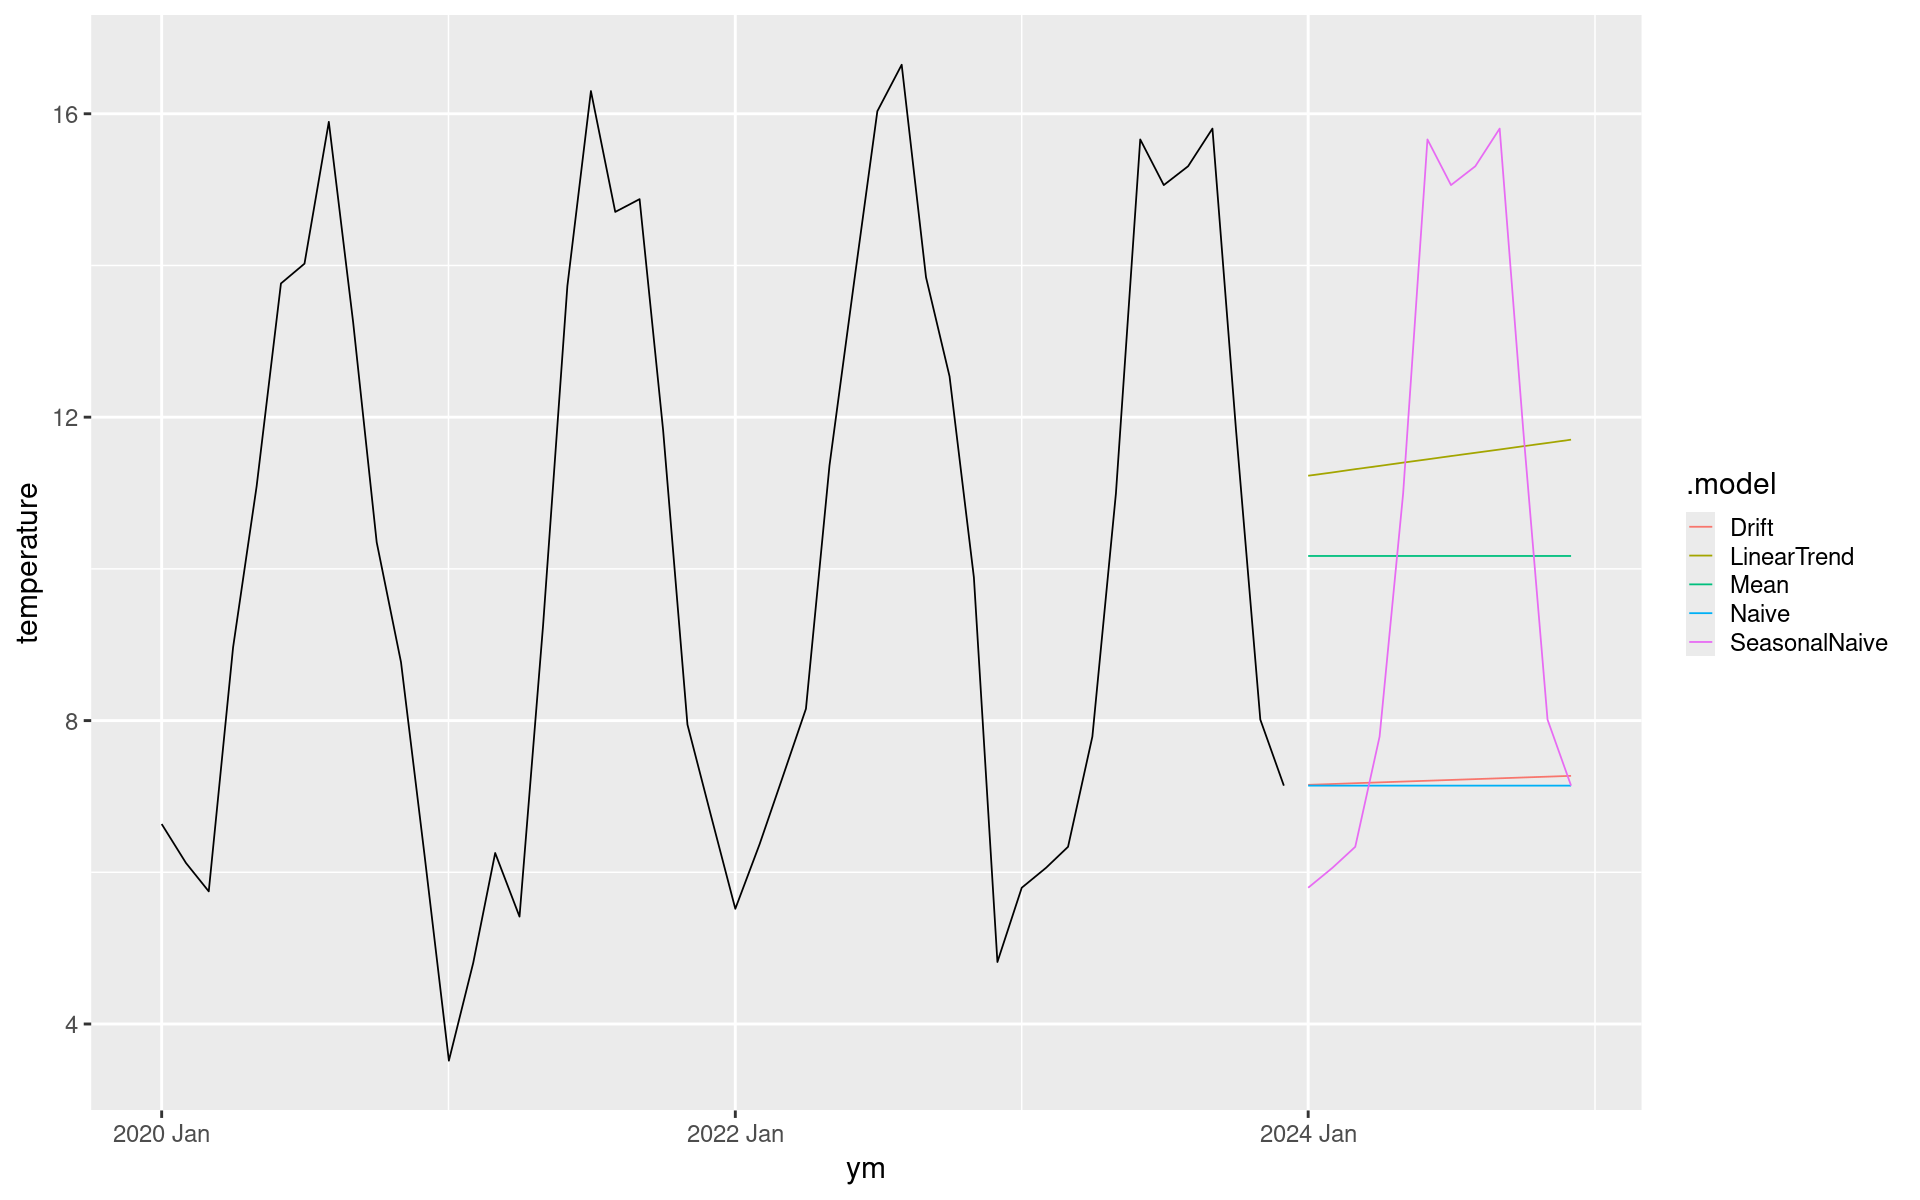

In [52]:
addata_fit <- addata_monthly |> 
  model(  # Specify the forecasting models to fit
      Mean = MEAN(temperature),
      Naive = NAIVE(temperature),
      SeasonalNaive = SNAIVE(temperature),
      LinearTrend = TSLM(temperature ~ trend()),
      Drift = NAIVE(temperature ~ drift())
      )

addata_fc <- addata_fit |> 
  forecast(h=12) # Generate a forecast of 12 time steps

addata_fc |> autoplot(
  addata_monthly,  # Plot the original data alongside the model data, !! IMPORTANT !!
  level = NULL     # Suppresses confidence intervals for now with the level argument
  )

### Simple forecasting exercise

Try fitting a few of these models to the `vecdyn` data we pulled above (currently in the variable `dfibble`).

Are any models particularly bad or good? Why do you think that might be?

_Rather than copying the above code from the workbook, try to type it out yourself!_

## Forecasting from decomposition

Whilst the previous forecasting methods were good for time series with simple patterns underlying them, most data you will encounter from ecological systems are more complex.

They may well have odd trends, multiple seasonal components, or complex random elements at play.

Luckily we have already got ways to separate out the seasonality and other factors. We can then predict these individually and put them back together at the end to have a seasonally-aware forecast.

More formally, when forecasting using decomposition, we use a modified version of the typical time series equation. This splits the signal into a **seasonal** ($S_t$) and a **seasonally-adjusted** ($A_t$) component:

$$x_t = S_t + A_t$$

Where $A_t = T_t + R_t$.

`fable` makes such an approach relatively trivial. So let's do it on the `vecdyn` data we used in the simple forecasting exercise above:


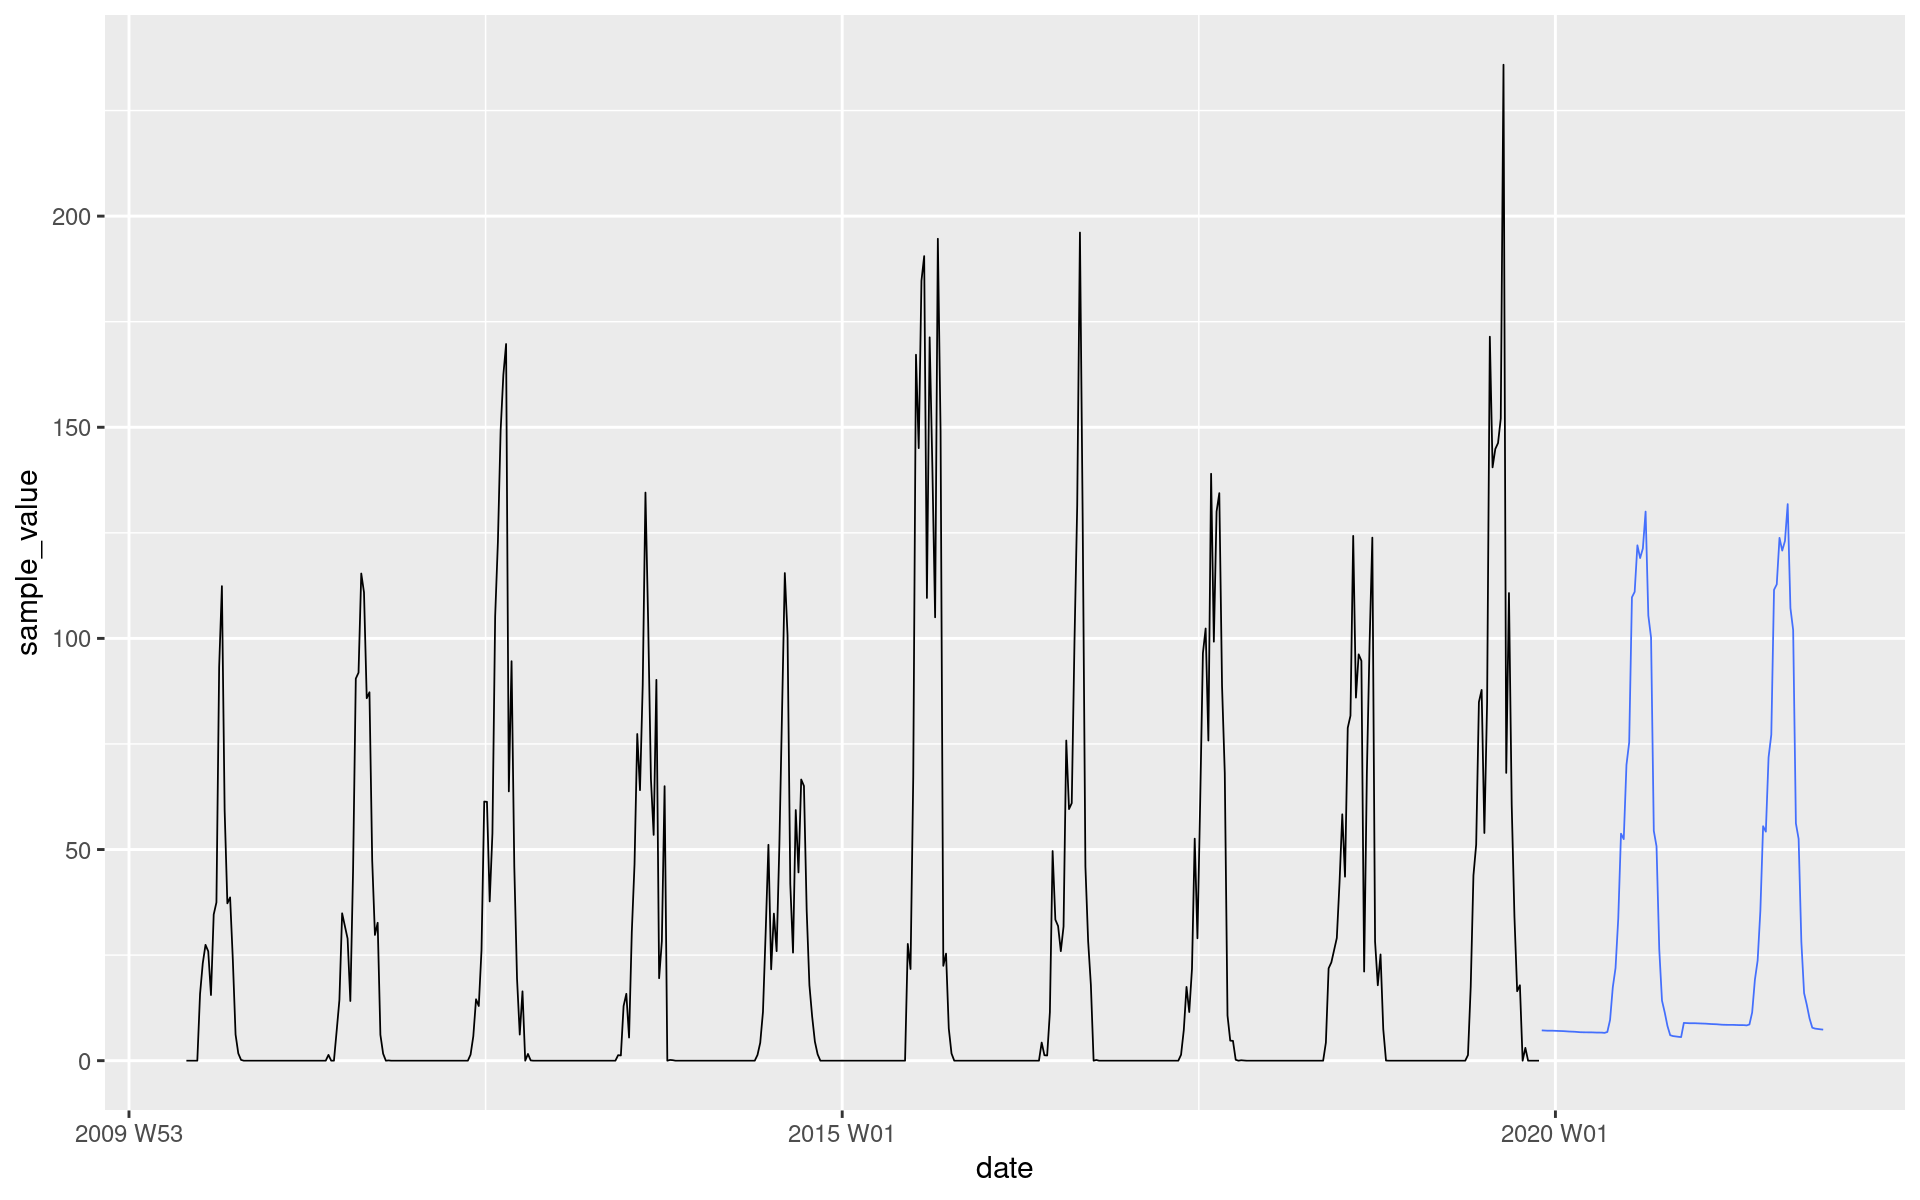

In [53]:
dfibble |> 
  model(StlModel = decomposition_model(  # Specify that we are doing a decomposition
    STL(sample_value),  # Method for decomposition
    TSLM(season_adjust ~ trend()),  # Model for seasonally adjusted component
    SNAIVE(season_year)  # Model the seasonal component
  )) |> 
  forecast(h = 104) |> 
  autoplot(dfibble, level = NULL)

### Transformations

We have not covered transformations in great detail during this tutorial, however I'm going to mention one here specifically to solve a problem.

If we look at the forecast from our model here, everything looks good except the baseline out-of-season values seem to be going up (and are no longer 0)!

This is a problem. From a process-focused perspective this has arisen because the vector dynamics shown here are actually borne from two distinct processes:

1. The survival of adult mosquitoes
2. The breeding cycle of adult mosquitoes

Within a year, process 2 is fundamentally dependent on process 1 (you can't have eggs being laid if there are no mosquitoes to lay them)!

As such, the time series has vastly different local variance depending on where in the season you are. This means that no matter which way you look at it overall, either the peaks or the flat troughs are kind of "outliers", which is skewing the overall trend slightly upwards when it shouldn't.

One way we can deal with such a problem in this _particular_ circumstance is to perform a transformation of the input data, and a back transform of the resultant forecast.

A log transform would squash down the difference magnitude between the breeding and fallow seasons, however you cannot take the log of 0!

Luckily there is another similar transformation called `log1p()`, which performs a log transform after adding a small amount to every data point. We must then reverse this after forecasting, **however** this is something `fable` can do for us automagically!

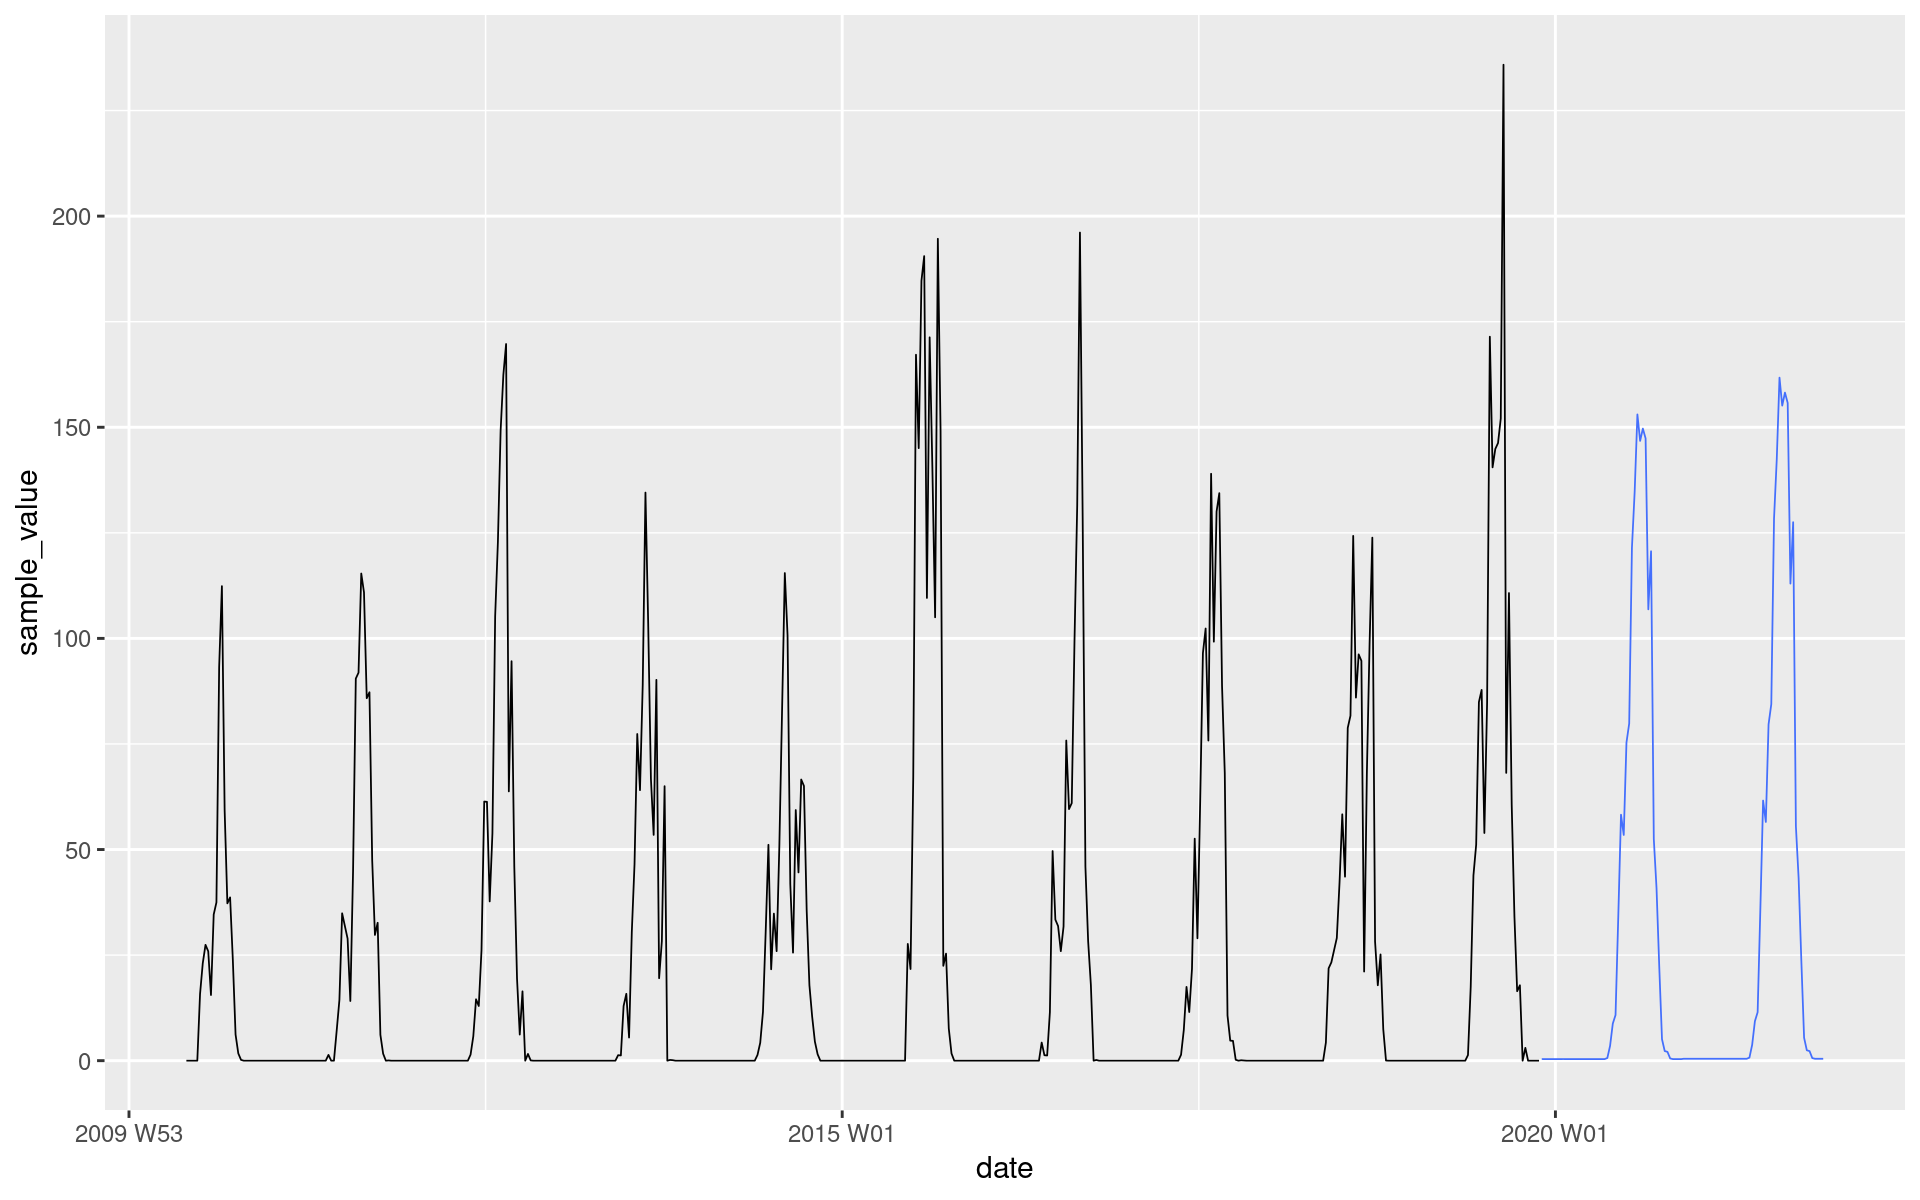

In [54]:
dfibble |> 
  model(StlModel = decomposition_model(
    STL(log1p(sample_value)),  # Now we are working on the transformed variable
    TSLM(season_adjust ~ trend()),  # Everything else is the same
    SNAIVE(season_year)
  )) |> 
  forecast(h = 104) |> 
  autoplot(dfibble, level = NULL)

And look at that! The prediction looks pretty damn good! (If I do say so myself).

## Exponential smoothing

One family of easily fit (but very capable) forecasting methods is called _exponential smoothing_.

In `fable` these are all fit using the `ETS()` function (Error, Trend, Seasonal) with slightly different parameter setups.

All calls follow the same basic form, for example:

```
ETS(sample_value ~ error("A") + trend("N") + season("N"))
```

### `ETS()` parameters

Any call to `ETS()` in fable is constructed in a similar manner, with three individual components.

#### `error()`

The error function determines the structure of the "noise" term of the model.

This could be either `"A"` for additive noise, or `"M"` for multiplicative noise.

#### `trend()`

Trend is used to specify the form of the trend within the data, and to parameterise any smoothing or dampening performed on the trend.

This could be `"A"/"M"` as in `error()`, however it can also be dampened versions of these (`"Ad"/"Md"` respectively). Finally it can also be `"N"` to signify no trend term.

#### `season()`

Season (predictably) specifies the seasonal component of the data. This can again be `"A"/"M"/"N"` for Additive, Multiplicative, or None.

#### Unstable formulations

Whilst generally each term can be freely set to whatever combination of settings you choose, there are some combinations that are pretty unstable and will not fit reliably.

These are `ETS(A, A, M)`, `ETS(A, N, M)` and `ETS(A, Ad, M)`.

Also when time series contain 0 or negative values, an error term of `"M"` will not work.

For full details of the ETS formulation and associated terms, use the command `?ETS` in your R console to bring up the documentation.

### Simple exponential smoothing

Instead of weighting all data equally (e.g. the mean method) or only considering the final point (the naive method), simple exponential smoothing (SES) weights more recent values highly.

The formula for this weighting is a bit complicated, however there are two parameters of interest.

$\alpha$ is the weighting of the most recent observation. This also determines the _rate of decay_ of the weighting.

$j_0$ determines the scale for the final forecast output. It is in the same units as the response variable.

The general weighting for $\alpha = 0.2$ looks something like this:

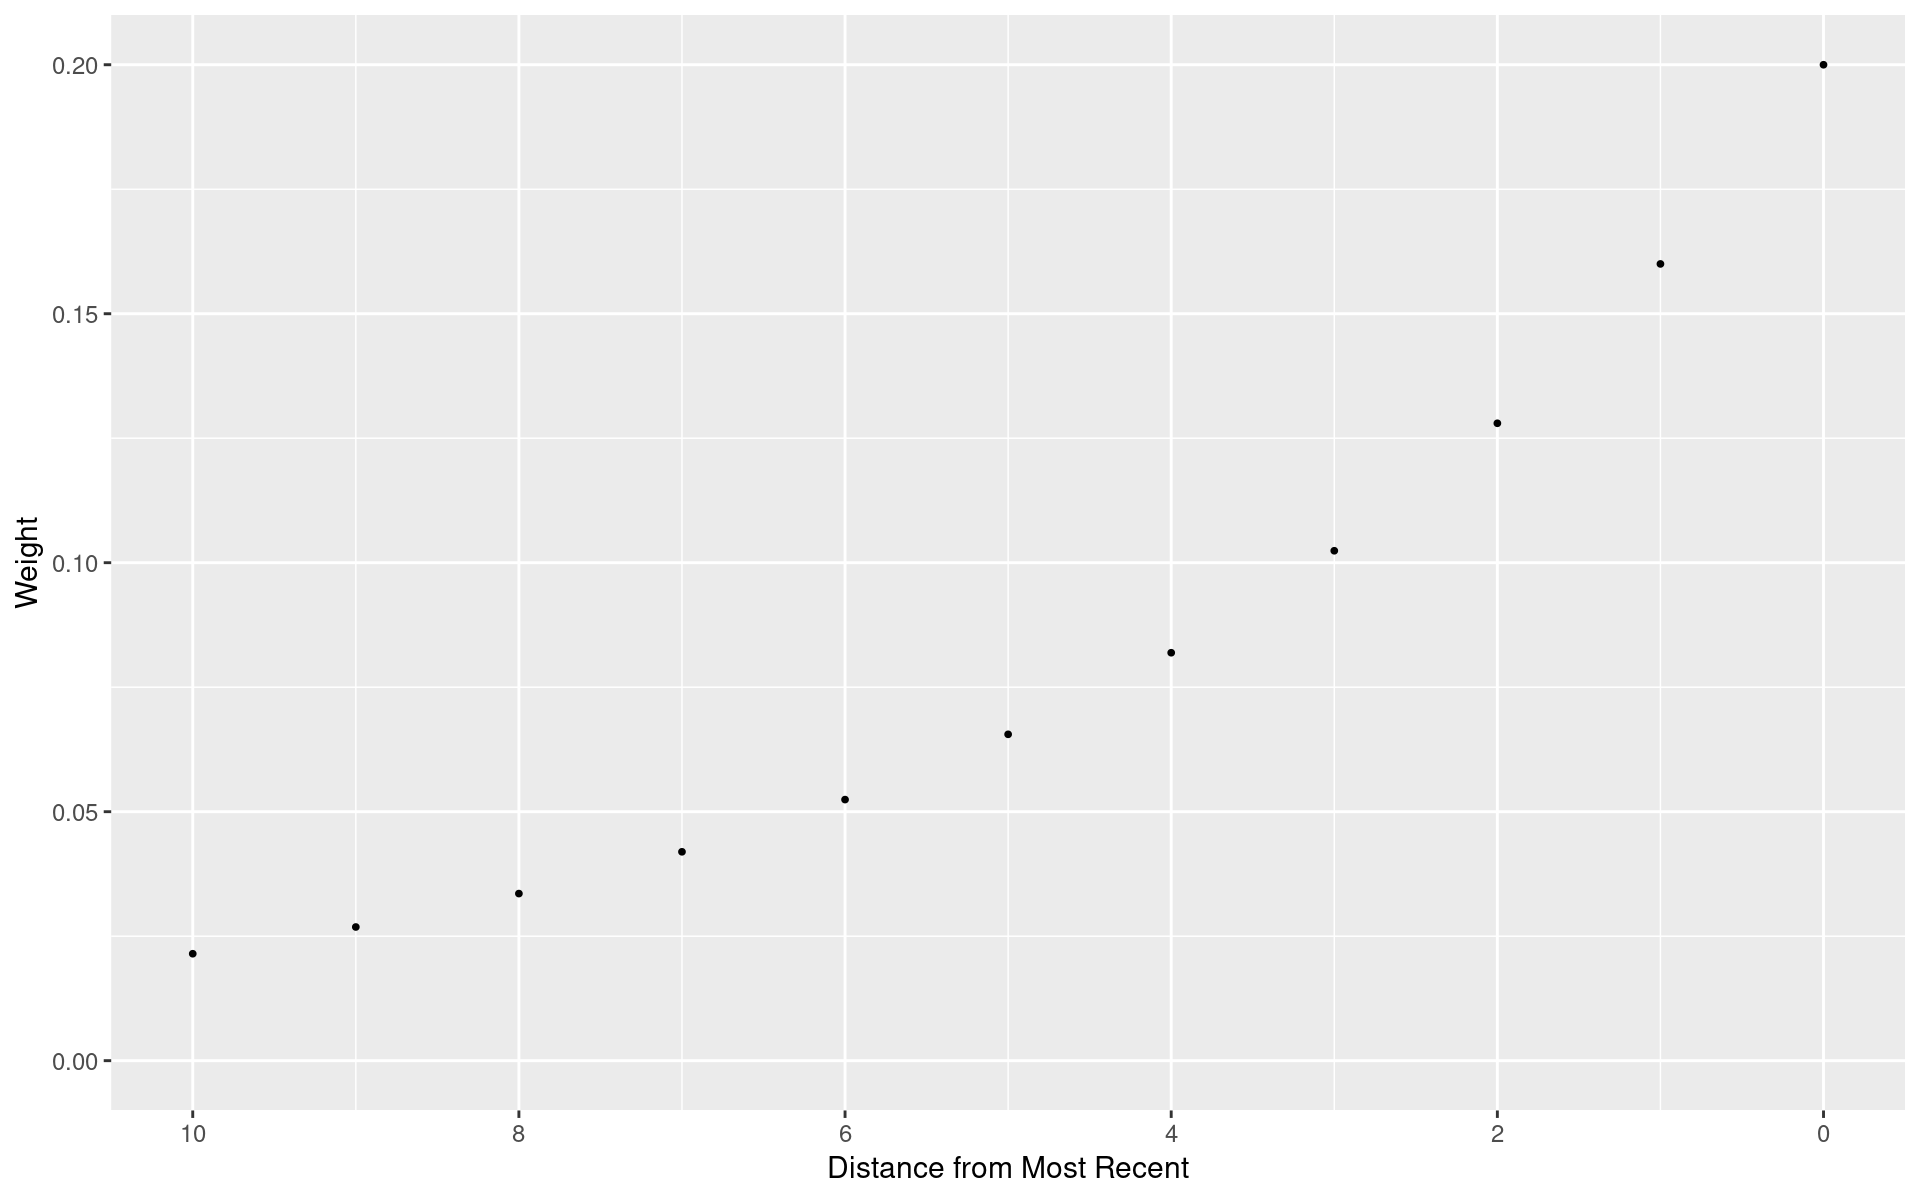

In [55]:
alpha <- 0.2
weights <- tibble(lag_amount = 0:10,
                  weight = alpha * (1 - alpha) ** lag_amount)
weights |>
    ggplot(aes(x = lag_amount, y = weight)) +
    geom_point() +
  ylim(c(0, 0.2)) +
  scale_x_reverse(limits = c(10,0), breaks = seq(10,0,-2)) + 
  labs(x = "Distance from Most Recent", y = "Weight")

**Note:** There is a reversed x-axis here. Time series typically proceed from left to right, and as such it is most intuitive to look at it this way (in my humble opinion).

A SES model can be fit using the following ETS formulation:
```
ETS(X ~ error("A") + trend("N") + season("N"))
```

### Holt's linear trend & Damped trend approaches

Holt's linear trend is similar to a mix of the basic linear trend / drift approaches explored earlier, and a more naive approach by employing exponential smoothing.

In essence it fits an SES version of the trend and then calculates the difference between this and the best estimate for a given position on the time series. It then performs a set of weighted averages to calculate a local linear model that accounts for the general trend within the local region. Finally this linear model is simply extended to the number of extra time steps one wishes to forecast.

The damped trend variant is almost exactly the same, but with an extra condition. Holt's linear trend tends to projects very optimistically that a given local trend with continue indefinitely. Over large scales this can lead to a trend that just shoots off in an unrealistic manner.

To compensate for this, the damped trend assumes that any significant change will probably level out over time, and so forces the trend to instead asymptote more an more quickly using a damping factor called $\phi$. As $\phi$ approaches 0, the damping effect increases, with a value of 0 being equivalent to a truly naive model from earlier and a value of 1 simply being the Holt's linear trend.

These are formulated as follows in ETS:

Holt's linear trend:
```
ETS(X ~ error("A") + trend("A") + season("N"))
```

Damped method:
```
ETS(X ~ error("A") + trend("Ad", phi = 0.9) + season("N"))
```

### Holt-Winters' method

The final form of Exponential smoothing we will consider here is the Holt-Winters' method.

This extends the previous methods to incorporate seasonality through concepts from time-series decomposition, and can be performed both additively and multiplicatively as you see in typical decomposition.

In essence this performs the same sort of weighted average between a smoothed trend and a local best-fit, however it also includes a seasonal component to override some of the local linearity.  
Damping Holt-Winters' models _only applies damping to the trend component_ whilst keeping the seasonality component as is. This means that with low $\phi$ values, instead of tending towards an asymptote, the seasonal component dominates the predicted response more and more.

Additive Holt-Winters:
```
ETS(X ~ error("A") + trend("A") + season("A"))
```

Multiplicative Holt-Winters:
```
ETS(X ~ error("M") + trend("A") + season("M"))
```

Damped additive Holt-Winters:
```
ETS(X ~ error("A") + trend("Ad") + season("A"))
```

Damped multiplicative Holt-Winters:
```
ETS(X ~ error("M") + trend("Ad") + season("M"))
```

### Examples

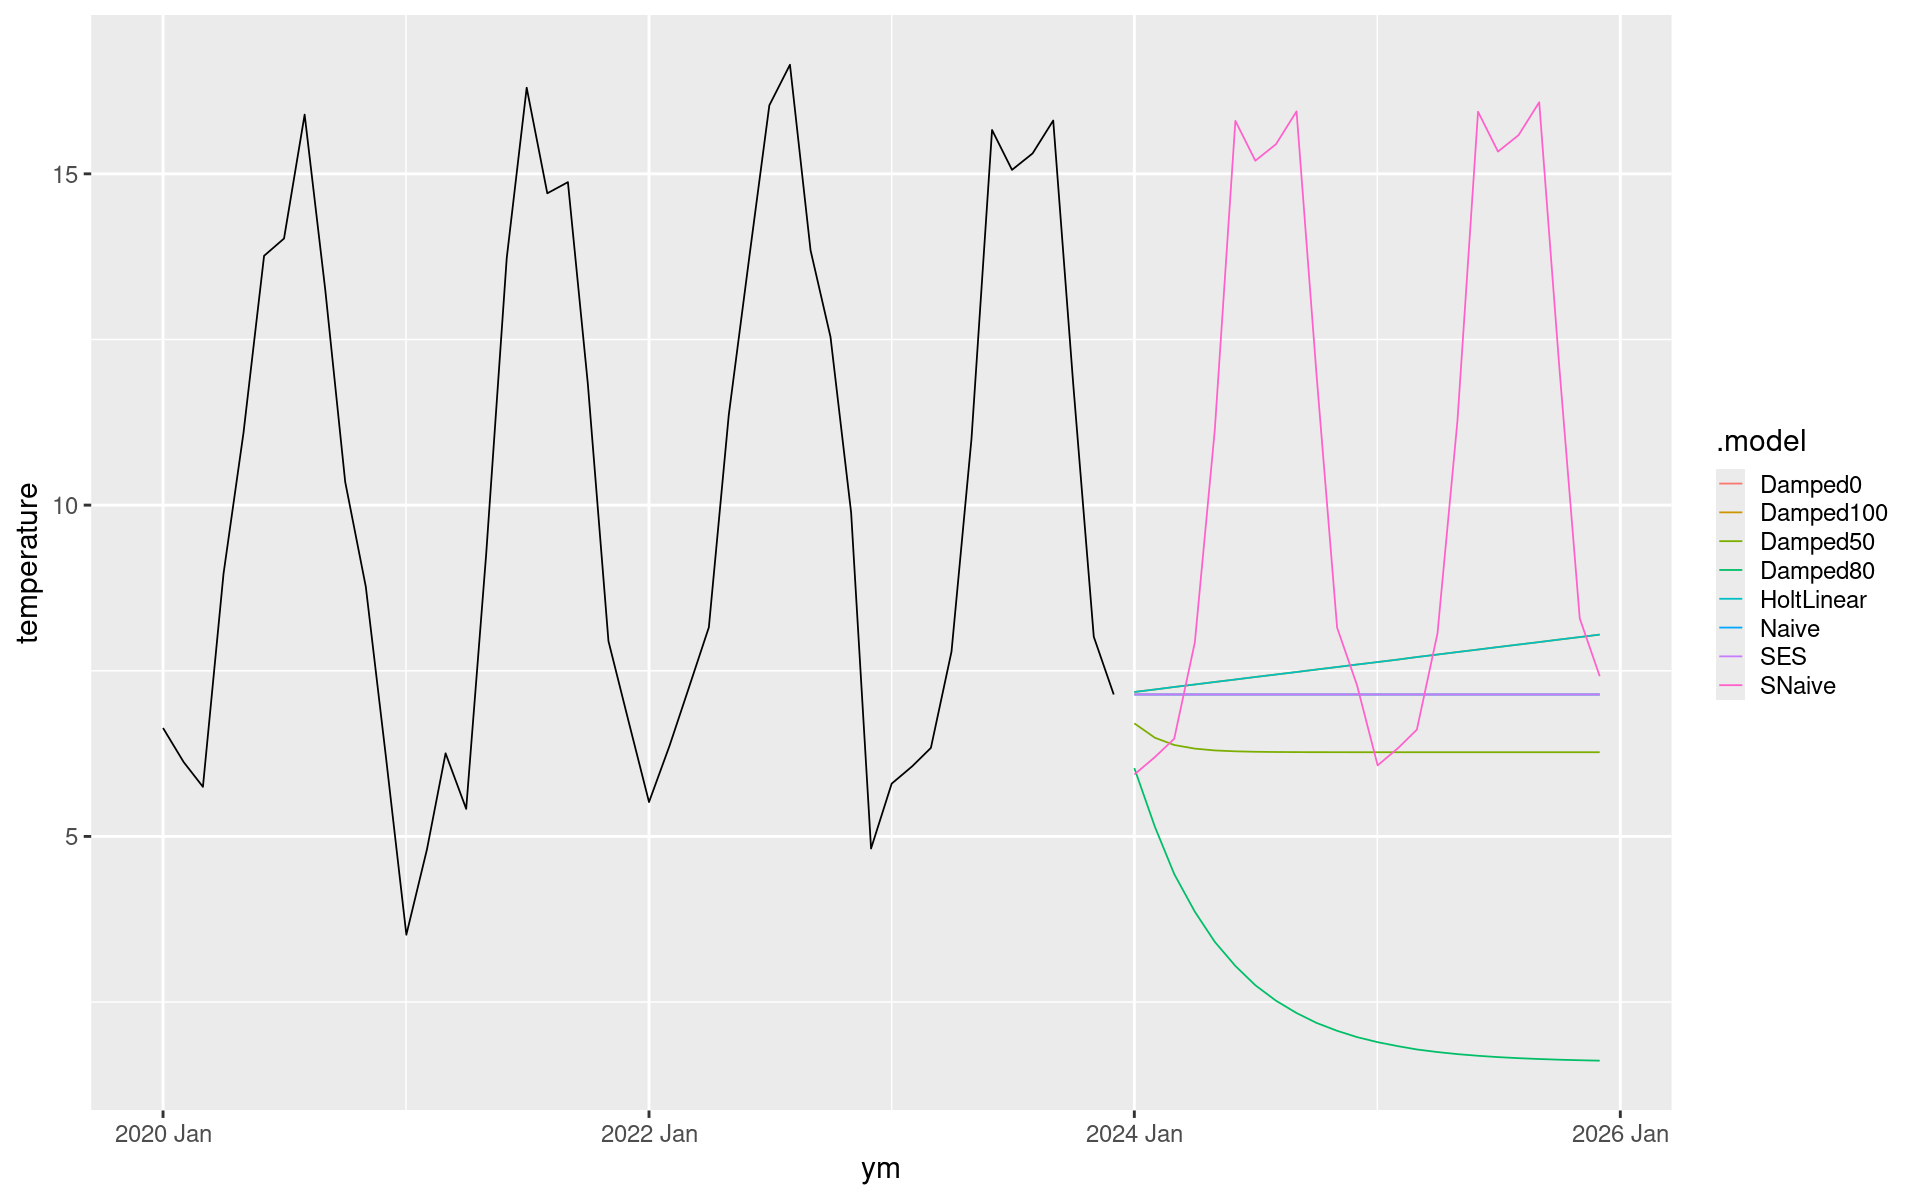

In [56]:
addata_monthly |> 
  model(SNaive = SNAIVE(temperature ~ drift()),
        Naive = NAIVE(temperature),
        SES = ETS(temperature ~ error("A") + trend("N") + season("N")),
        HoltLinear = ETS(temperature ~ error("A") + trend("A") + season("N")),
        Damped50 = ETS(temperature ~ error("A") + trend("Ad", phi = 0.5) + season("N")),
        Damped80 = ETS(temperature ~ error("A") + trend("Ad", phi = 0.8) + season("N")),
        Damped0 = ETS(temperature ~ error("A") + trend("Ad", phi = 0) + season("N")), # Same as Naive
        Damped100 = ETS(temperature ~ error("A") + trend("Ad", phi = 1) + season("N")), # Same as HoltLinear
        ) |> forecast(h = 24) |> 
  autoplot(addata_monthly, level = NULL)

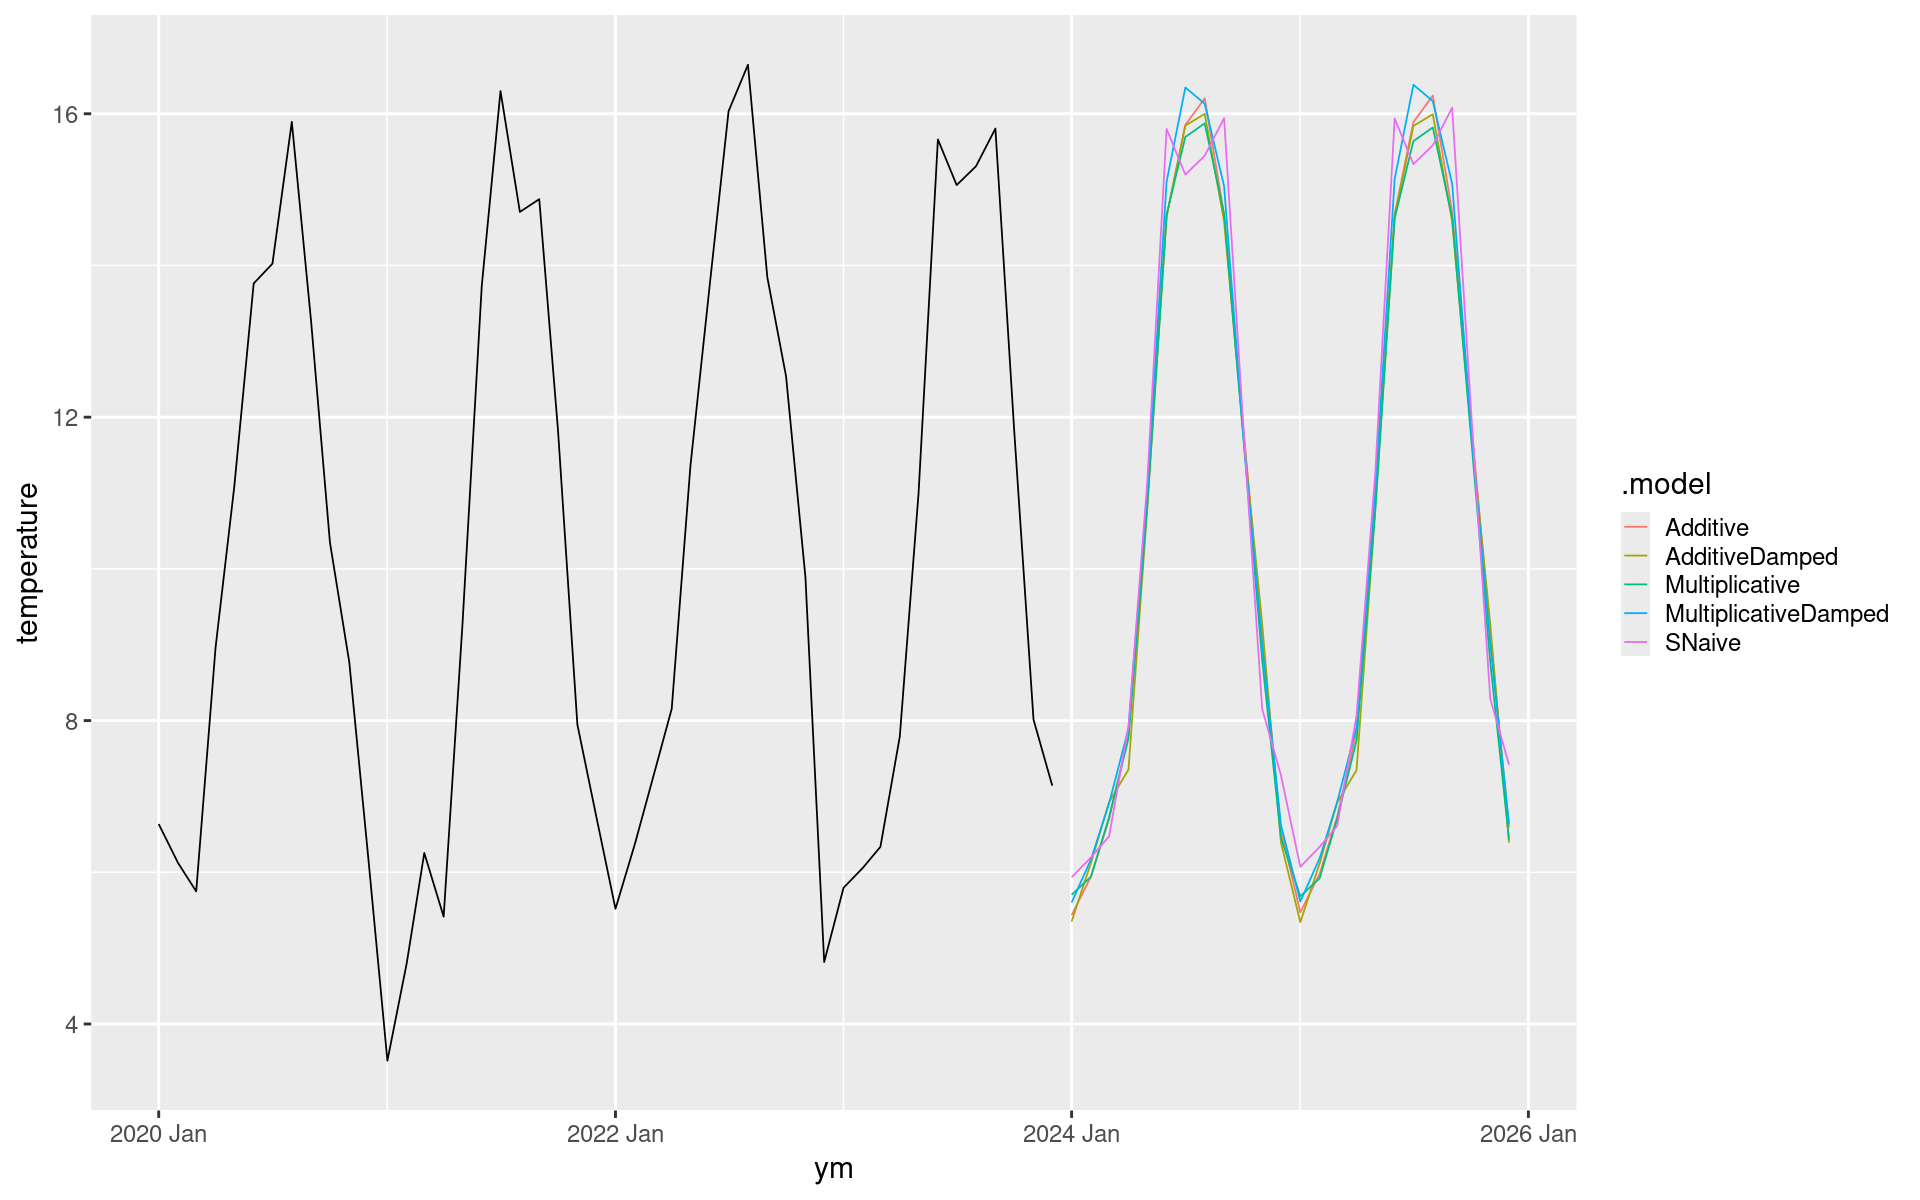

In [57]:
addata_monthly |> 
  model(SNaive = SNAIVE(temperature ~ drift()), # Contains exactly the noise profile from the last period
        Additive = ETS(temperature ~ error("A") + trend("A") + season("A")),
        Multiplicative = ETS(temperature ~ error("M") + trend("A") + season("M")),
        AdditiveDamped = ETS(temperature ~ error("A") + trend("Ad") + season("A")),
        MultiplicativeDamped = ETS(temperature ~ error("M") + trend("Ad") + season("M"))
        ) |> forecast(h = 24) |> 
  autoplot(addata_monthly, level = NULL)

### A note on periodicity

ETS models as implemented in fable do not cope well with periods of more than 24 time steps. As such if you want to use them on data with periods longer than this you will need to reaggregate your data to a coarser time scale or move to the `forecast::stlf()` functions, however this is not covered in this tutorial.

### Another forecasting exercise

Try forecasting using some of these Exponential Smoothing models to the `aus_arrivals` dataset.

I've started you off here with a reminder that we need to filter a particular country to get just one time series:

## Summary Statistics

Just like in non-time-series-world, it can be really nice to pick out some useful summary statistics to understand a time series from a quantitative perspective.

Luckily, the `feasts` package provides lots of functions and methods to retrieve such statistics.

### Basics

`features()` from `fabletools` is a function to allow one to compute arbitrary summary statistics from time series data.

Let's start by simply computing a few key features of the temperature data from earlier. We're going to use the original (non-aggregated) data for this.

In [58]:
addata |> 
  features(temperature,
           features = list(mean = mean, variance = var, quantile = quantile))

mean     variance quantile_0% quantile_25% quantile_50% quantile_75%
1 10.19121 20.30817 -2.425439   6.671144     10.11261     13.73158    
  quantile_100%
1 24.84771

If we run this same command but on `aus_arrivals`, we get one line per sub-time-series.

In [59]:
aus_arrivals |> 
  features(Arrivals,
           features = list(mean = mean, variance = var, quantile = quantile))

Origin mean      variance   quantile_0% quantile_25% quantile_50%
1 Japan  122080.19 4123427340  9321       74134.5      135461      
2 NZ     170585.83 7170720232 37039       96520.5      154537      
3 UK     106857.46 4093754355 19886       53892.5       95564      
4 US      84848.74  884962742 23721       63950.0       85878      
  quantile_75% quantile_100%
1 176752.5     227641       
2 228605.0     330812       
3 128127.5     269292       
4 108977.0     136094

### Autocovariance and Autocorrelation

Autocovariance (ACVF) is the variance between the present value and a previous value at lag $k$ in the time series, calculated across the time series.

Meanwhile autocorrelation (ACF) is the autocovariance at lag $k$ as a proportion of the total variance of the dataset (ACVF where $k = 0$)

We actually already calculated autocorrelation earlier using the `ACF()` function:

In [60]:
dfibble |> ACF(sample_value, lag_max = 52)

lag acf      
1  1W  0.8646474
2  2W  0.7640465
3  3W  0.6737971
4  4W  0.5468455
5  5W  0.4419175
⋮  ⋮   ⋮        
48 48W 0.4433745
49 49W 0.5246661
50 50W 0.6038654
51 51W 0.6344849
52 52W 0.6519339

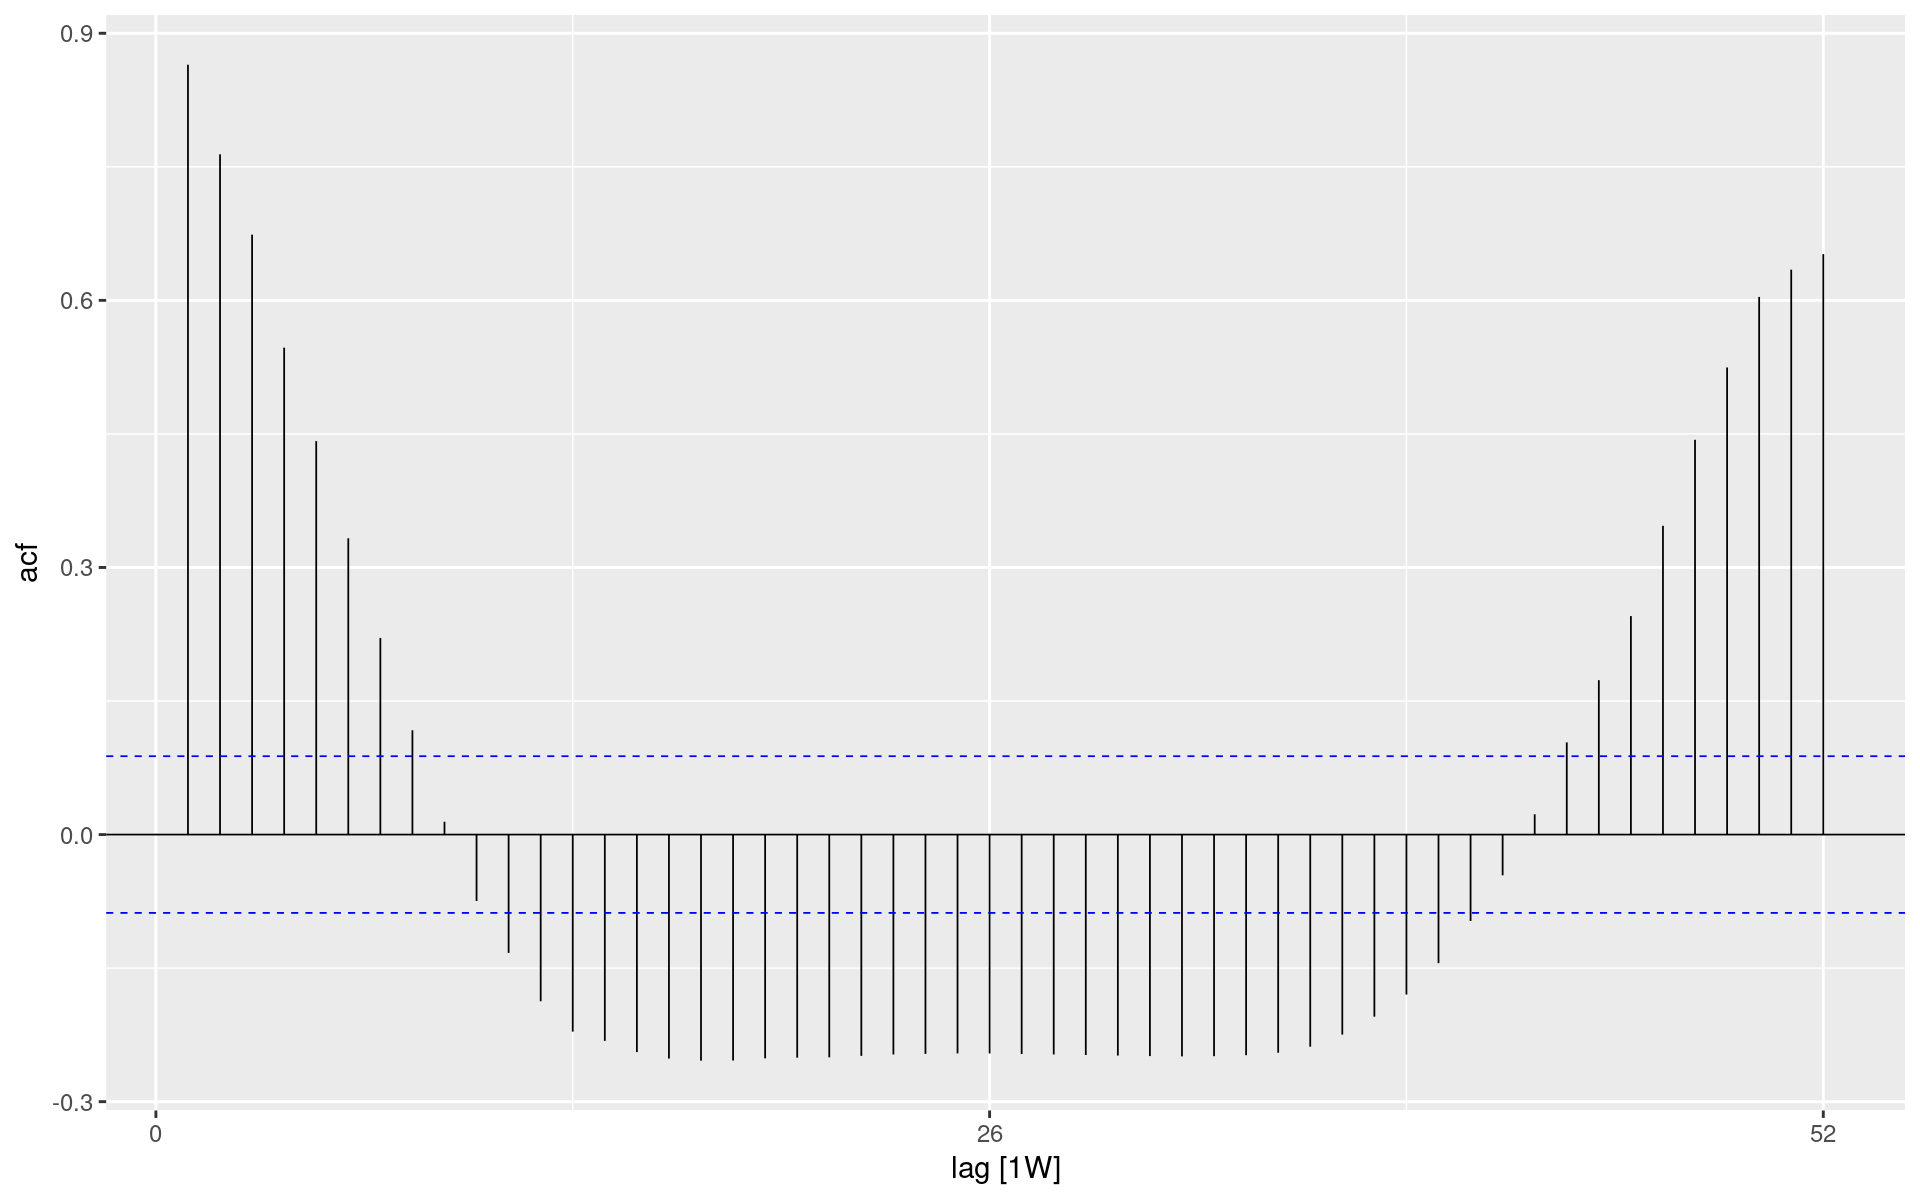

In [62]:
dfibble |> ACF(sample_value, lag_max = 52) |> autoplot()

ACVF can be calculated using the same function, just with an extra argument:

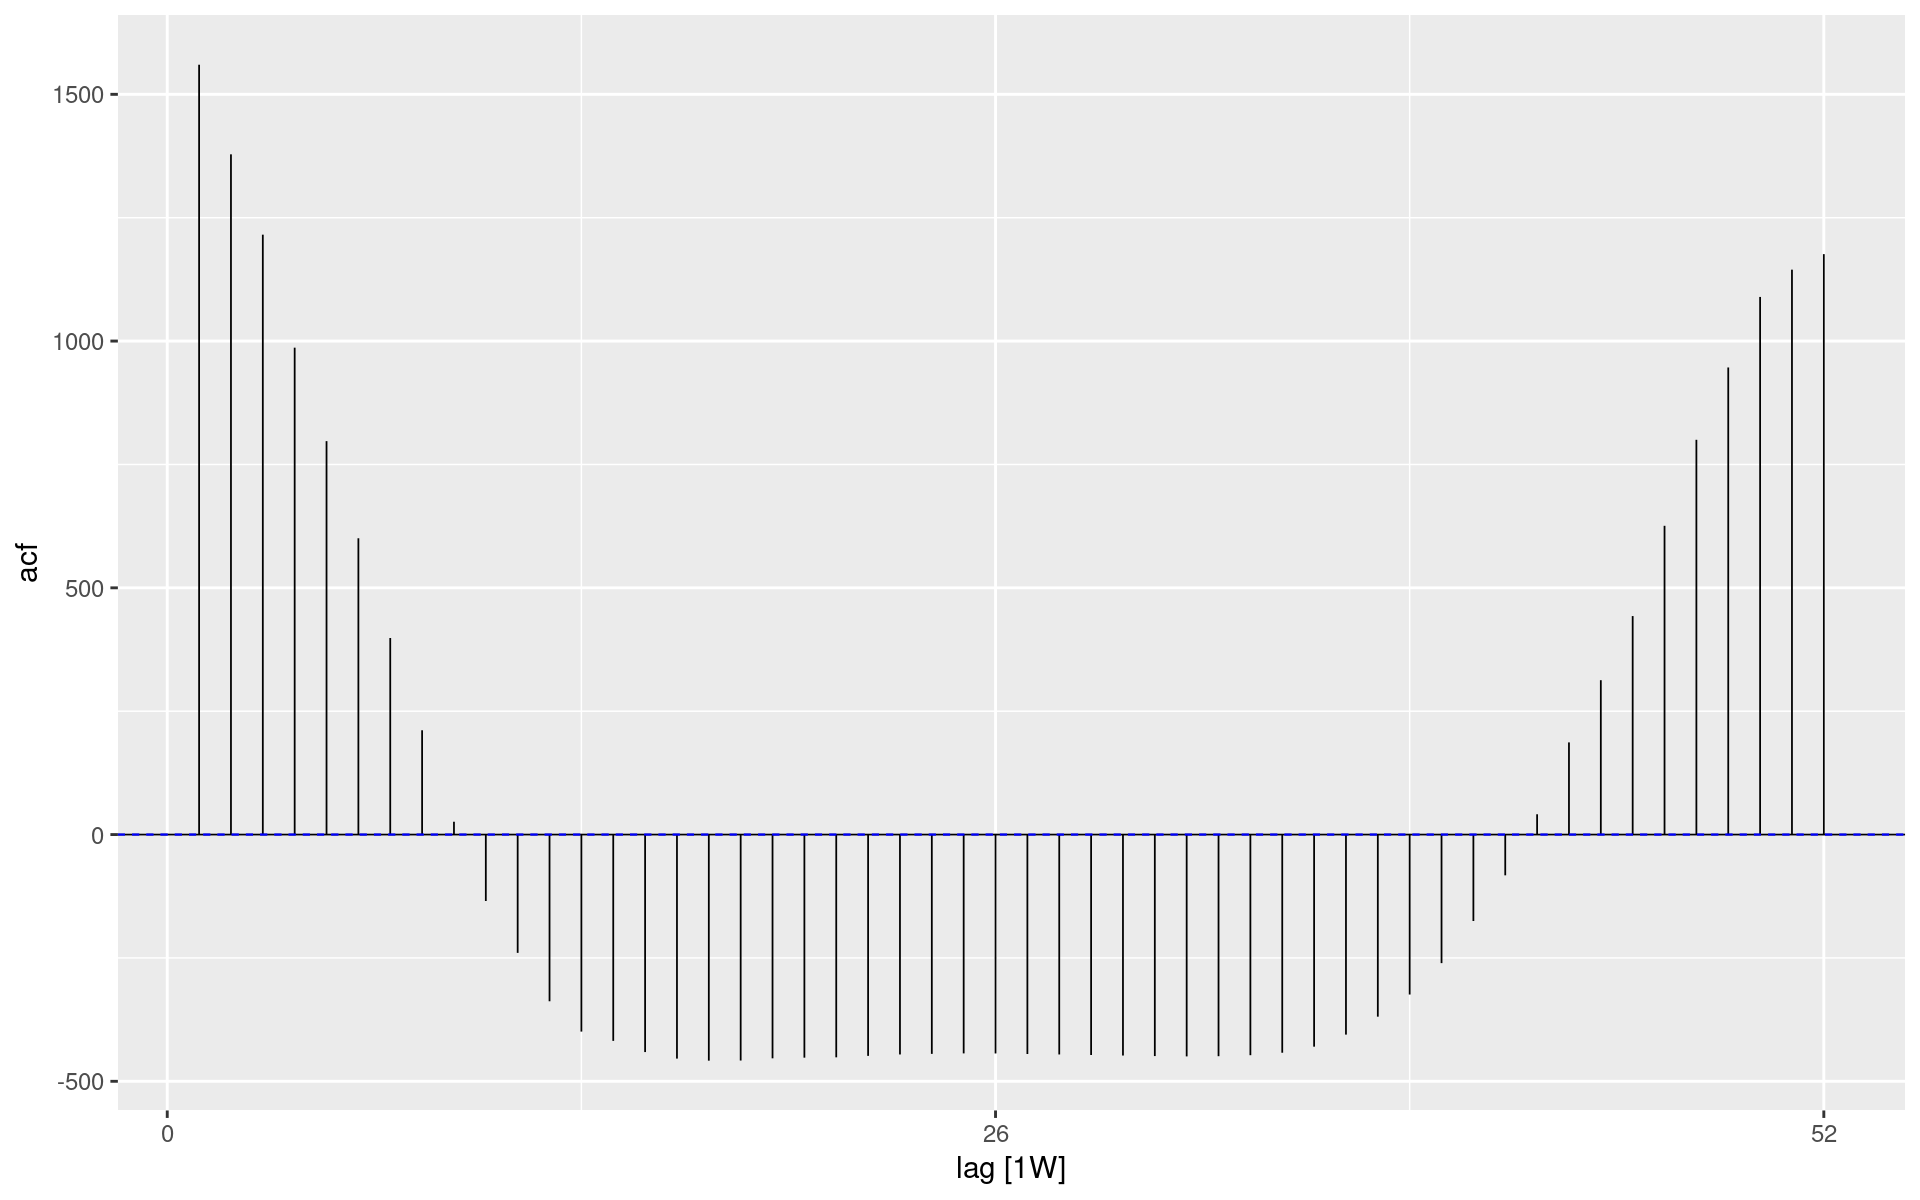

In [64]:
dfibble |> ACF(sample_value, lag_max = 52, type = "covariance") |> autoplot()

You can see that the shape of the plot remains the same, though the units on the y axis are different. 

### Cross-correlation

Cross-correlation is very heavily related to autocorrelation, however instead of looking at within-time-series correlation, we look between two time series and various lag intervals.

As an example for this let's use a new dataset.

`pelt` is the lynx and hare fur trading records for the (recently defunct) Hudson Bay Company between 1845 and 1935.

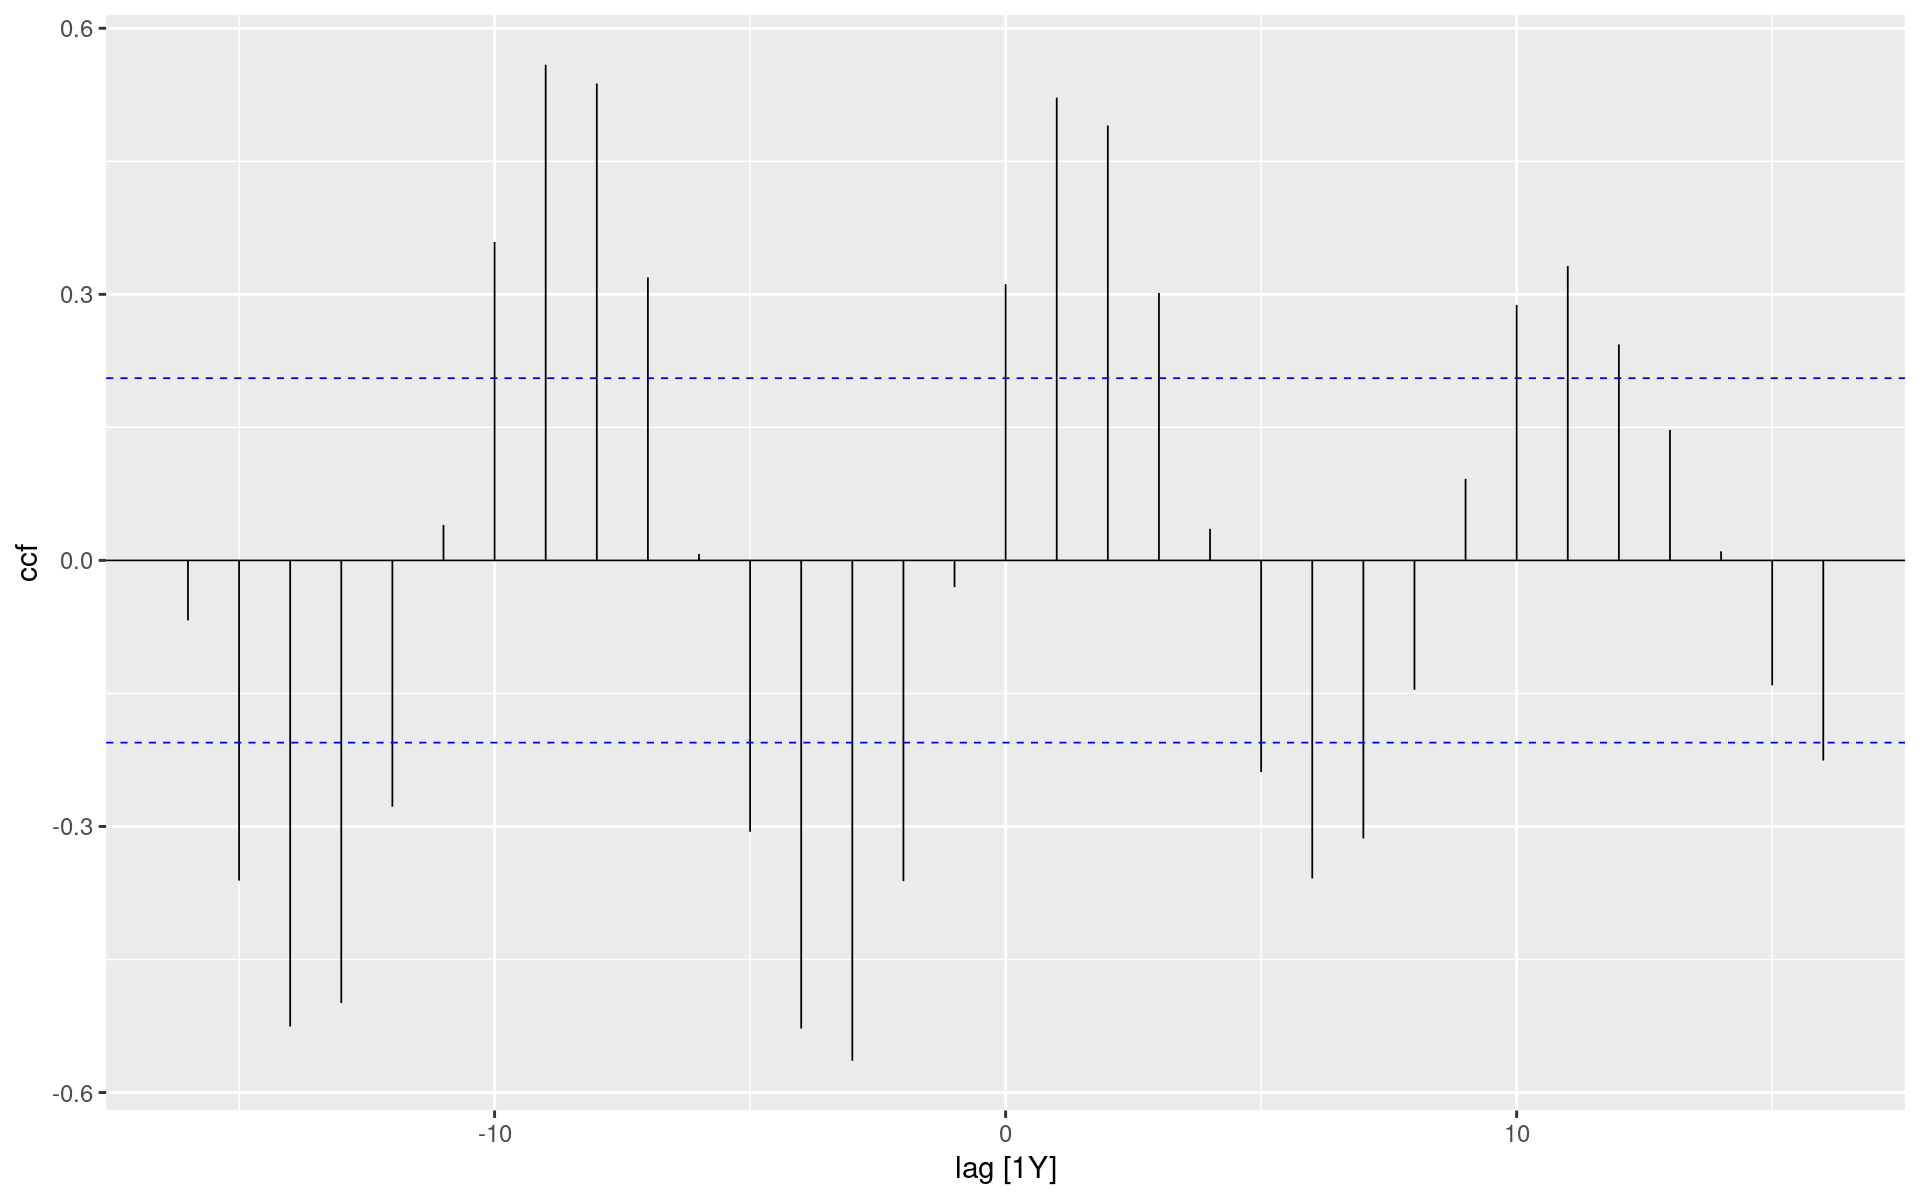

In [65]:
pelt |> CCF(x = Lynx, y = Hare) |> autoplot()

This CCF plot is sinusoidal with the first peak at +1Y.

If we assume that animals are captured at a rate equal to their population size, then the fur trade rate is a proxy for the population of that animal.

This plot is thus showing that the lynx population is most strongly correlated with the hare population from the previous year.

[There _might_ be some classic research about such problems, but using ODEs.](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

### Decomposition statistics

We learnt earlier how to decompose time series into their component parts. We _were_ doing the evaluation visually to establish what the most important components were, however there are also statistical methods to do this using `feat_stl()`.

The _strength of trend_ ($F_t$) and _strength of seasonality_ ($F_s$) are two measures that determine the scale of effect of the trend/seasonality components with the remainder component.

If $F_t \approx 1$ then the scale of the trend is much greater than the scale of the remainder, indicating that the trend contributes a lot to the data. Conversely if $F_t \approx 0$ then the scale of the remainder is much larger than the scale of the trend.

The same is true for $F_s \approx 0$ and $F_s \approx 1$, but for seasonality.

Here's an example for the AD data

In [66]:
addata_monthly |>
  features(temperature, feat_stl)

trend_strength seasonal_strength_year seasonal_peak_year seasonal_trough_year
1 0.311238       0.9651362              8                  1                   
  spikiness    linearity curvature stl_e_acf1 stl_e_acf10
1 0.0001611059 1.34826   0.8500155 -0.2656128 0.7222275

And another with the `aus_arrivals` dataset.

In [67]:
aus_arrivals |> 
    features(Arrivals, feat_stl)

Origin trend_strength seasonal_strength_year seasonal_peak_year
1 Japan  0.9911384      0.8490948              1                 
2 NZ     0.9950089      0.9519672              3                 
3 UK     0.9900745      0.9814662              0                 
4 US     0.9799245      0.7485080              0                 
  seasonal_trough_year spikiness    linearity curvature  stl_e_acf1 stl_e_acf10
1 2                    654951181553 362049.5  -557064.92 -0.2862755 0.3486182  
2 1                    197493298617 881175.6    75837.03 -0.3653883 0.3927299  
3 2                    185194378337 552140.9   -43793.71 -0.5335206 0.6558278  
4 2                     68689116838 300476.1   -54026.02 -0.3232904 0.6179408

We can see here that whilst all time series have a strong trend strength, NZ and the UK have a stronger seasonal strength.

This plays out in the seasonal plot below as well!

Plot variable not specified, automatically selected `y = Arrivals`


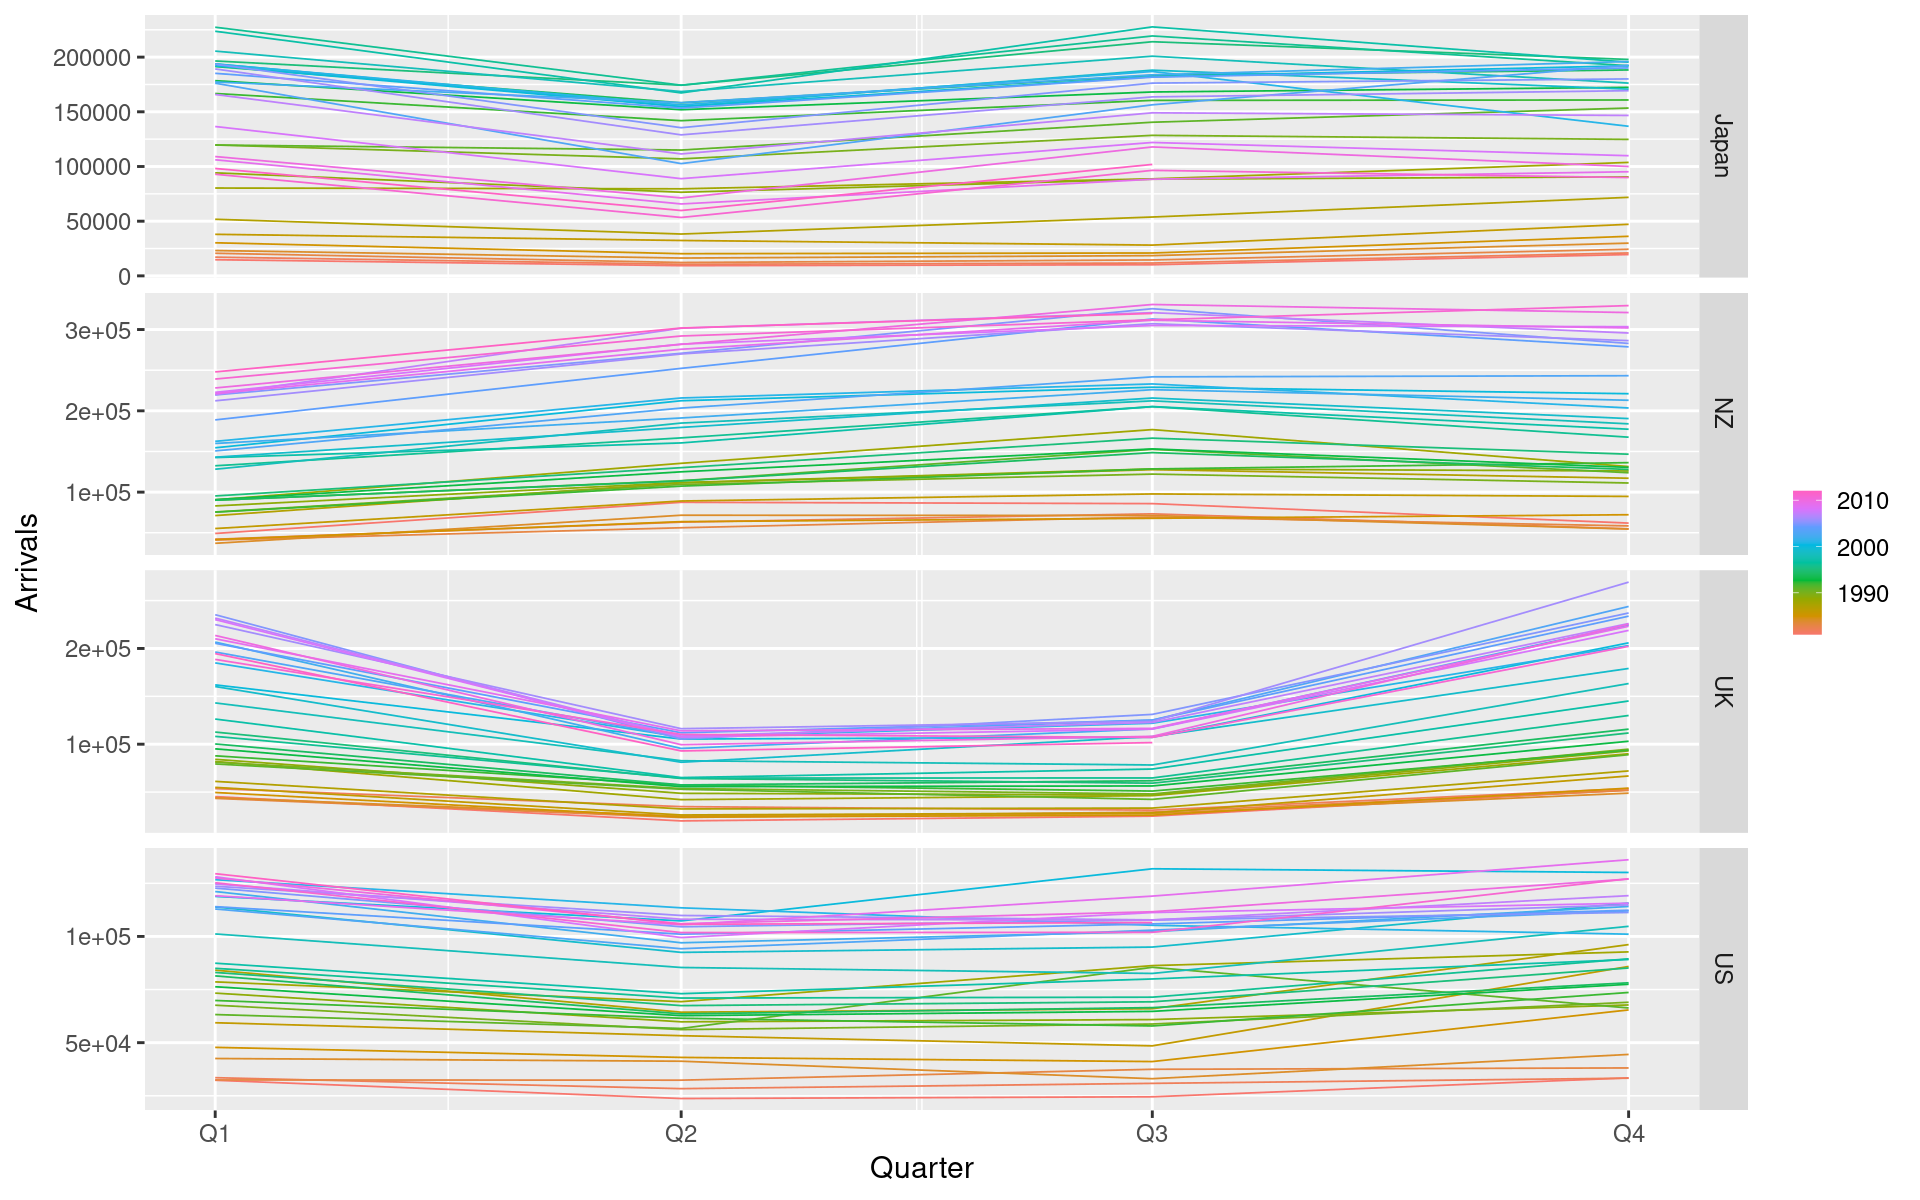

In [68]:
aus_arrivals |> gg_season()

### Others

There are many other statistics that can be calculated for a time series.

For example here we generate more than 45 summary statistics for `aus_arrivals`:

In [72]:
aus_arrivals |> 
    features(Arrivals, feature_set(pkgs = "feasts")) |> colnames()

[1] "Origin"                 "trend_strength"         "seasonal_strength_year"
 [4] "seasonal_peak_year"     "seasonal_trough_year"   "spikiness"             
 [7] "linearity"              "curvature"              "stl_e_acf1"            
[10] "stl_e_acf10"            "acf1"                   "acf10"                 
[13] "diff1_acf1"             "diff1_acf10"            "diff2_acf1"            
[16] "diff2_acf10"            "season_acf1"            "pacf5"                 
[19] "diff1_pacf5"            "diff2_pacf5"            "season_pacf"           
[22] "zero_run_mean"          "nonzero_squared_cv"     "zero_start_prop"       
[25] "zero_end_prop"          "lambda_guerrero"        "kpss_stat"             
[28] "kpss_pvalue"            "pp_stat"                "pp_pvalue"             
[31] "ndiffs"                 "nsdiffs"                "bp_stat"               
[34] "bp_pvalue"              "lb_stat"                "lb_pvalue"             
[37] "var_tiled_var"          "var_tiled_mean"         "shift_level_max"       
[40] "shift_level_index"      "shift_var_max"          "shift_var_index"       
[43] "shift_kl_max"           "shift_kl_index"         "spectral_entropy"      
[46] "n_crossing_points"      "longest_flat_spot"      "coef_hurst"            
[49] "stat_arch_lm"

Generally speaking, like with normal datasets, you will want to pick the summary statistics that accurately represent aspects of your time series that you care about.

## Autoregressive and ARIMA models

In `fable`, all types of autoregressive models are fit using the ARIMA command. This is because at a fundamental level, autoregressive models (alongside moving average models) are strict subsets of the general ARIMA model (which stands for _AutoRegressive Integrated Moving Average model_).

This is analagous to the similar concept that [nearly every frequentist statistical text can be a GLM](https://lindeloev.github.io/tests-as-linear/linear_tests_cheat_sheet.png)

Given this, it makes sense to explain each component of the ARIMA model and how they fit together.

### Autoregression (AR)

### Differencing (I)

### Moving Averages (MA)

## Predictive covariates

## Time Series Checklist

So you've ended up with some time series data to analyse. Here is a really simple checklist for some things to do:

1. Load your data
2. Try to convert to a `tsibble`
3. Fix gaps if possible by aggregation or simple impution
4. Reaggregate if the data is too fine-scaled
5. Plot plot plot!
  - The time series
  - Seasonality plot
  - Lag plots
  - ACF plots
6. Decompose (either STL or classical)
7. Get summary statistics
8. Model & Forecast


## Sources

https://yanshuo.quarto.pub/nus-ts-book/01-intro.html
https://github.com/yanshuotan/nus-ts-book/blob/master/01-intro.qmd